In [1]:
# Run this cell to mount your Google Drive.

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Imports

In [2]:
# path
pth = '/content/drive/MyDrive/Colab Notebooks/Thesis'

%cd /content/drive/My Drive/Colab Notebooks/Thesis/SupervisedLearning

from train import *
from visualize_data import *
from utils import *

%cd /content/drive/My Drive/Colab Notebooks/Thesis

/content/drive/My Drive/Colab Notebooks/Thesis/SupervisedLearning
/content/drive/My Drive/Colab Notebooks/Thesis


# State-Action Pair Guideline

Specify the desired state-action pair:

i.e. Before Pickup, Before Discard: Draw (bpbd_draw)

## Model Name Guideline

Specify the following parameters:

- **Data Selection**:
 - **`state-action pair`**
   - possible state-action pairs
```r
state_action_pair = {'all': 'all', # all actions
                    'bpbd': 'draw', # actions 2/3 
                    'apbd': ['discard', 'knock'], # actions 6-57, 58-109
                    'apad': 'knock_bin'}
```
 - **`model_name`**
   - name of the model based on **pruned states** and **chosen action**
 - **`numGames`**
   - Number of games used to train model
$$numGames \in [2000, 6000, 8000]$$

 - **`pruneStatesList`**
   - which states to omit when training model 
 ```r
 pruneStatesList is a list, {'currHand','topCard','deadCard','oppCard','unknownCard'}
 ```
 - **`actionChoice`**
   - which specific action to train model 
```r
actionChoice is one of {'all','draw','discard','knock'}
```
 - **`balance`** (T/F, **`default = False`**)
   - balance data by smallest class

--- 

- **Model Parameters**:

| Parameter         | Type            |Default|
| ----------------- |:---------------:| -----:|
| **batch_size**    | int             | 1000  |
| **learning_rate** | float           | 0.001 |
| **epoch**         | int             | 100   |
| **pre_train**     | bool (T/F)      | False |
| **model_PT**      | str (model/path)| null  |
| **device**        | str (cpu/cuda)  | cpu   |

# After Pickup, Before Discard: Discard (apbd_discard)

## all_states_discard_only

### Parameters

In [3]:
# state_action pair
state = 'apbd'
action = 'discard'

# model name
model_name = 'all_states_discard_only'

# Number of Games
numGames = 8000

# prunable states
# {'currHand','topCard','deadCard','oppCard','unknownCard'} or blank if None
pruneStatesList = []

# choosable actions
# {'all','draw_pickup','discard','knock','knock_bin'}
actionChoice = 'discard'

# Balance classes
balance = False

# Training parameters
batch_size = 1000
lr = 0.001
epochs = 100

# Pretrain model
pre_train = False
model_PT = ''

# device for model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Create Directories

In [4]:
data_pth, model_pth, plot_pth = create_dir(pth, state, action, model_name)

Directories created.


### Load, Prune, and Split Training Data

loading 8000 games dataset from "/content/drive/MyDrive/Colab Notebooks/Thesis/data/apbd/discard"


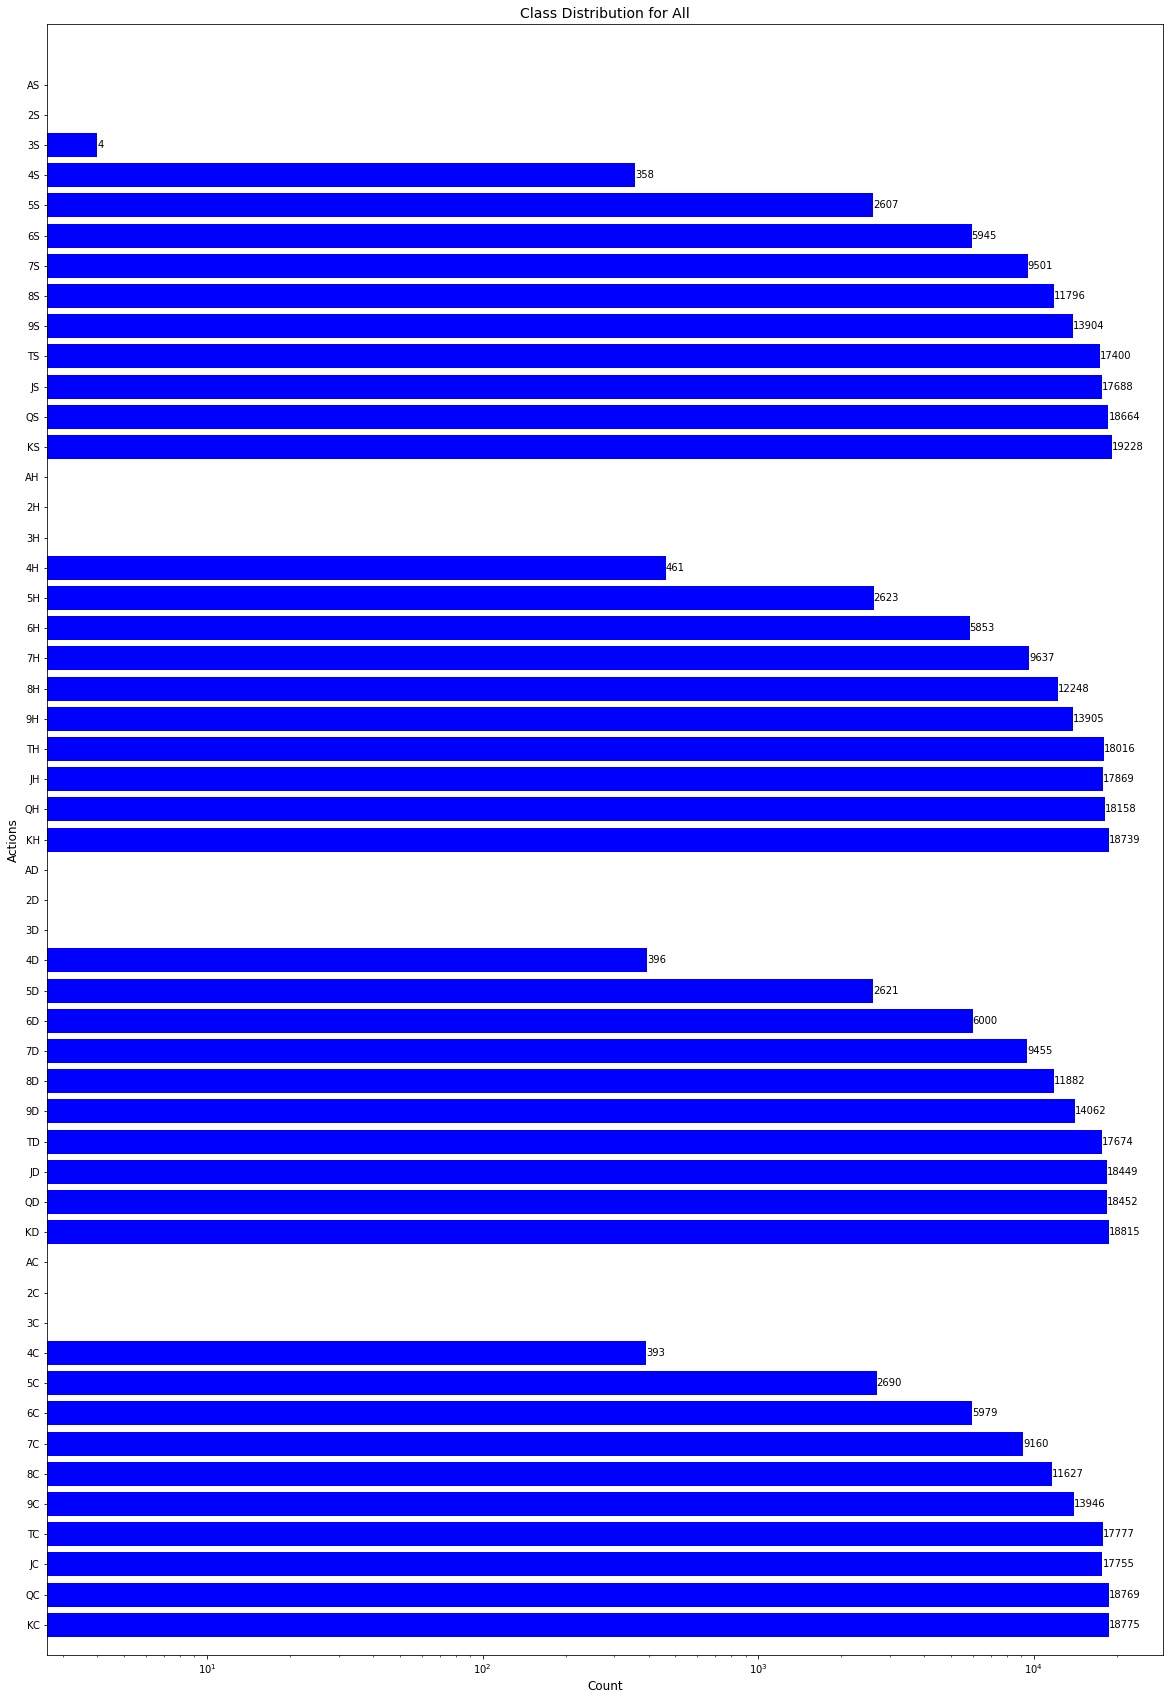

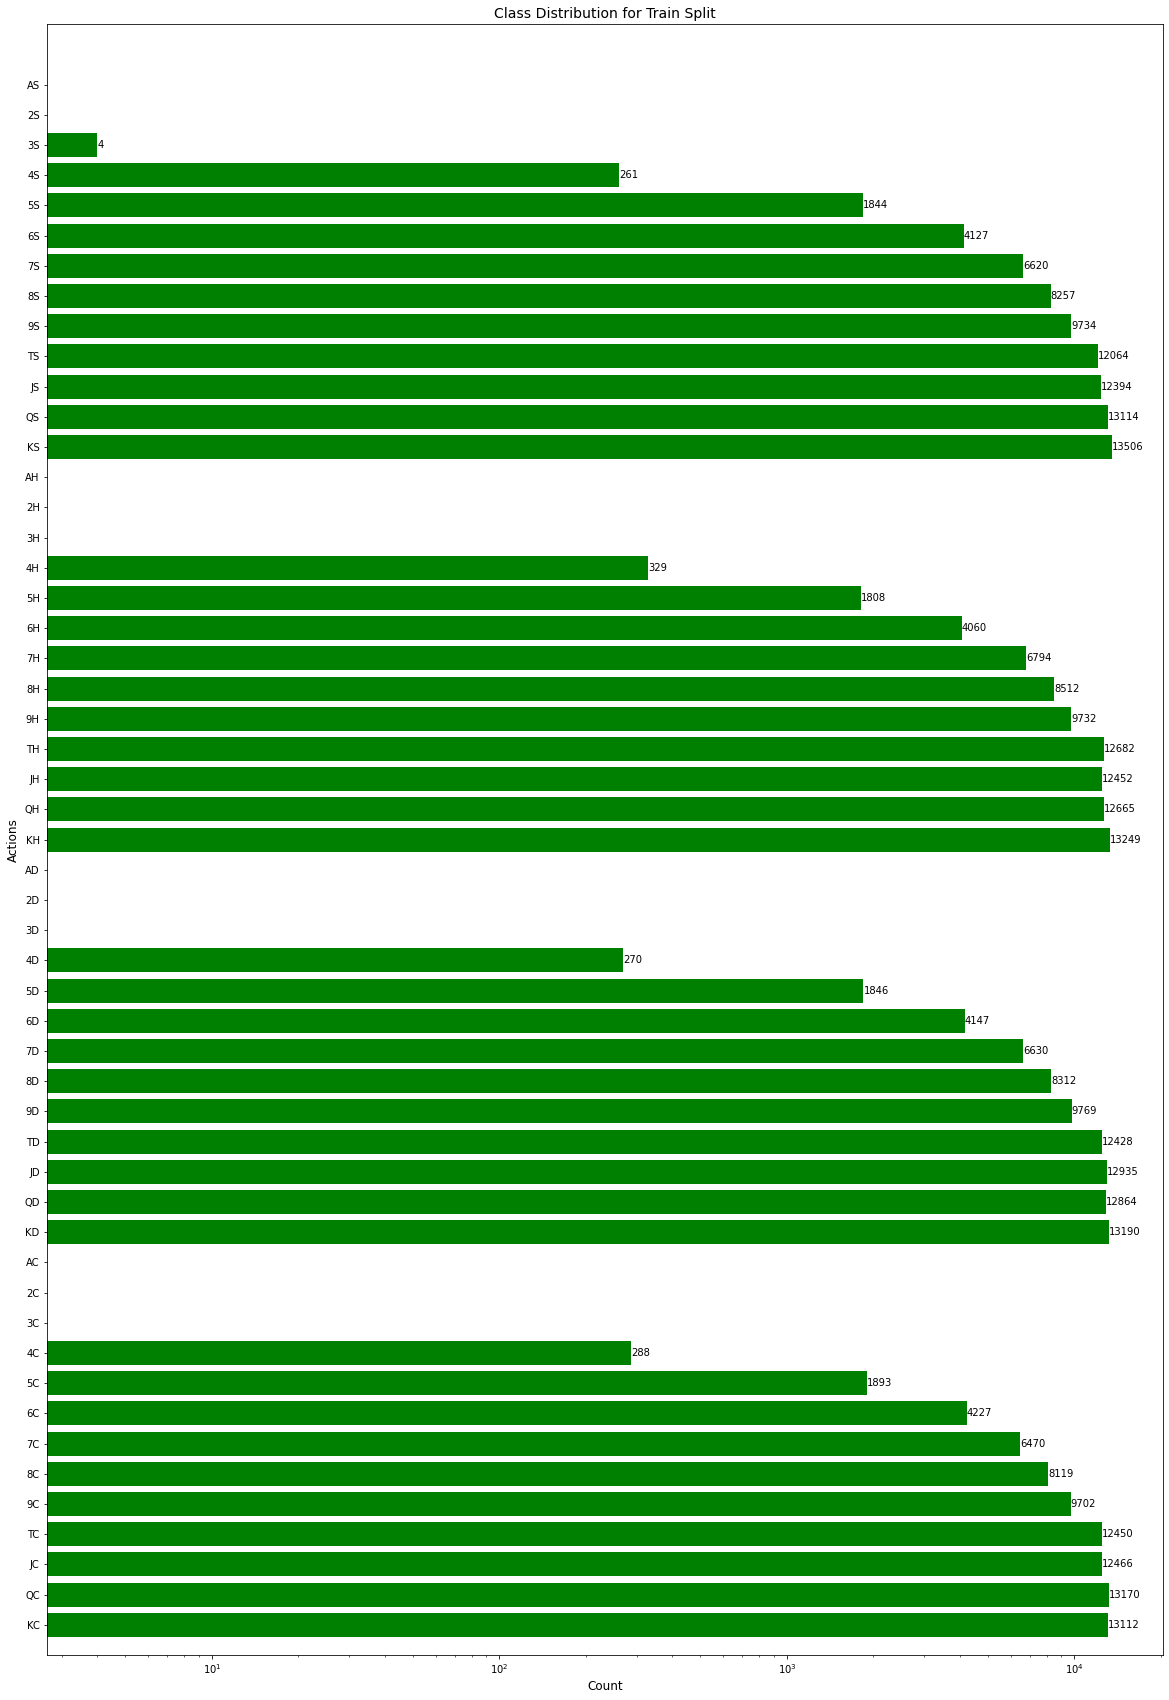

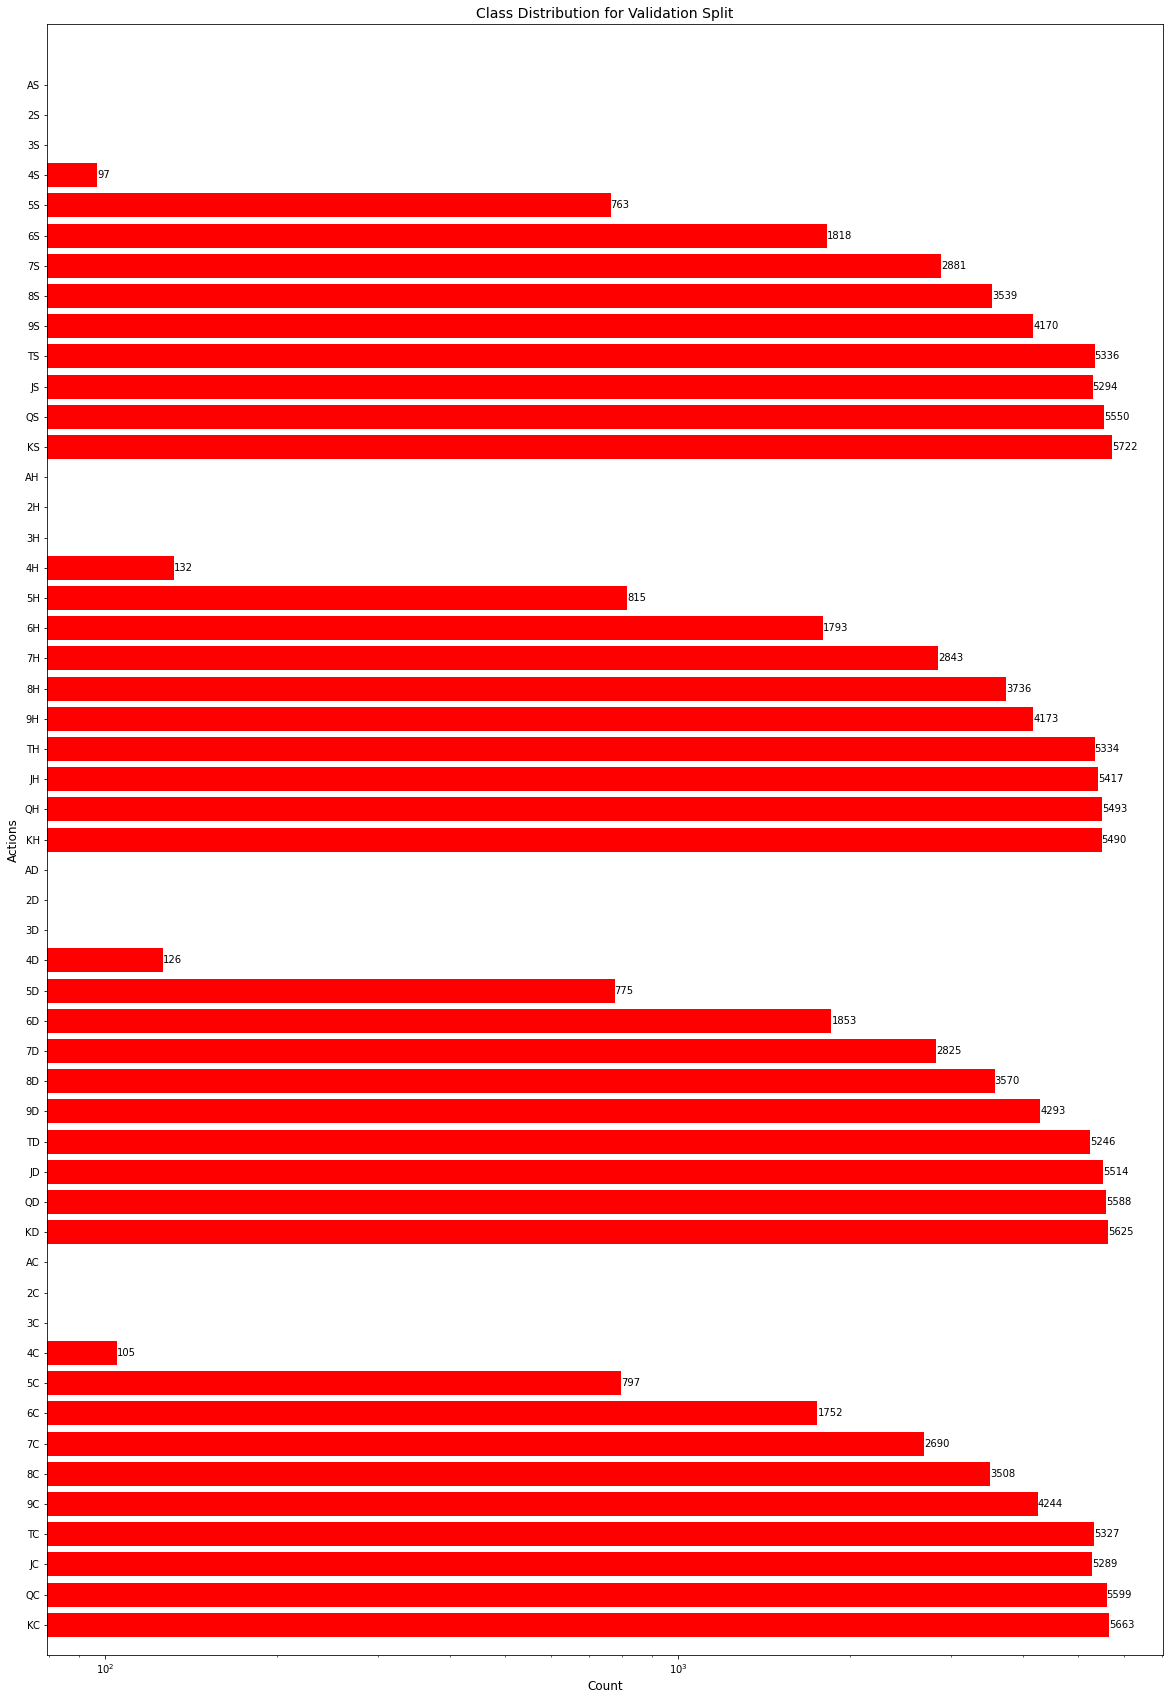

In [5]:
train_loader, val_loader, _,  classes = load_train_data(data_pth, plot_pth,
                                                        numGames, batch_size, 
                                                        pruneStatesList, actionChoice, 
                                                        balance, visualize=True)

### Train Model

Epoch: 1 | Train Loss: 0.02113006 | Train acc: 0.100918
              Val Loss: 0.01849652 |   Val acc: 0.227467
Epoch: 2 | Train Loss: 0.01825705 | Train acc: 0.321237
              Val Loss: 0.01783380 |   Val acc: 0.360273
Epoch: 3 | Train Loss: 0.01621269 | Train acc: 0.393061
              Val Loss: 0.01406287 |   Val acc: 0.446681
Epoch: 4 | Train Loss: 0.01291460 | Train acc: 0.500715
              Val Loss: 0.01227176 |   Val acc: 0.523380
Epoch: 5 | Train Loss: 0.01178518 | Train acc: 0.553313
              Val Loss: 0.01138895 |   Val acc: 0.575381
Epoch: 6 | Train Loss: 0.01103778 | Train acc: 0.596741
              Val Loss: 0.01078743 |   Val acc: 0.614554
Epoch: 7 | Train Loss: 0.01054859 | Train acc: 0.622857
              Val Loss: 0.01037148 |   Val acc: 0.628256
Epoch: 8 | Train Loss: 0.01013890 | Train acc: 0.636909
              Val Loss: 0.01001356 |   Val acc: 0.639123
Epoch: 9 | Train Loss: 0.00977116 | Train acc: 0.649420
              Val Loss: 0.00966670 |   V

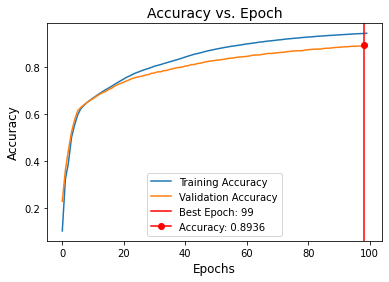

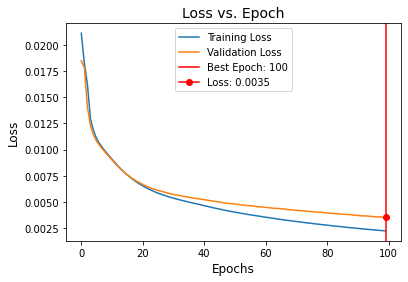

In [ ]:
model, model_acc, model_loss = train(train_loader, val_loader, plot_pth, batch_size, lr, epochs, verbose=True, pre_train=pre_train, model_PT=model_PT, device=device)
torch.save(model, '{}/model.pt'.format(model_pth))
torch.save(model_acc, '{}/model_acc.pt'.format(model_pth))
torch.save(model_loss, '{}/model_loss.pt'.format(model_pth))

#### Confusion Matrix

##### Load Models

In [ ]:
model = torch.load('{}/model.pt'.format(model_pth), map_location=device)
model_acc = torch.load('{}/model_acc.pt'.format(model_pth), map_location=device)
model_loss = torch.load('{}/model_loss.pt'.format(model_pth), map_location=device)

##### Train Set

Accuracy: 94.74
Normalized confusion matrix


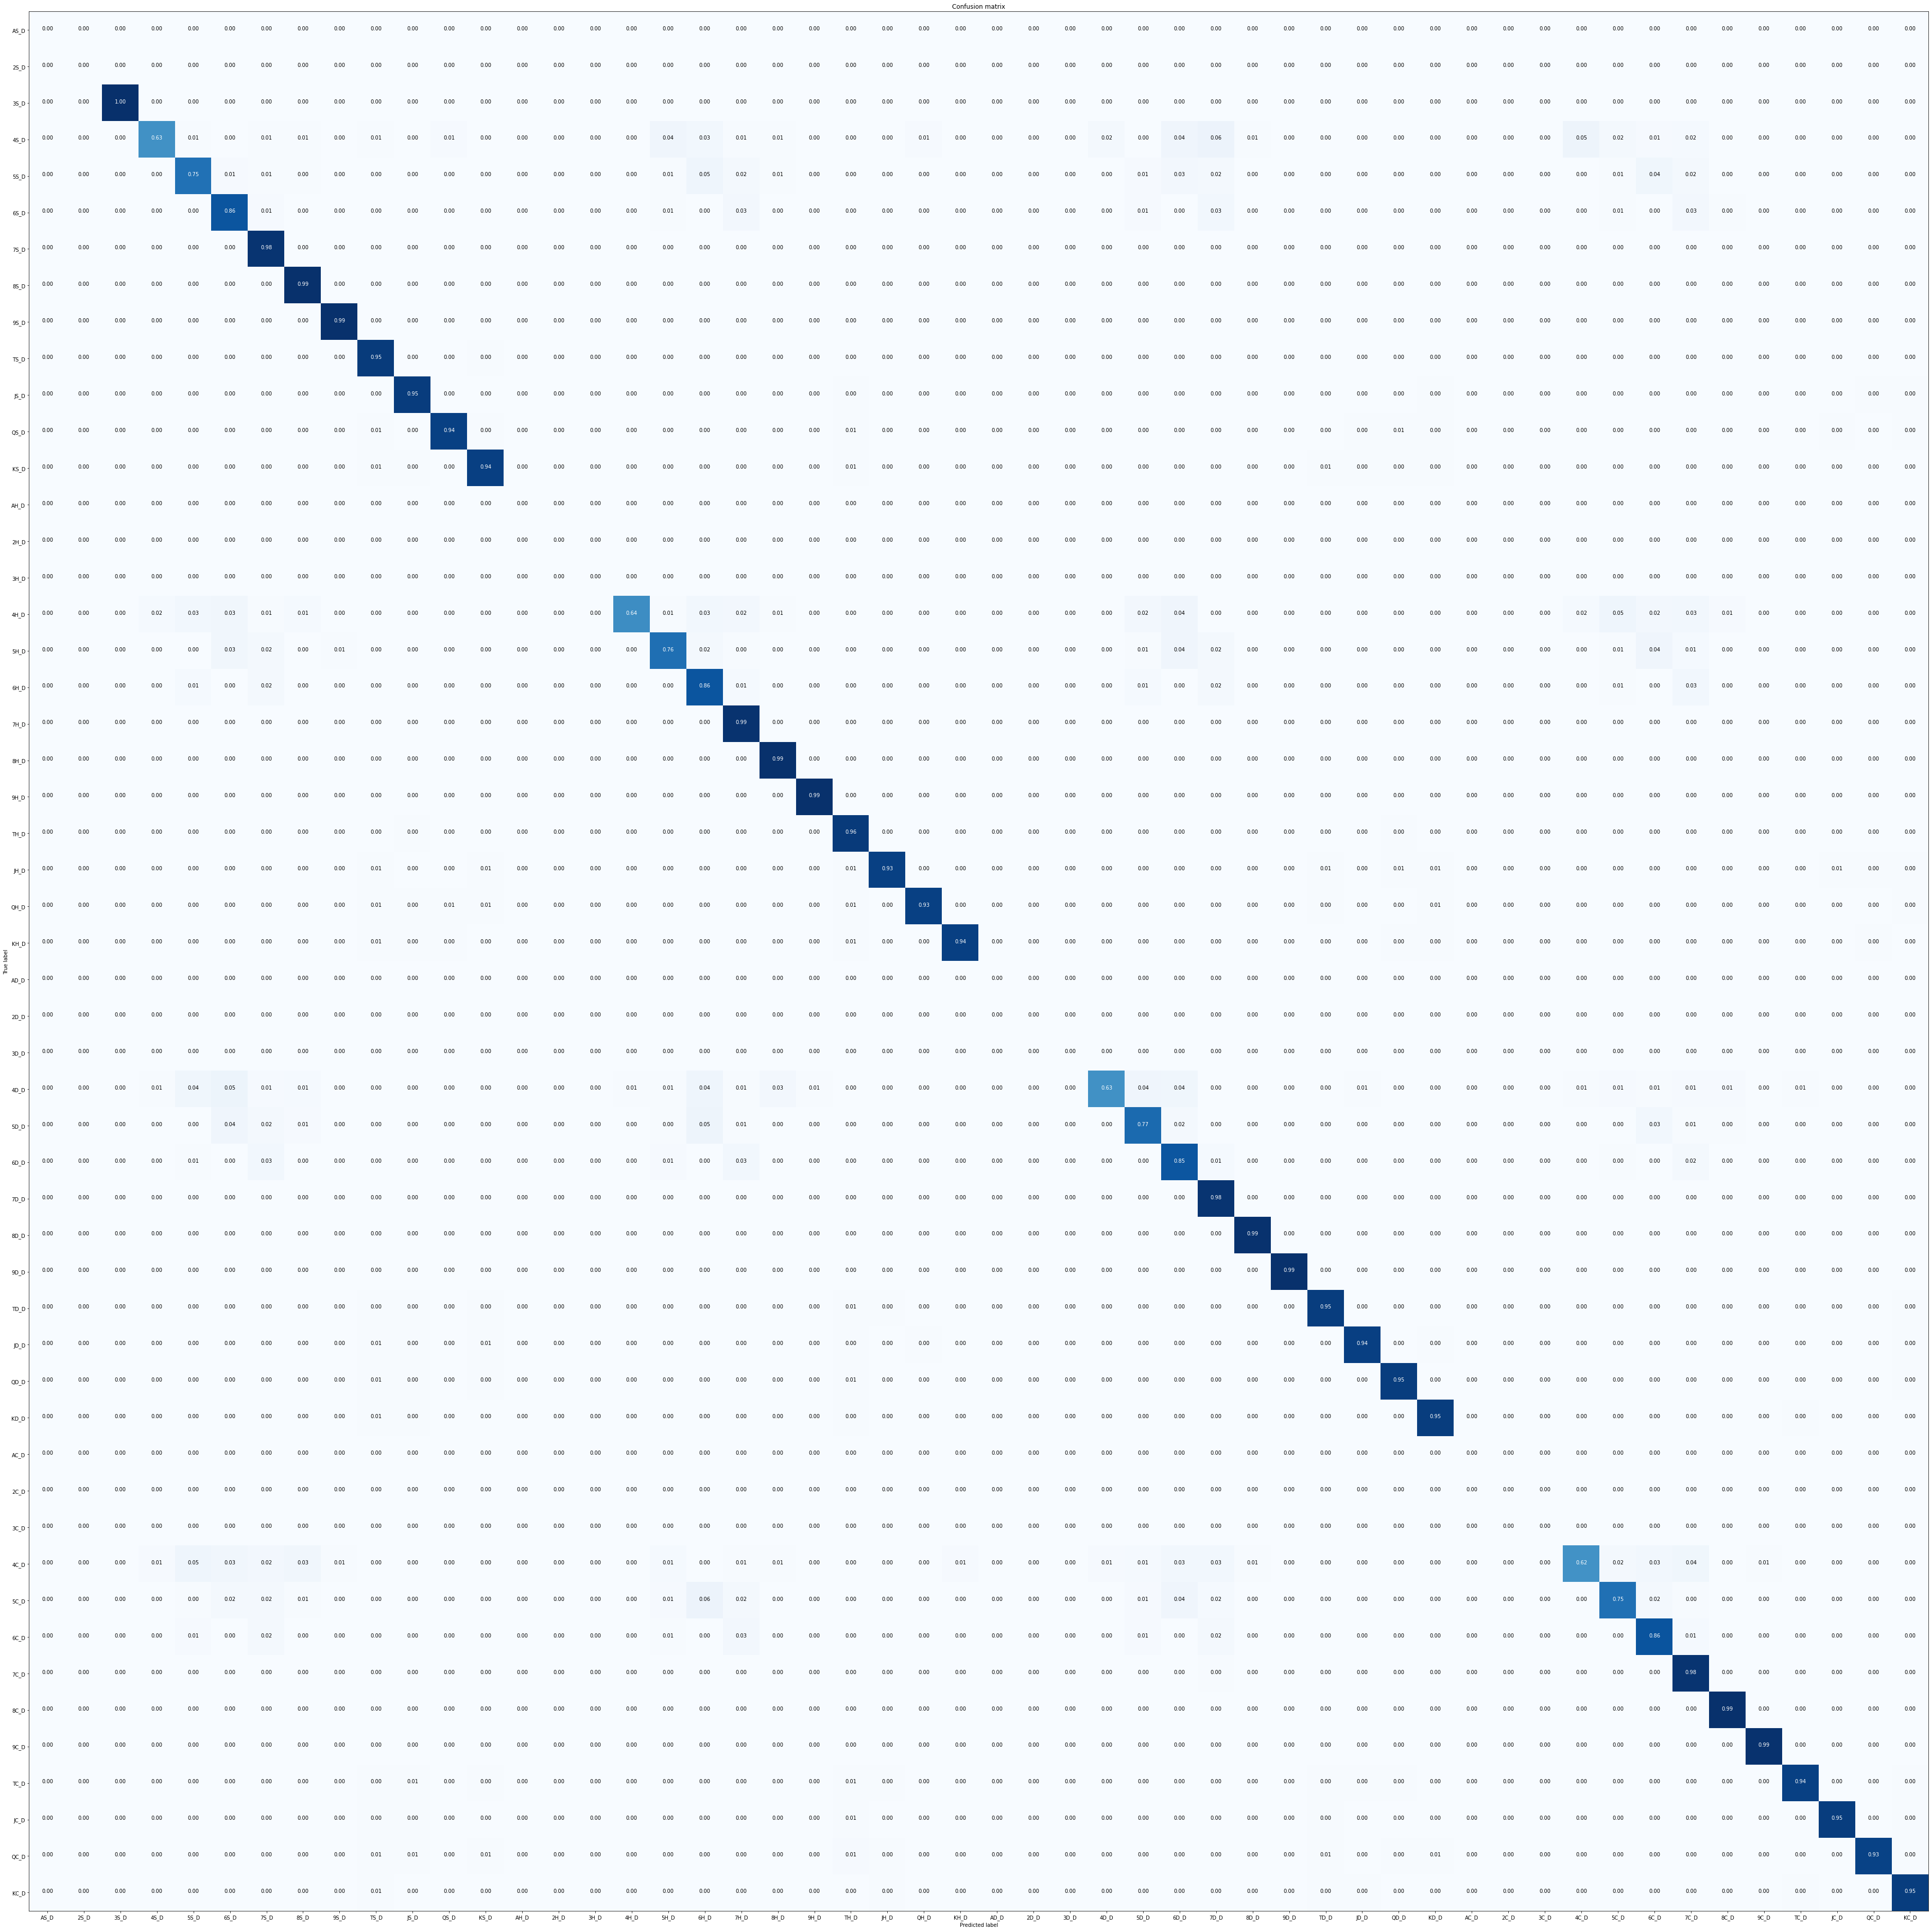

Confusion matrix, without normalization


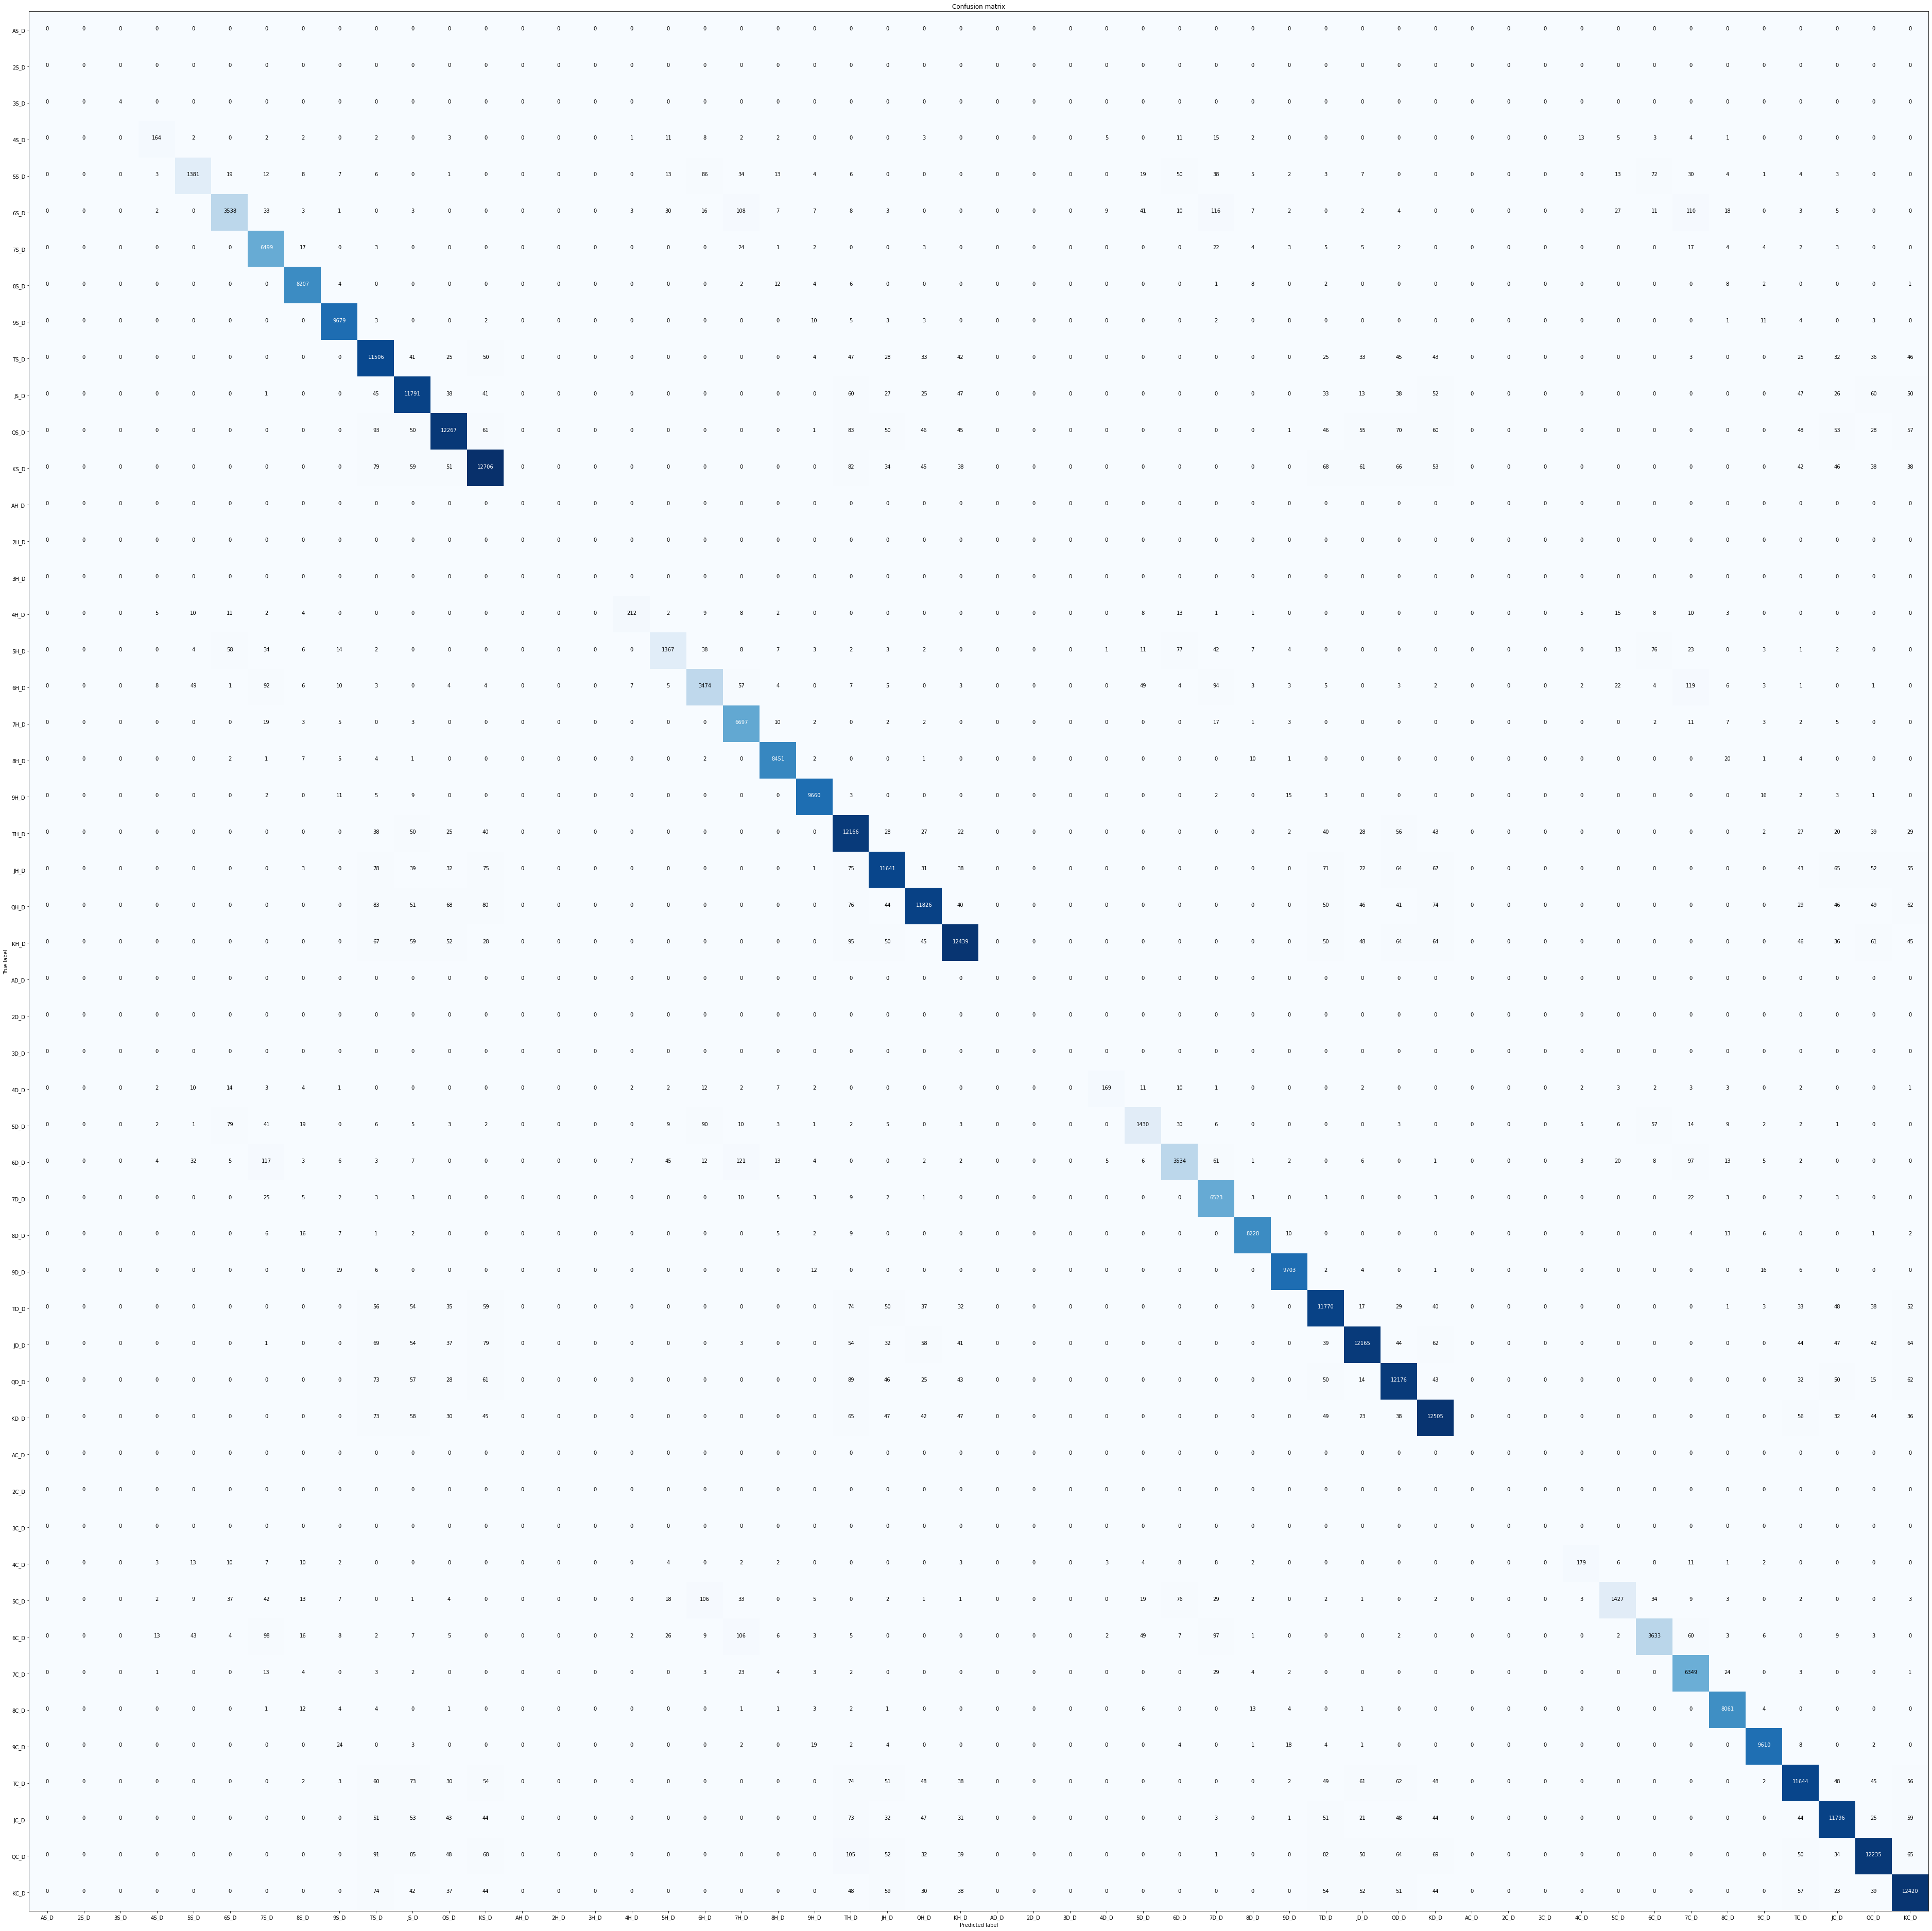

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, train_loader, device, numGames=currGames)

##### Validation Set

Accuracy: 89.35
Normalized confusion matrix


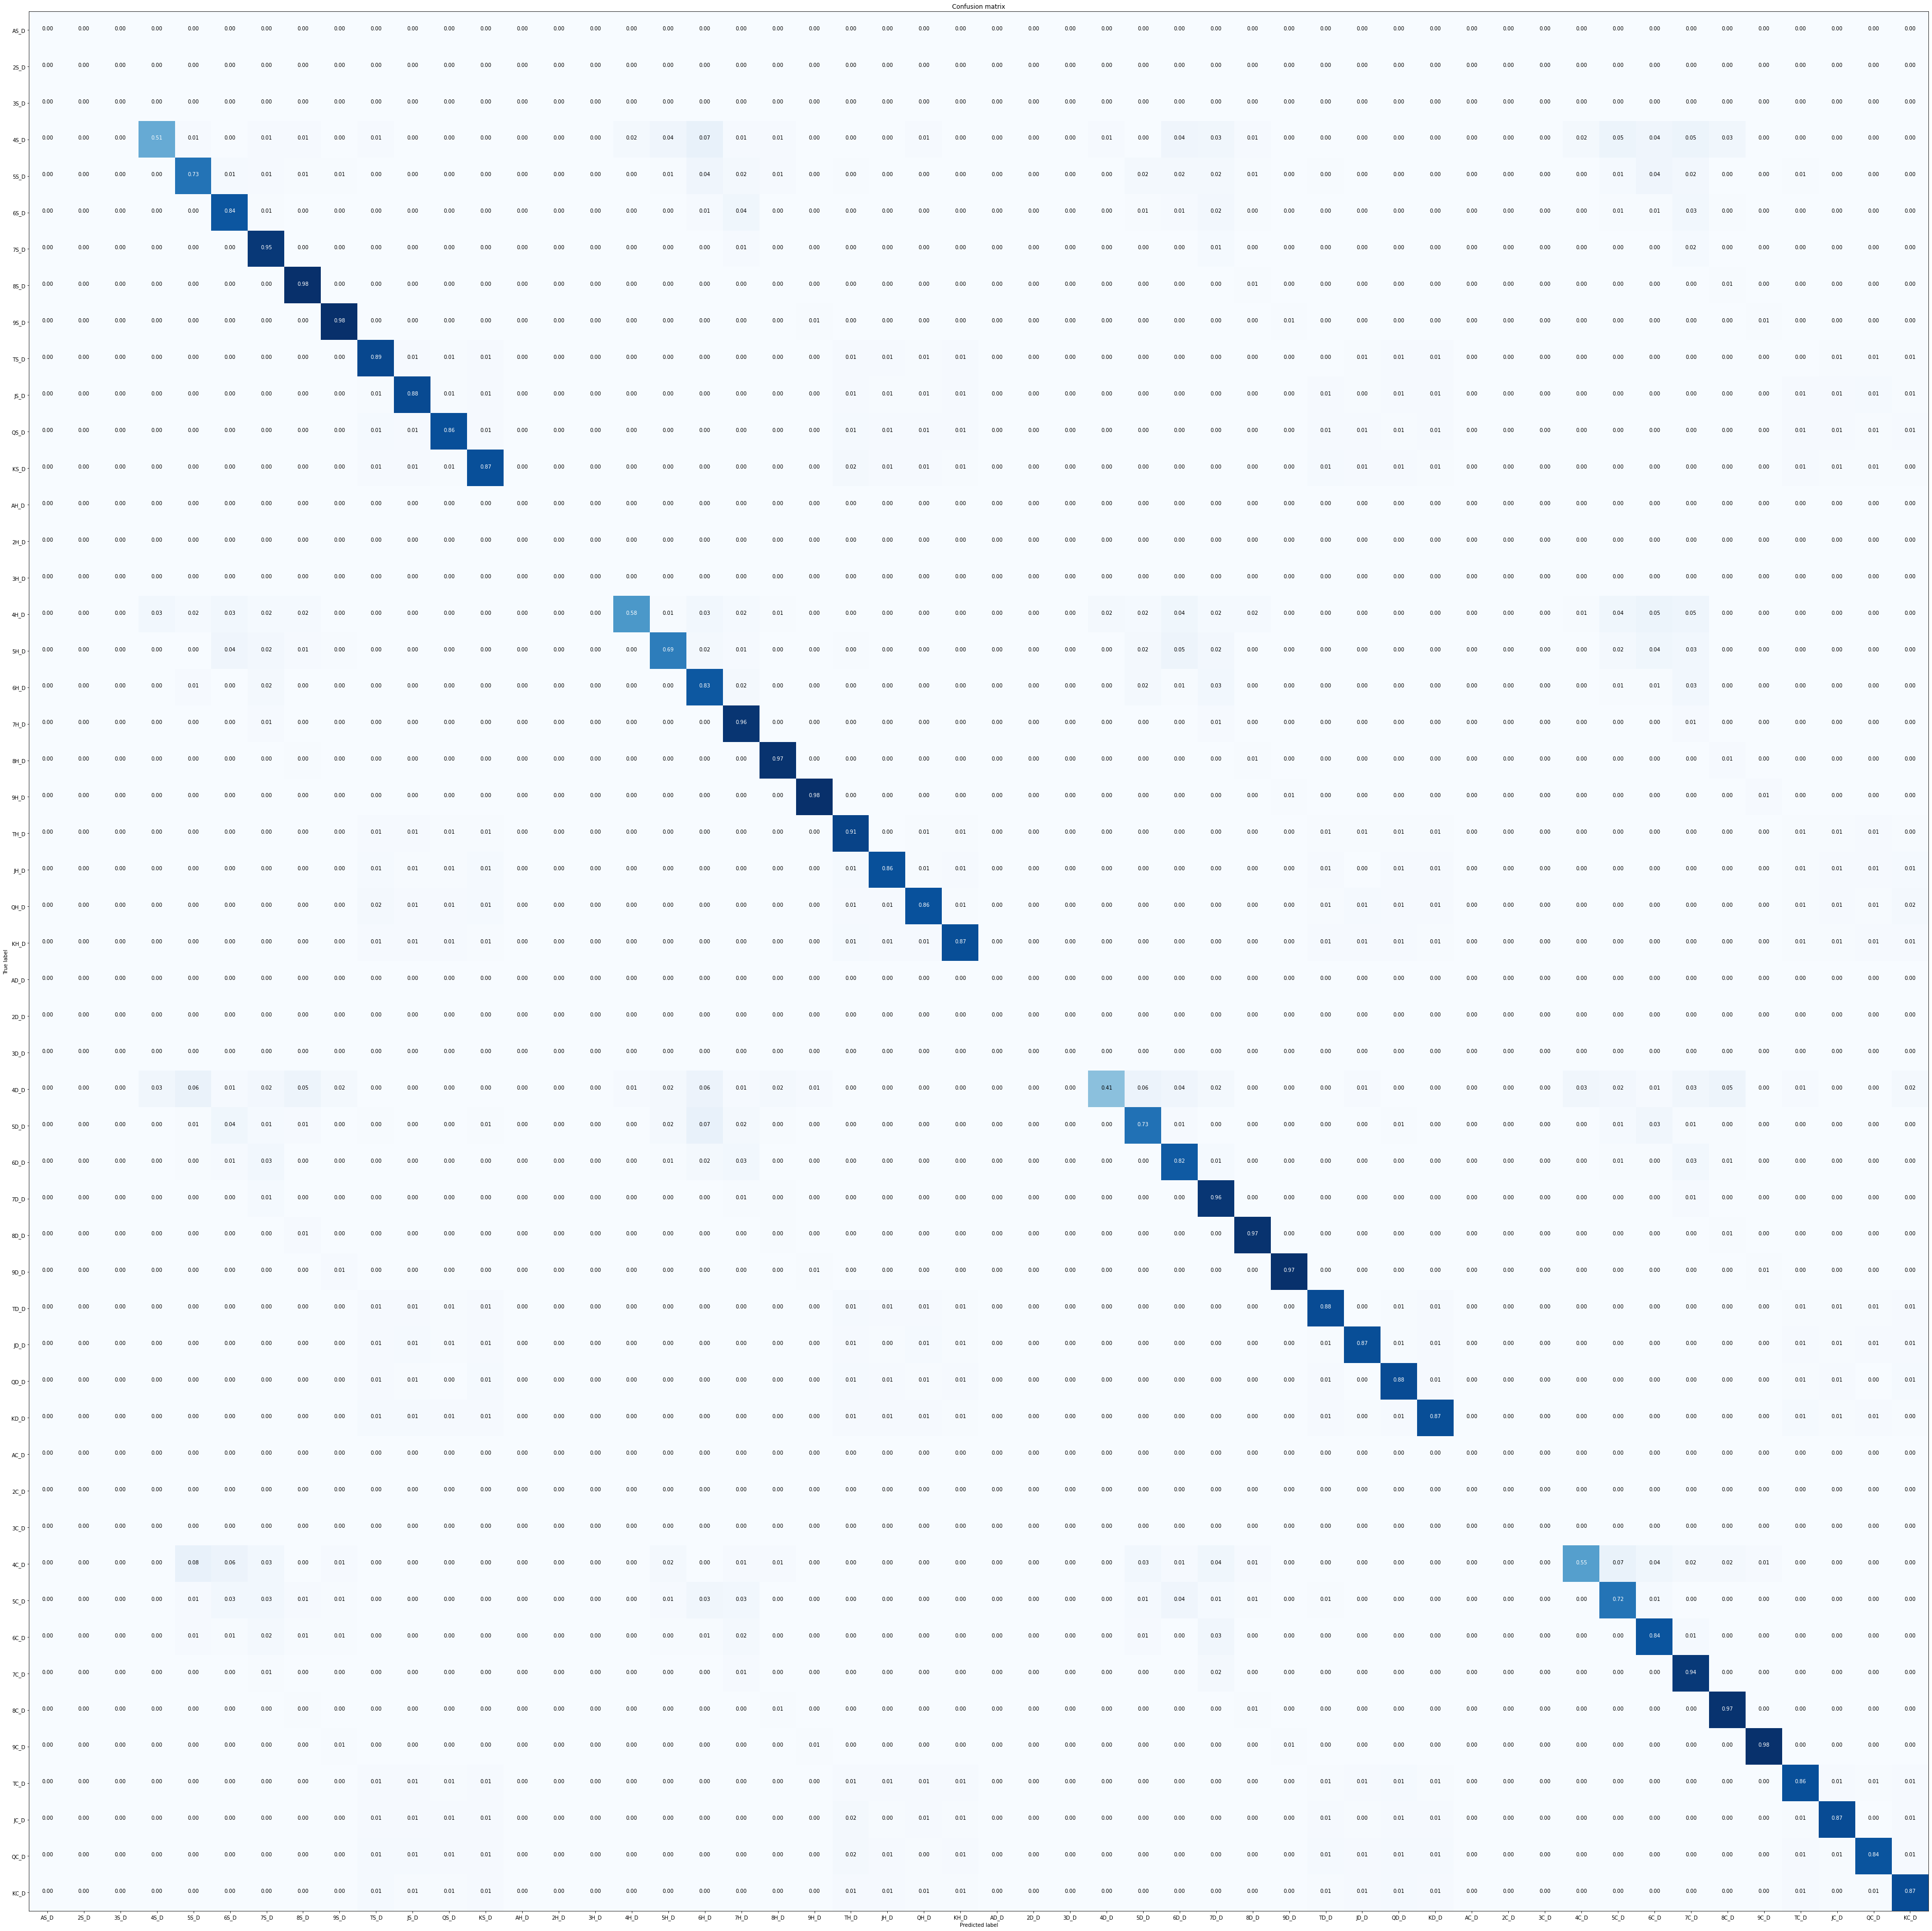

Confusion matrix, without normalization


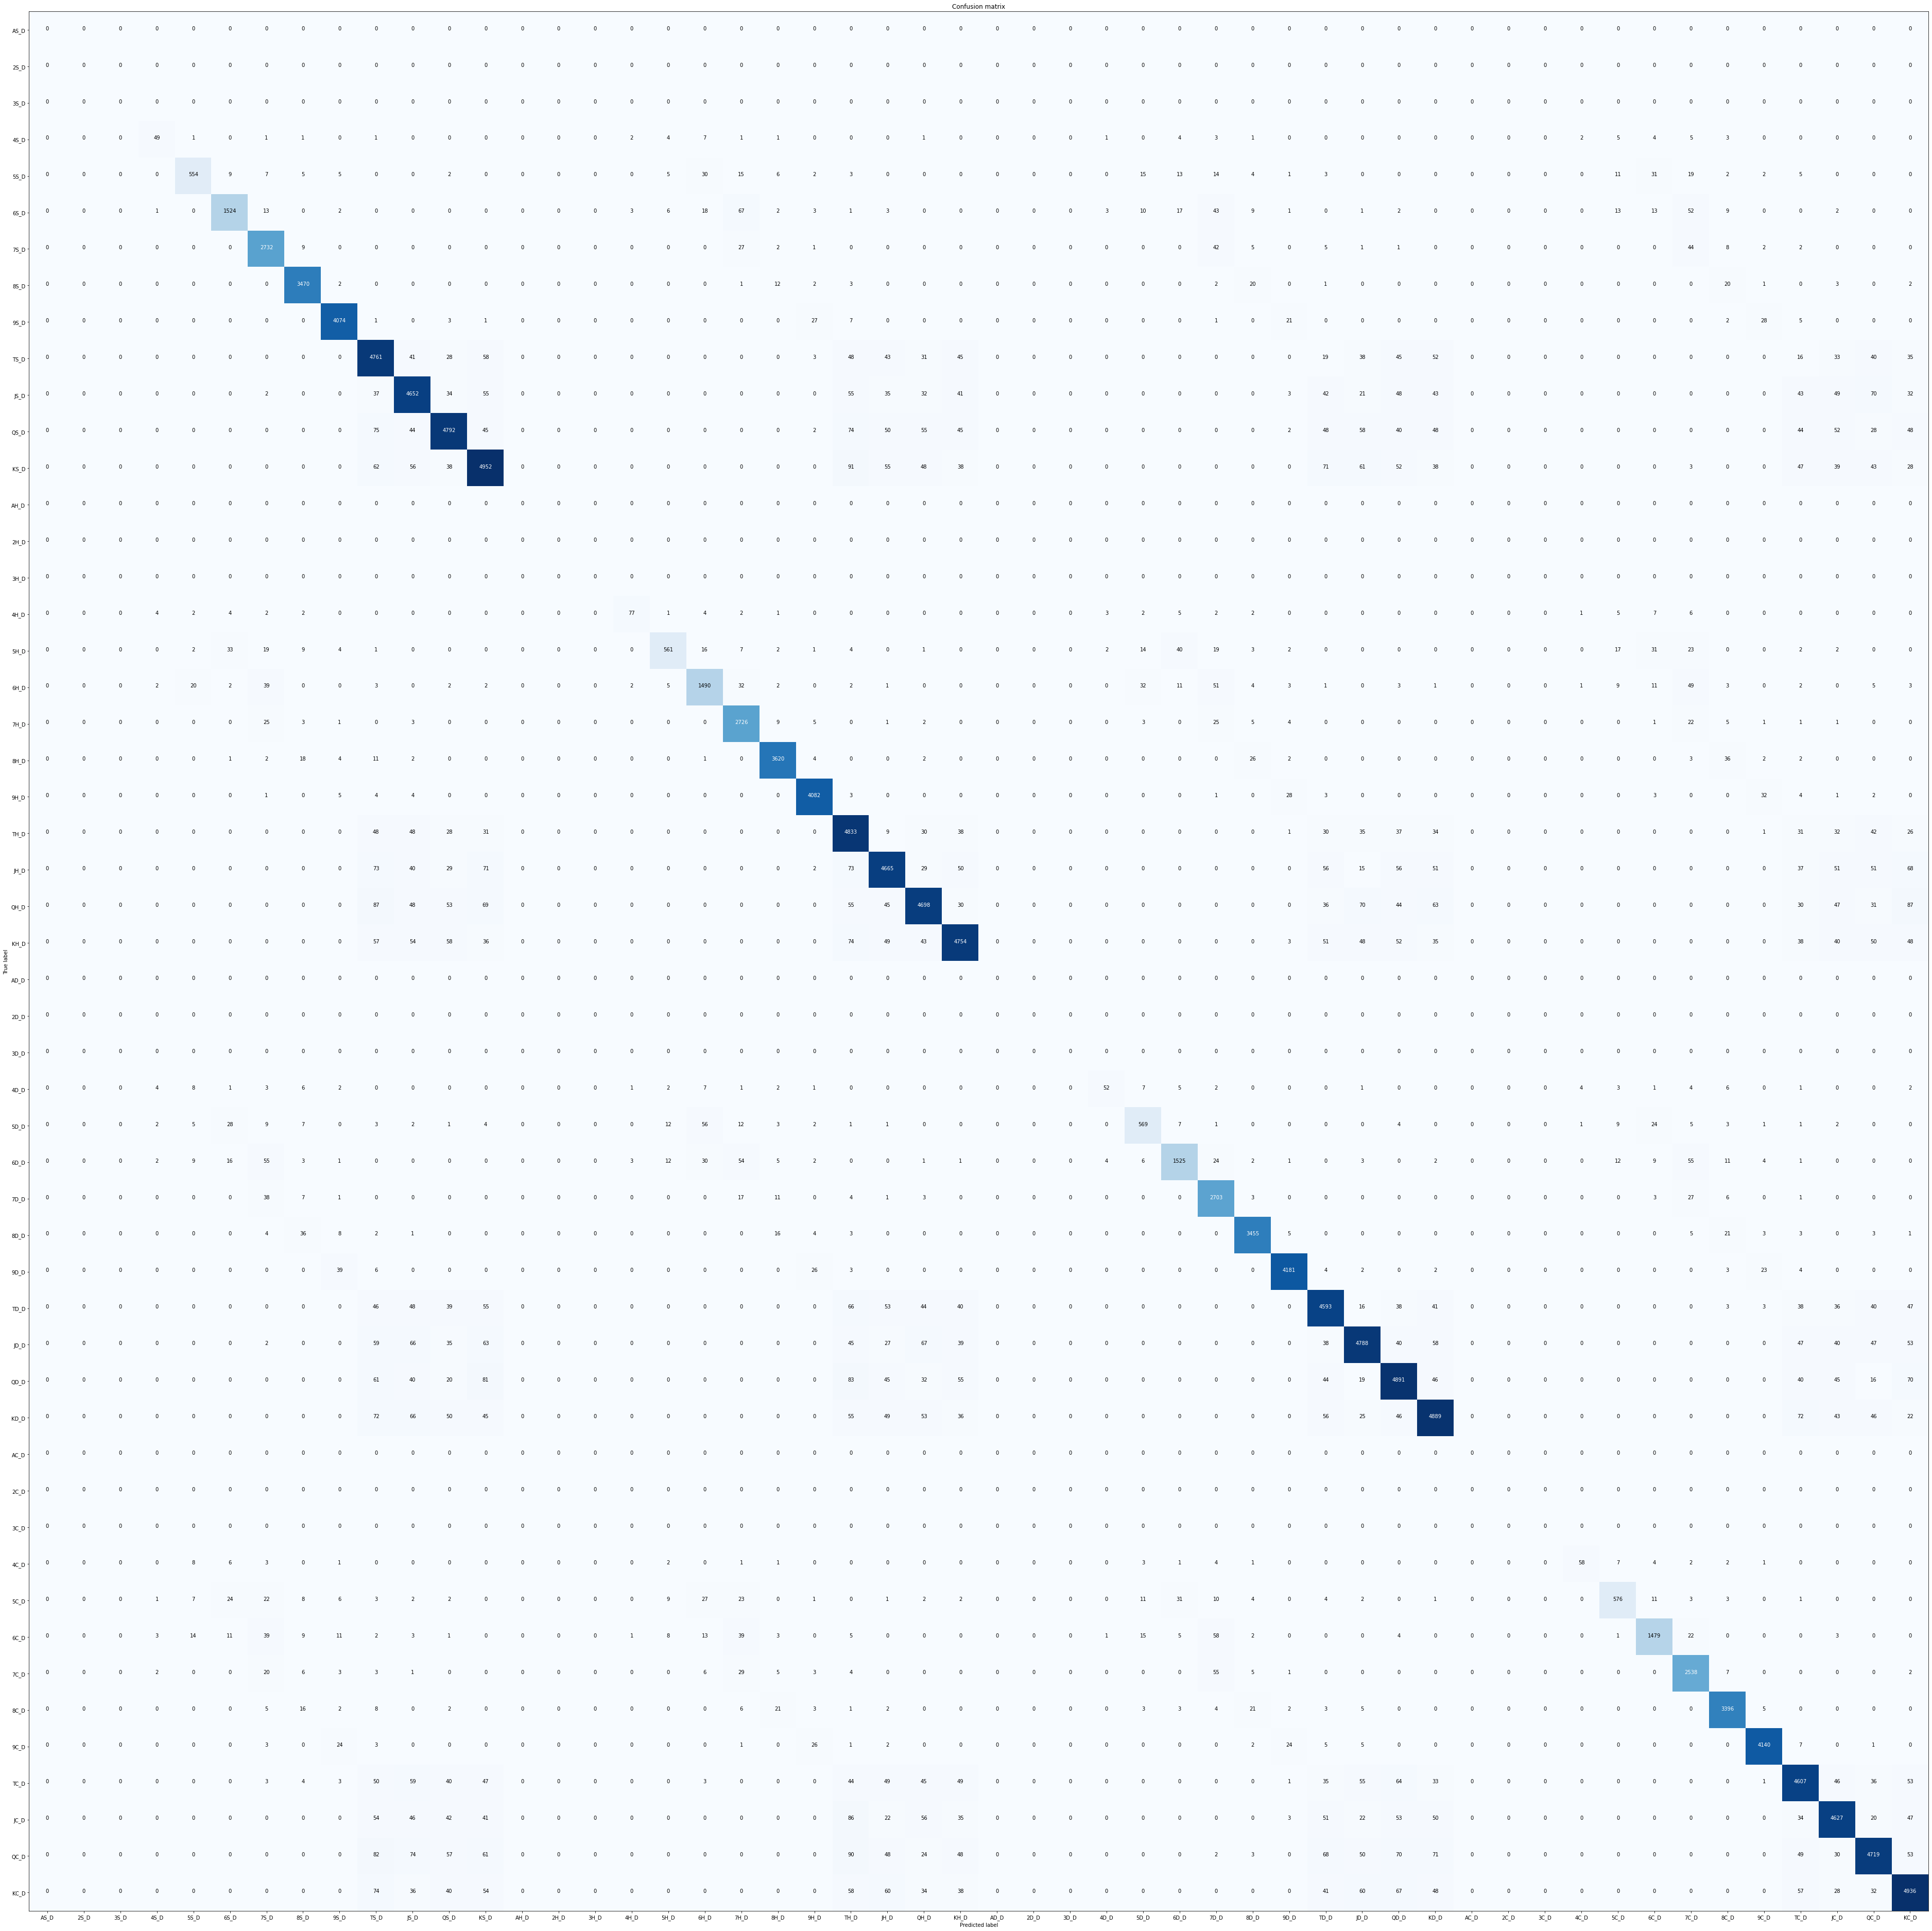

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, val_loader, device, numGames=currGames, mode='val')

##### Test Set (6k)

loading 6000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/apbd/discard
Accuracy: 92.97
Normalized confusion matrix


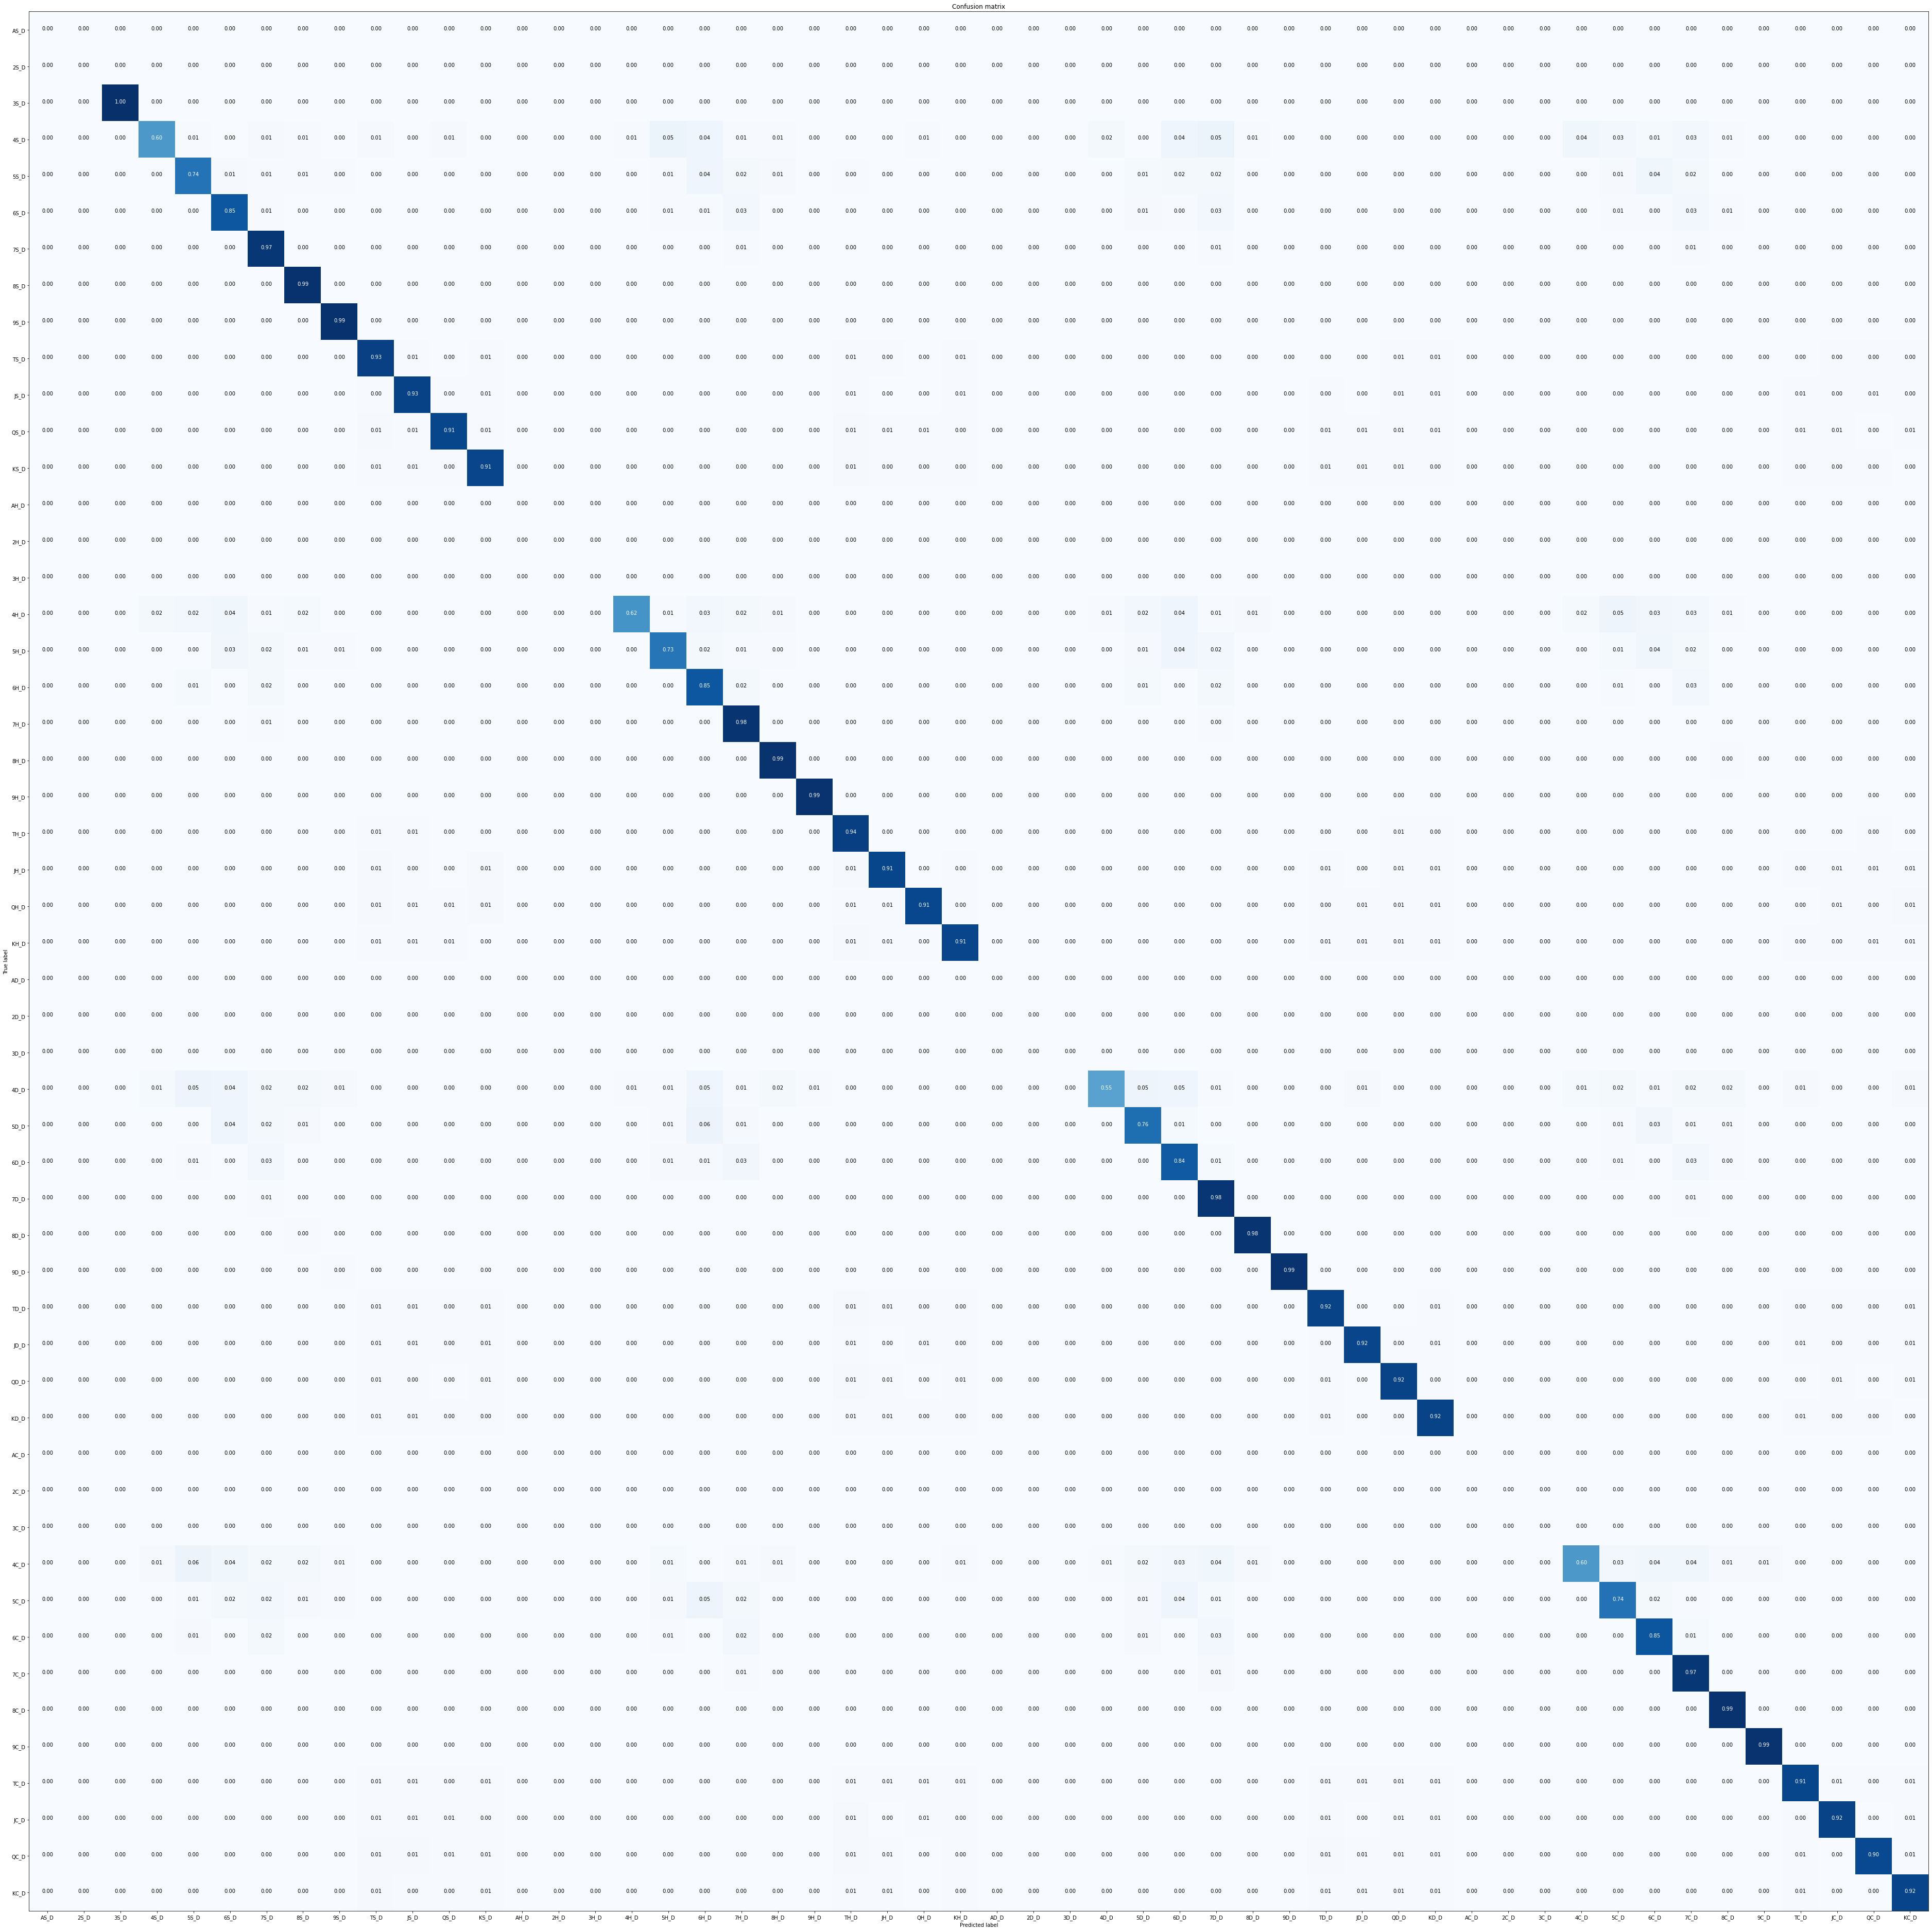

Confusion matrix, without normalization


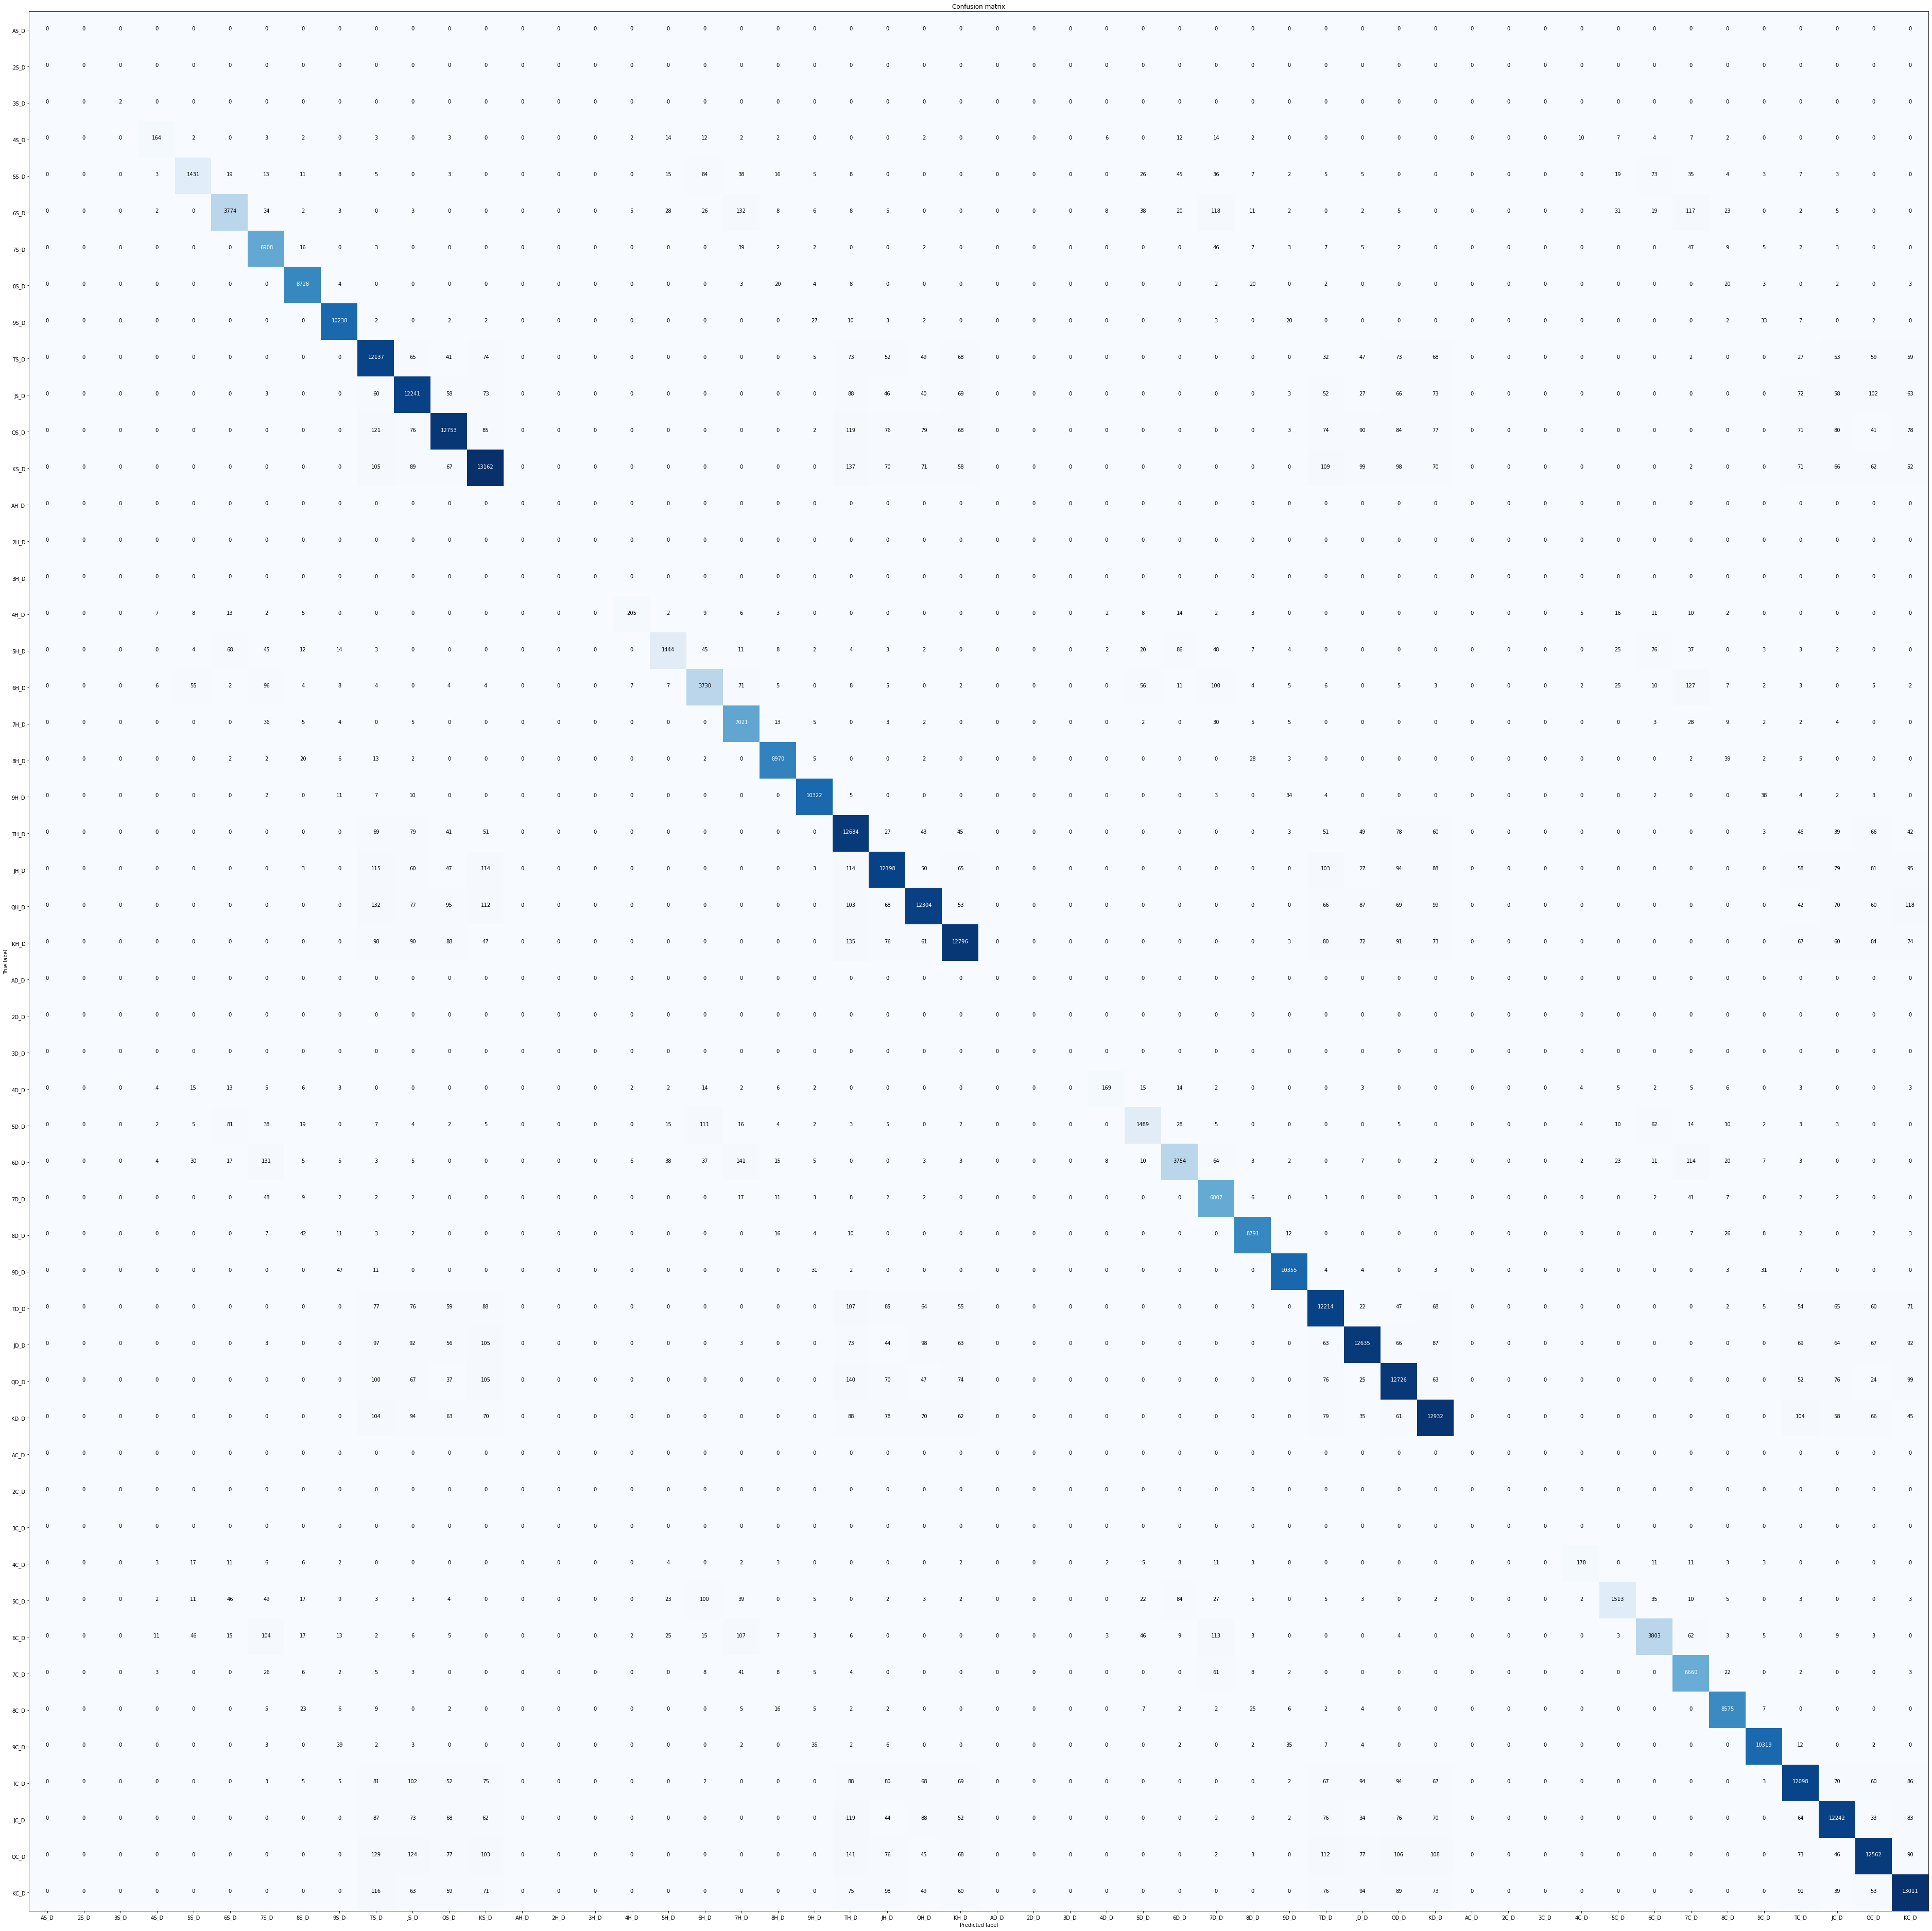

In [ ]:
currGames = 6000
test_loader_6k, classes = load_test_data(data_pth, currGames, 
                                         pruneStatesList, actionChoice)
plot_cm(plot_pth, classes, model, test_loader_6k, device, numGames=currGames)

##### Test Set (2k)

Test on all three models generated:

In [ ]:
currGames = 2000
test_loader_2k, classes = load_test_data(data_pth, currGames, 
                                         pruneStatesList, actionChoice)

loading 2000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/apbd/discard


###### all epoch

Accuracy: 93.16
Normalized confusion matrix


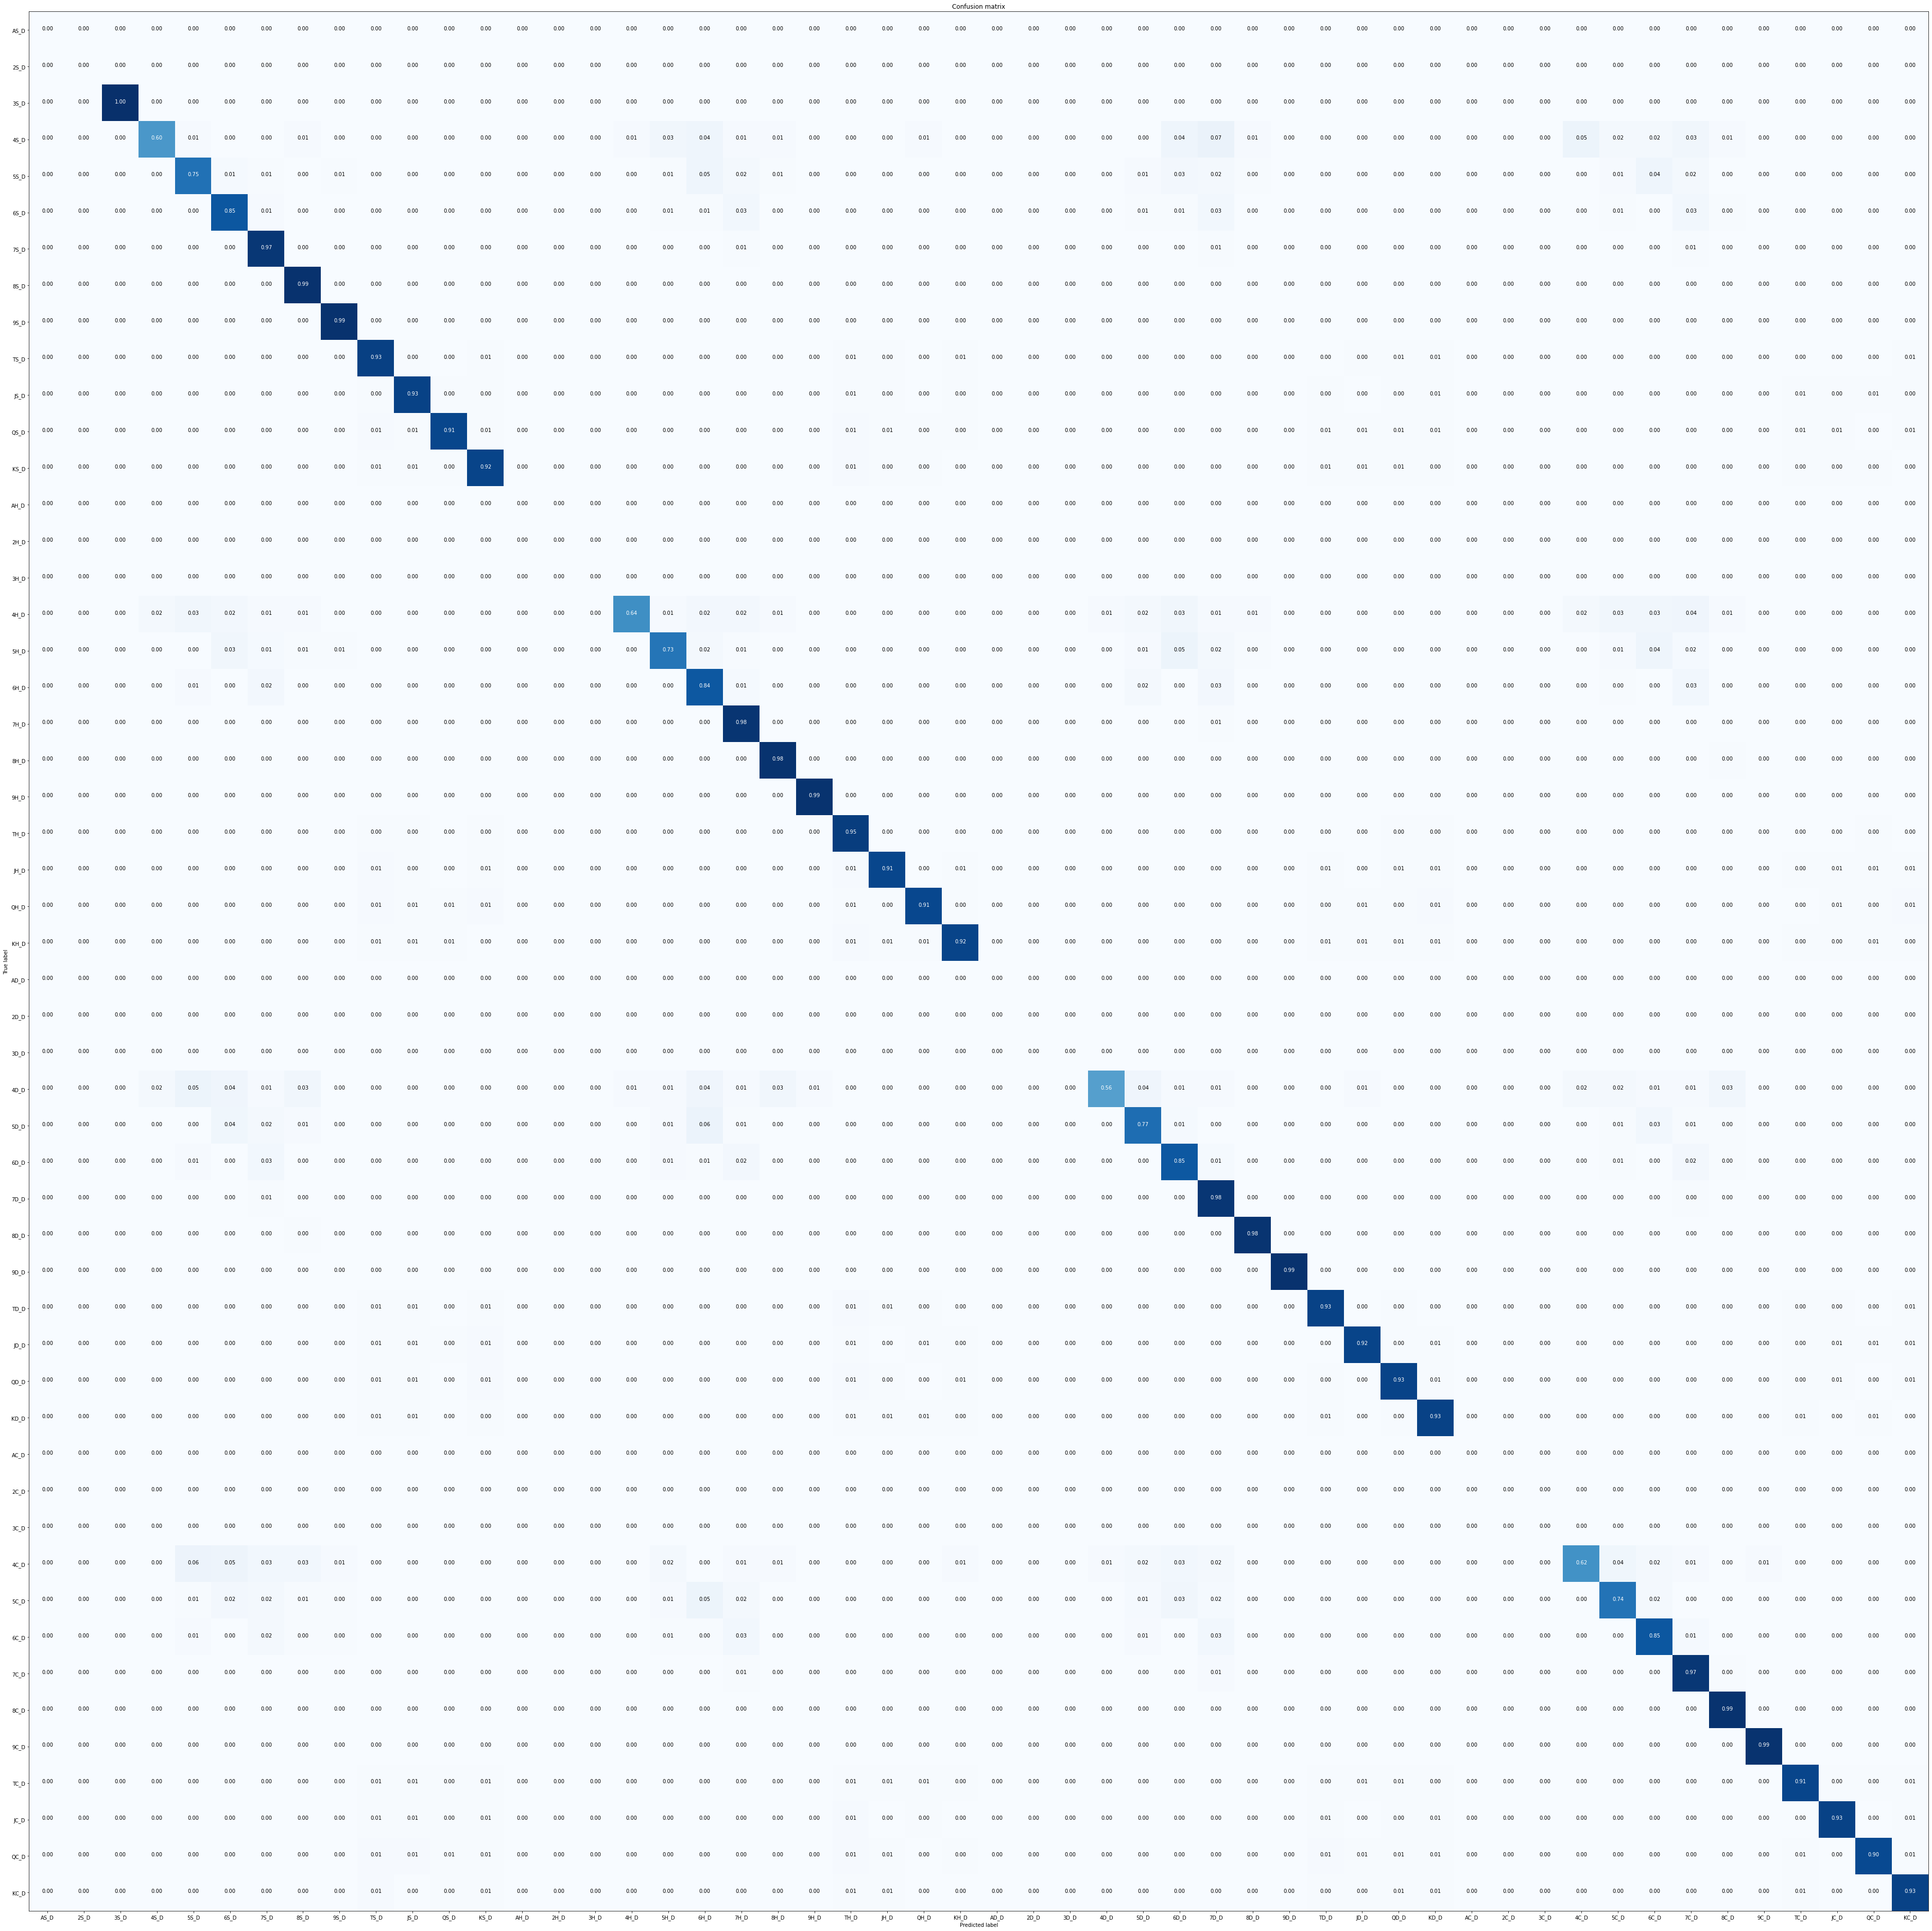

Confusion matrix, without normalization


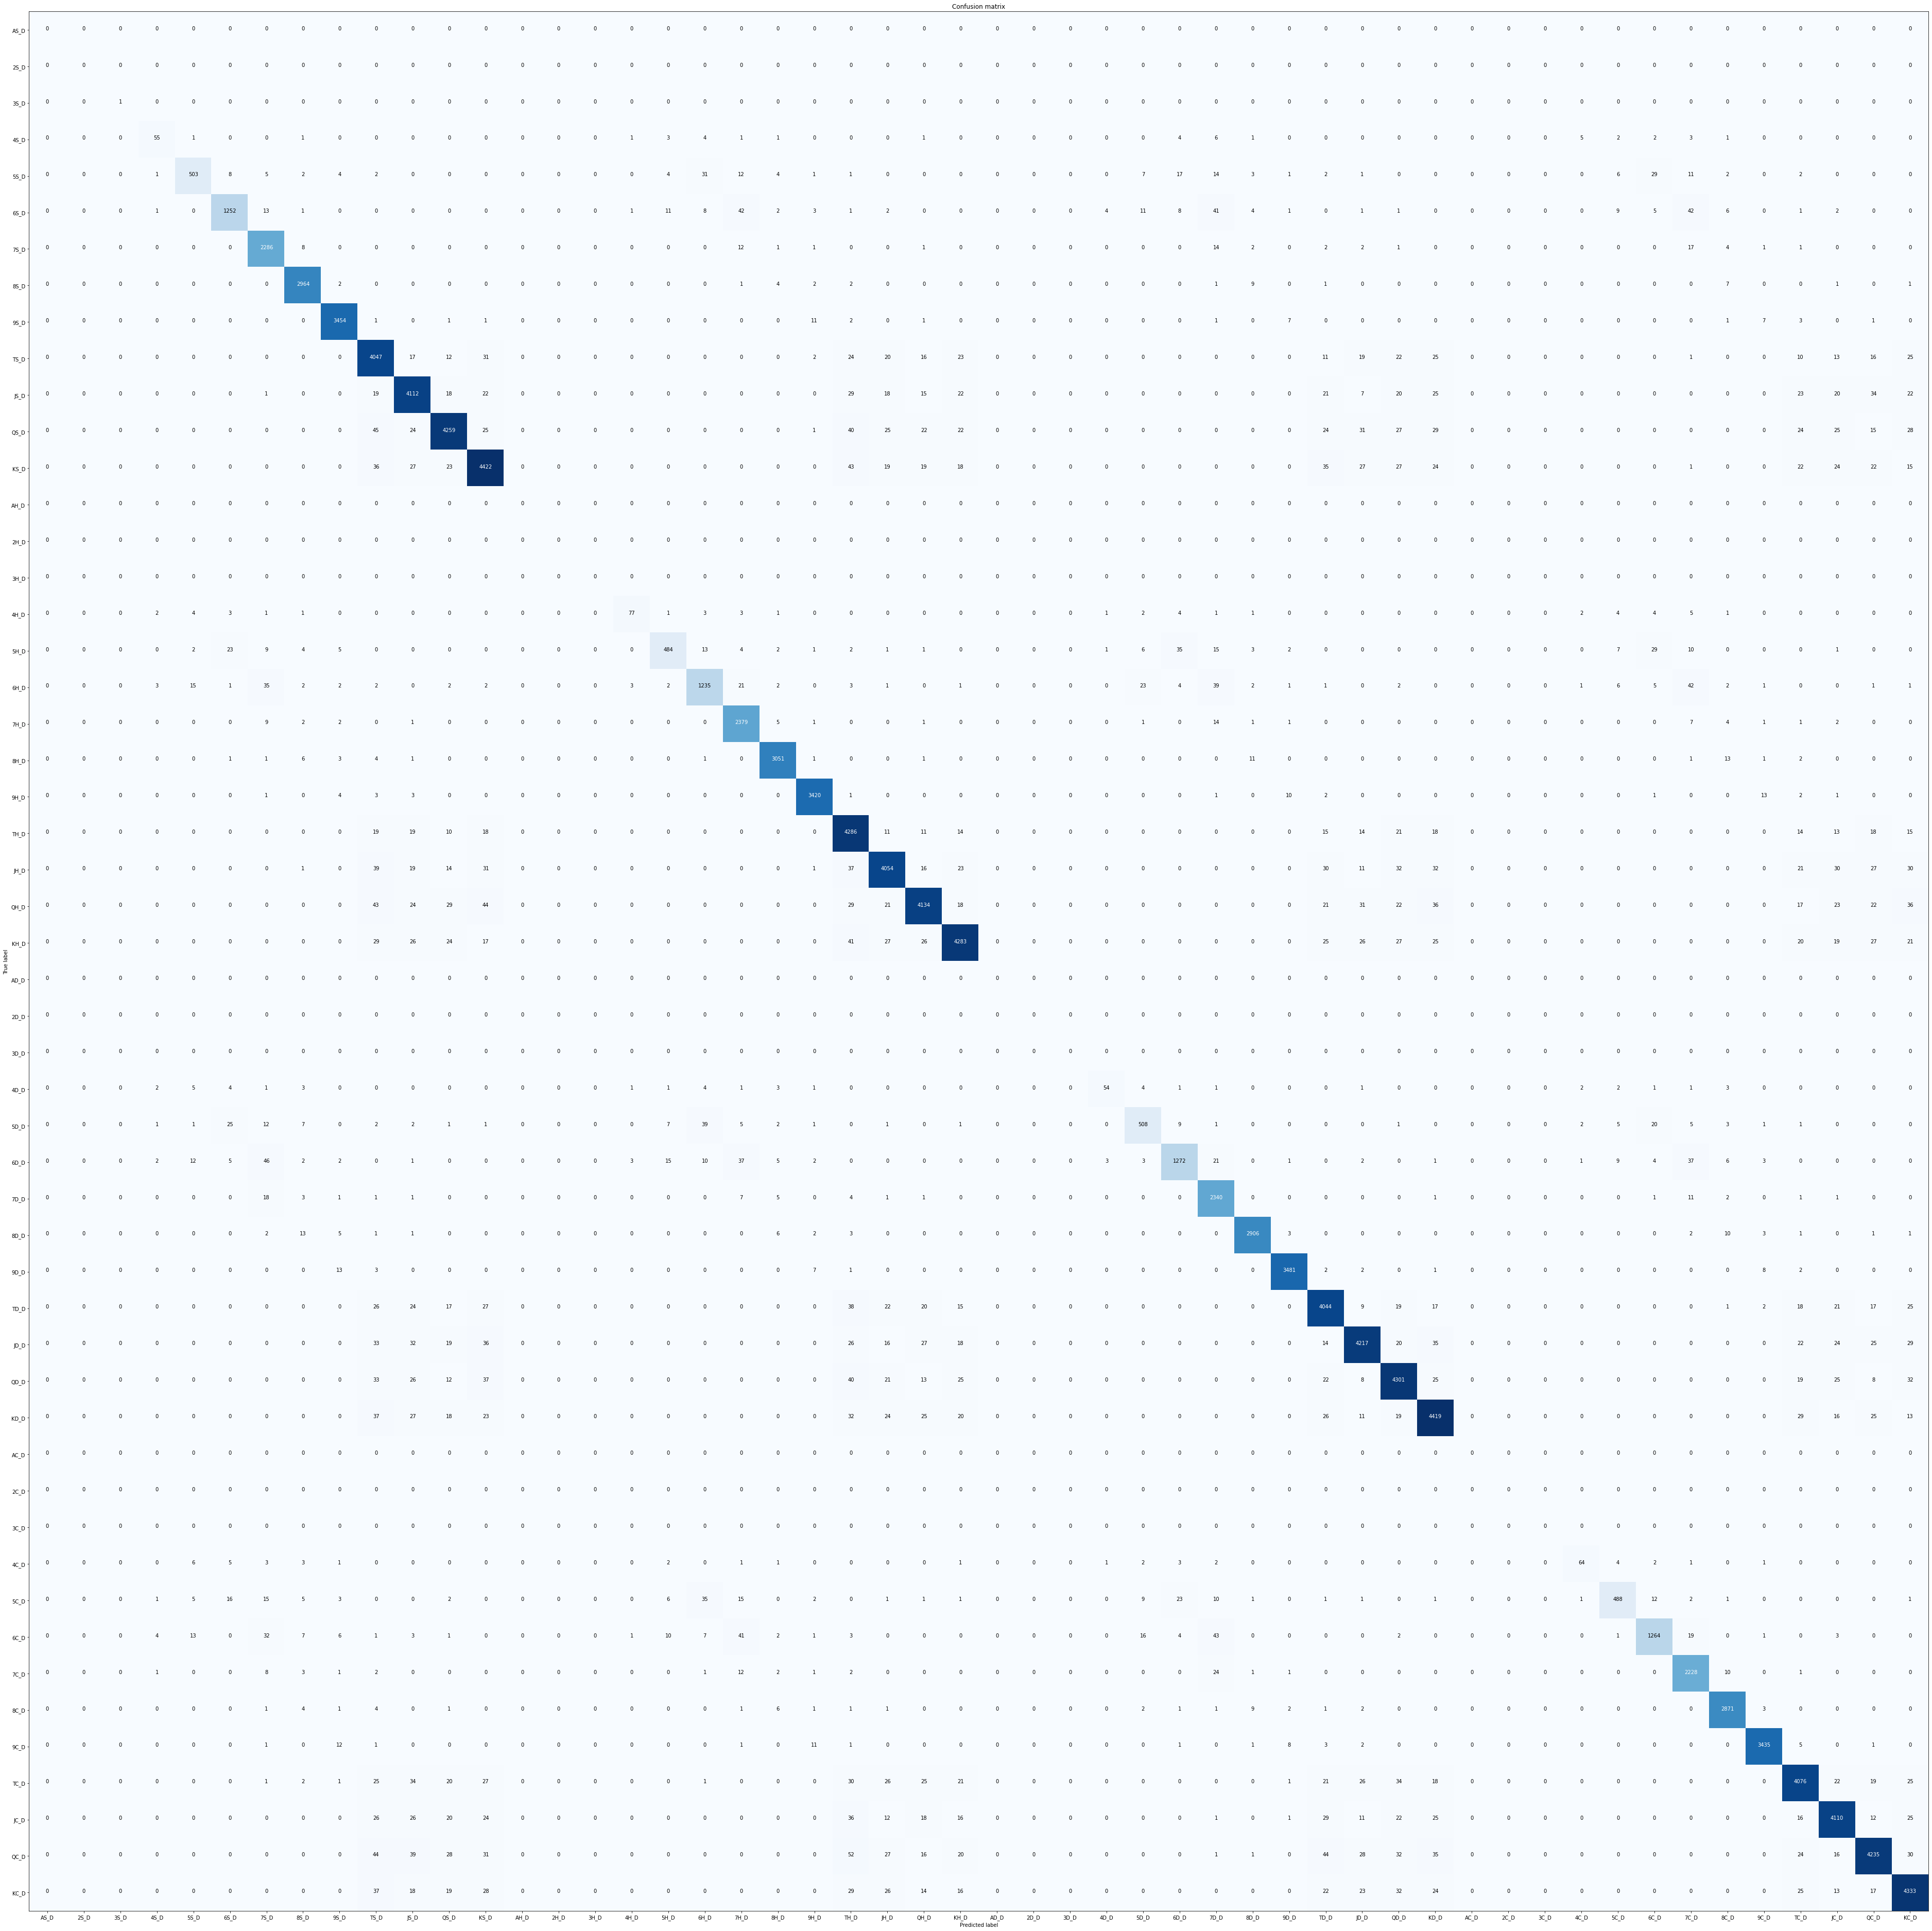

In [ ]:
plot_cm(plot_pth, classes, model, test_loader_2k, device, numGames=currGames)

###### max validation accuracy

Accuracy: 93.15
Normalized confusion matrix


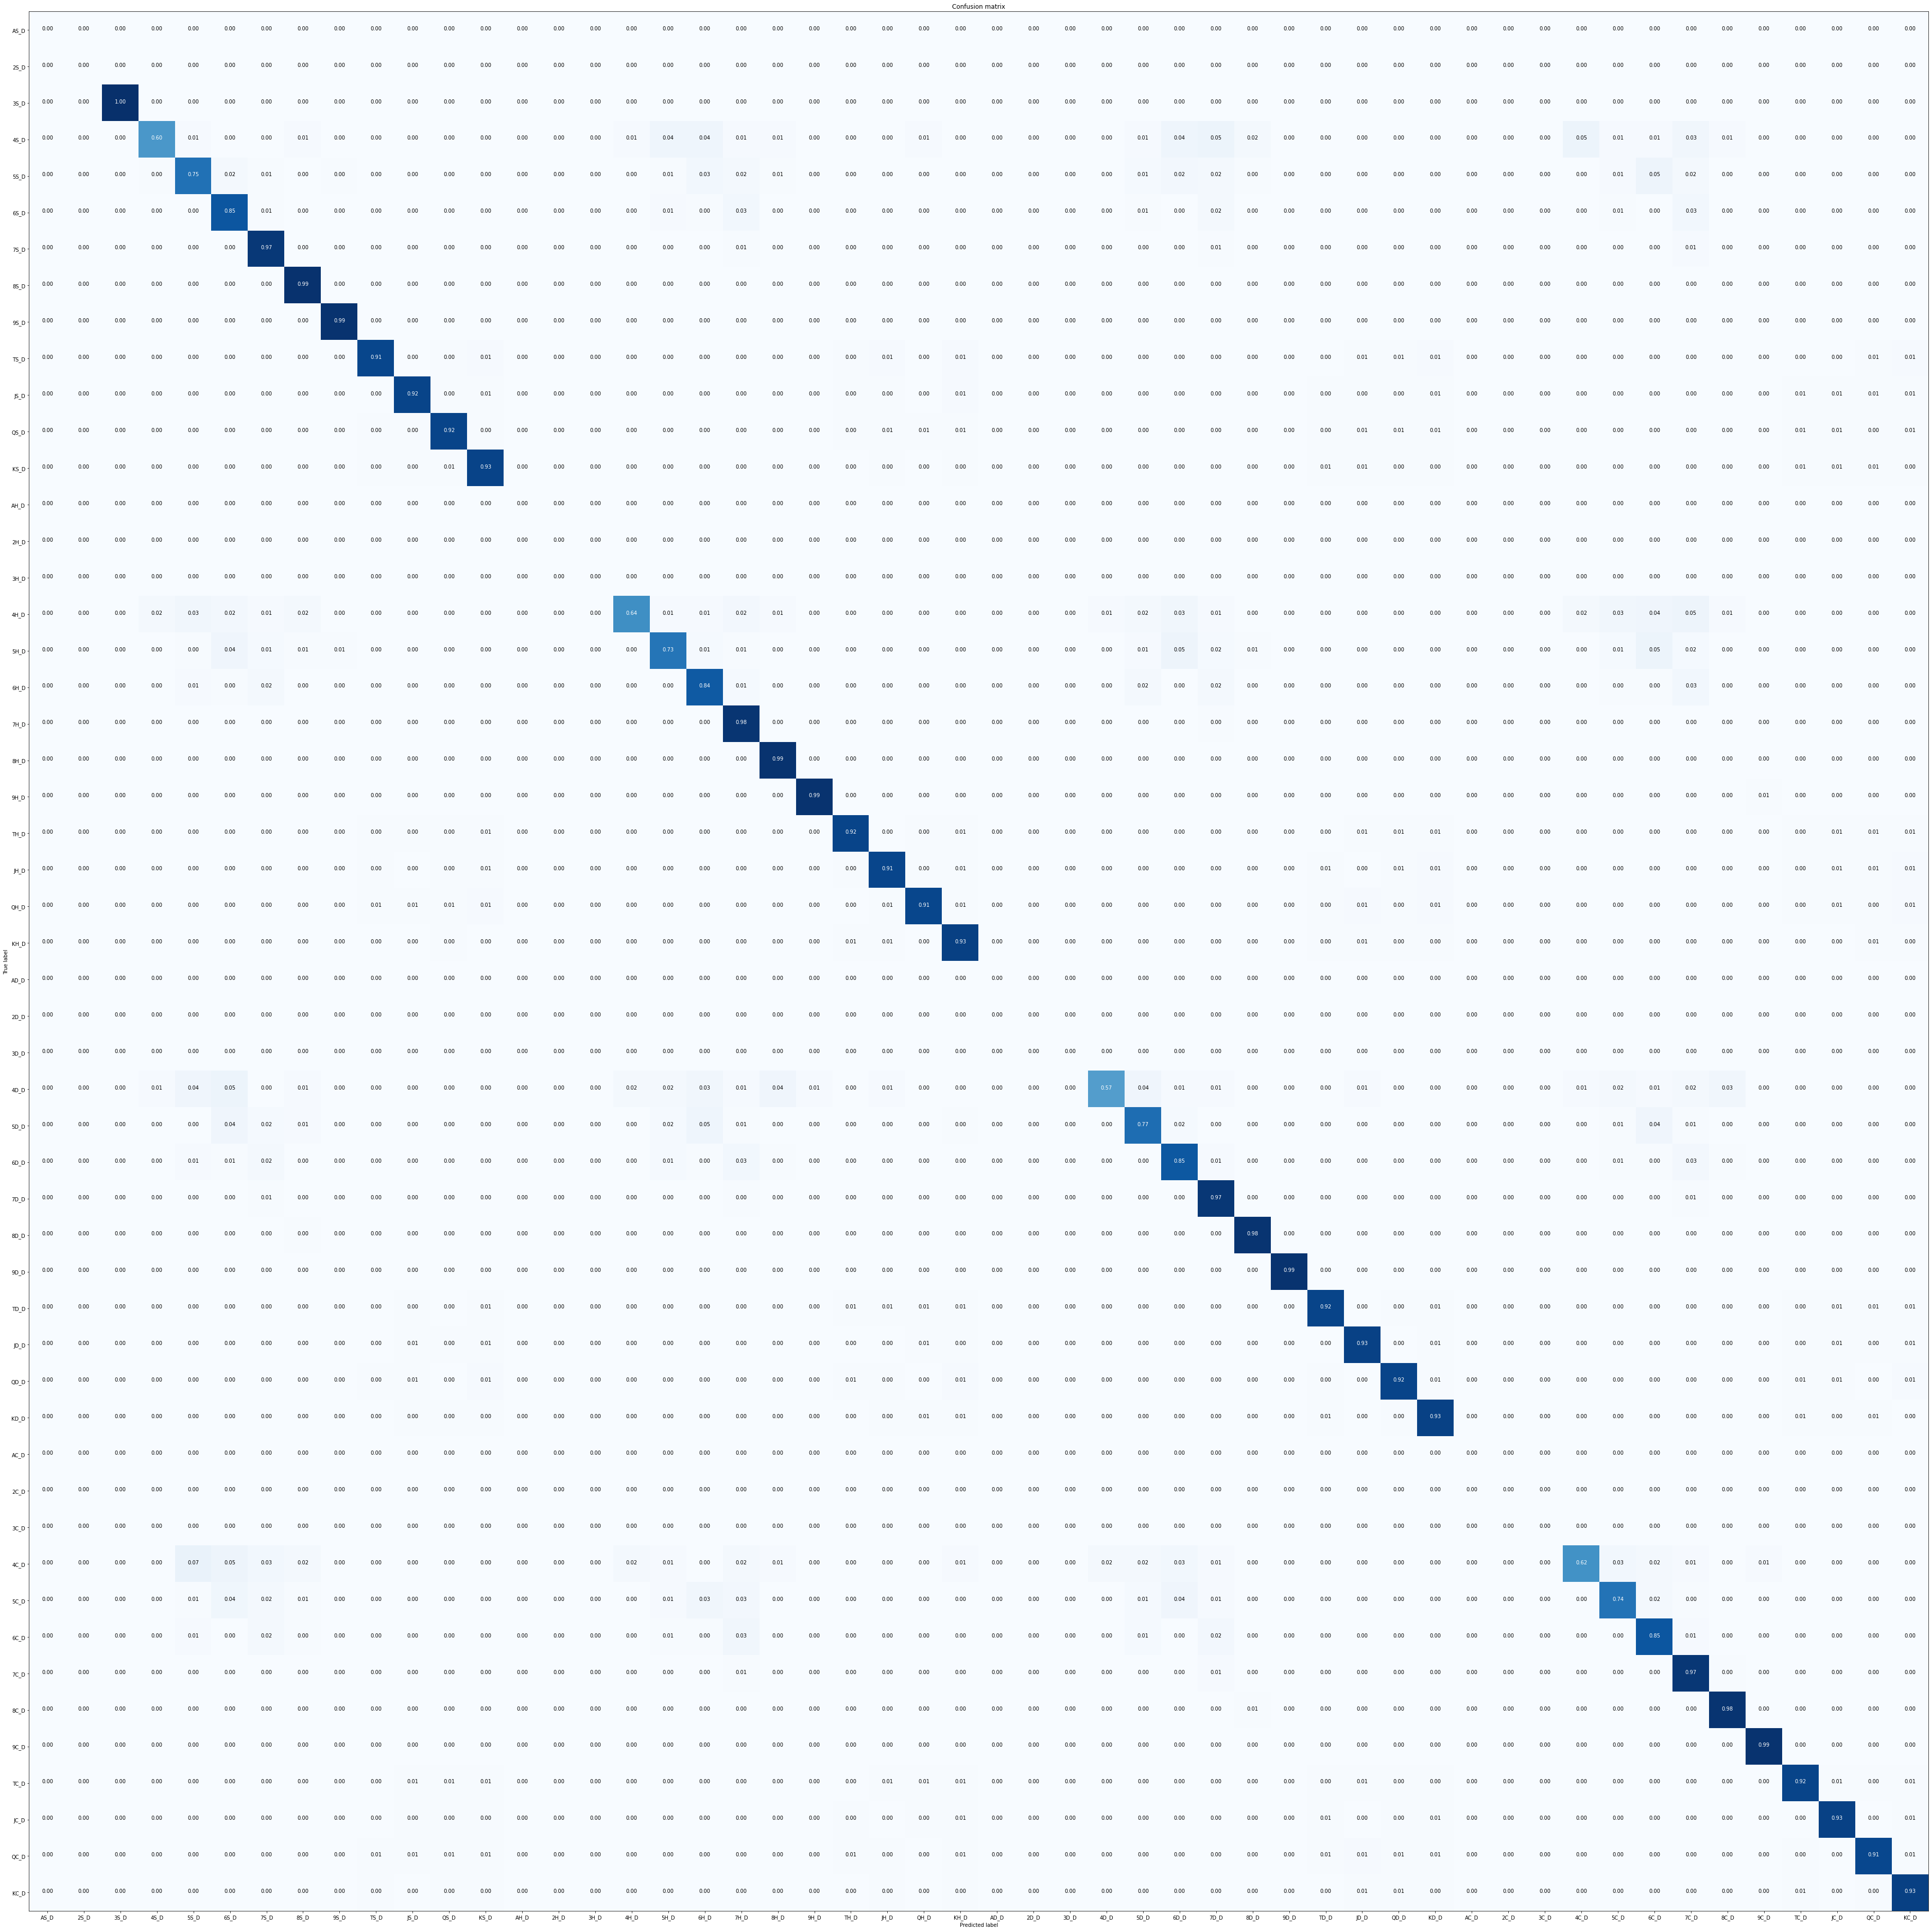

Confusion matrix, without normalization


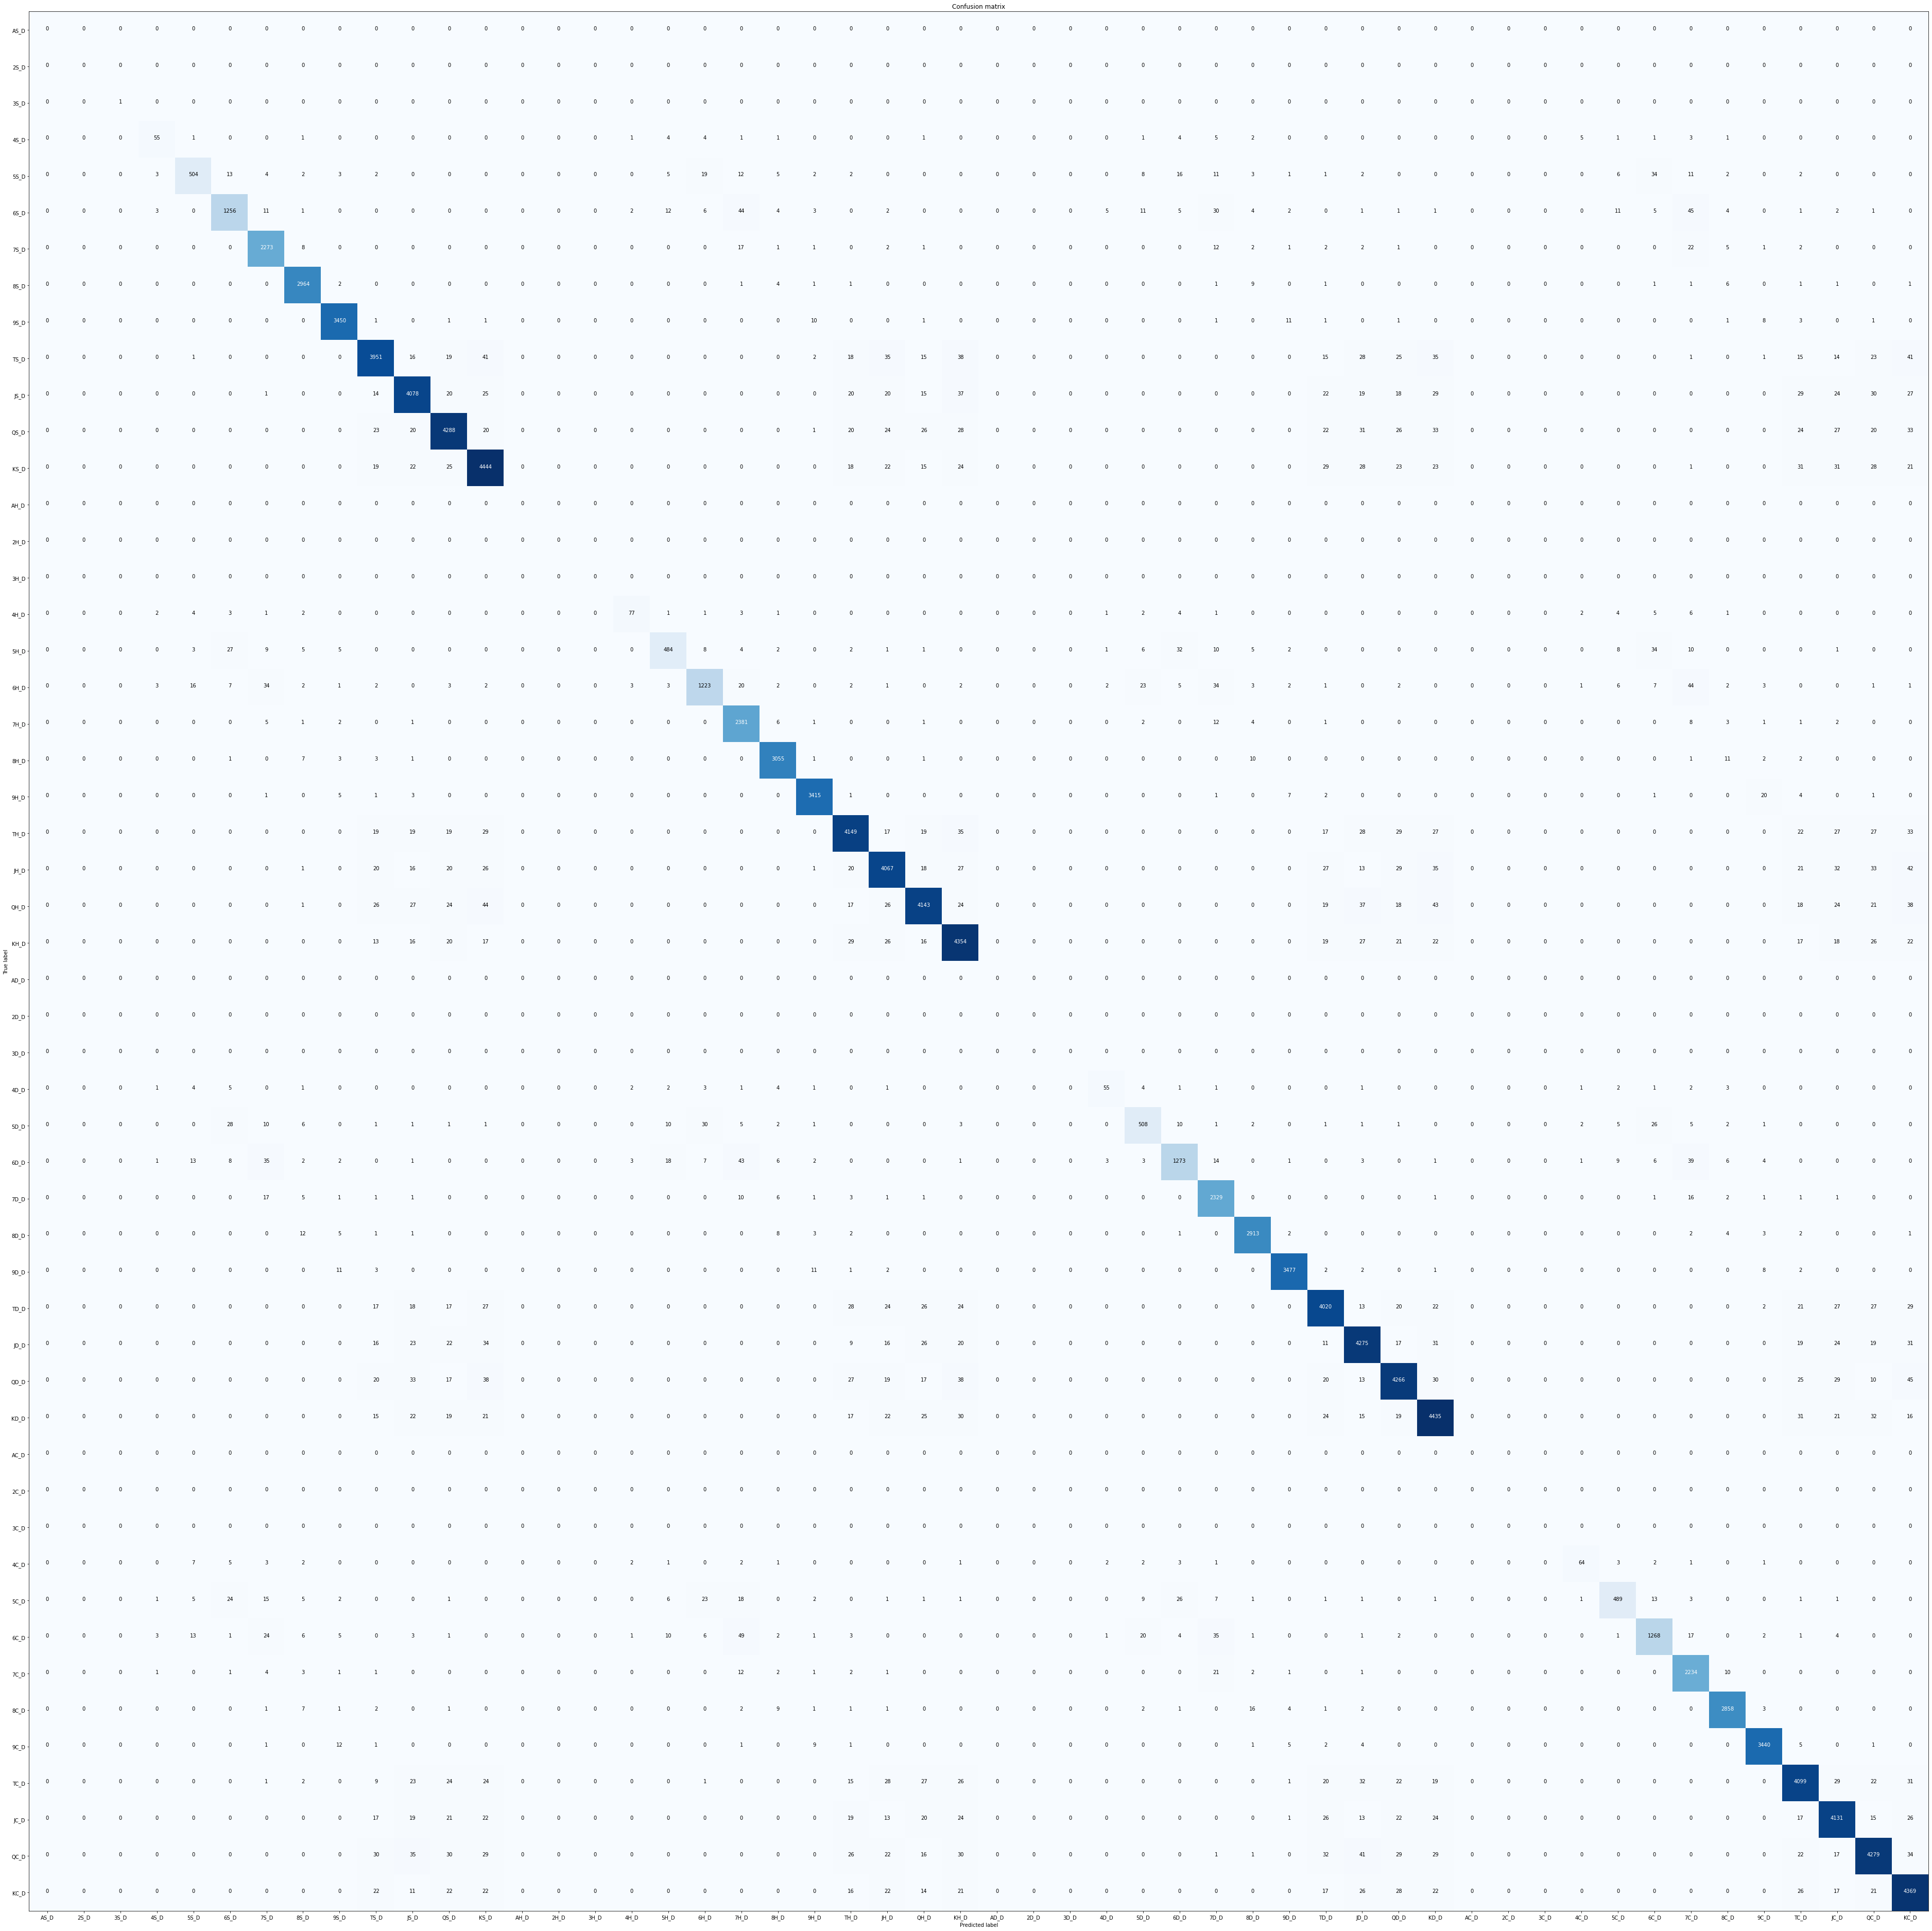

In [ ]:
plot_cm(plot_pth, classes, model_acc, test_loader_2k, device, numGames=currGames, mode='acc')

###### min validation loss

Accuracy: 93.16
Normalized confusion matrix


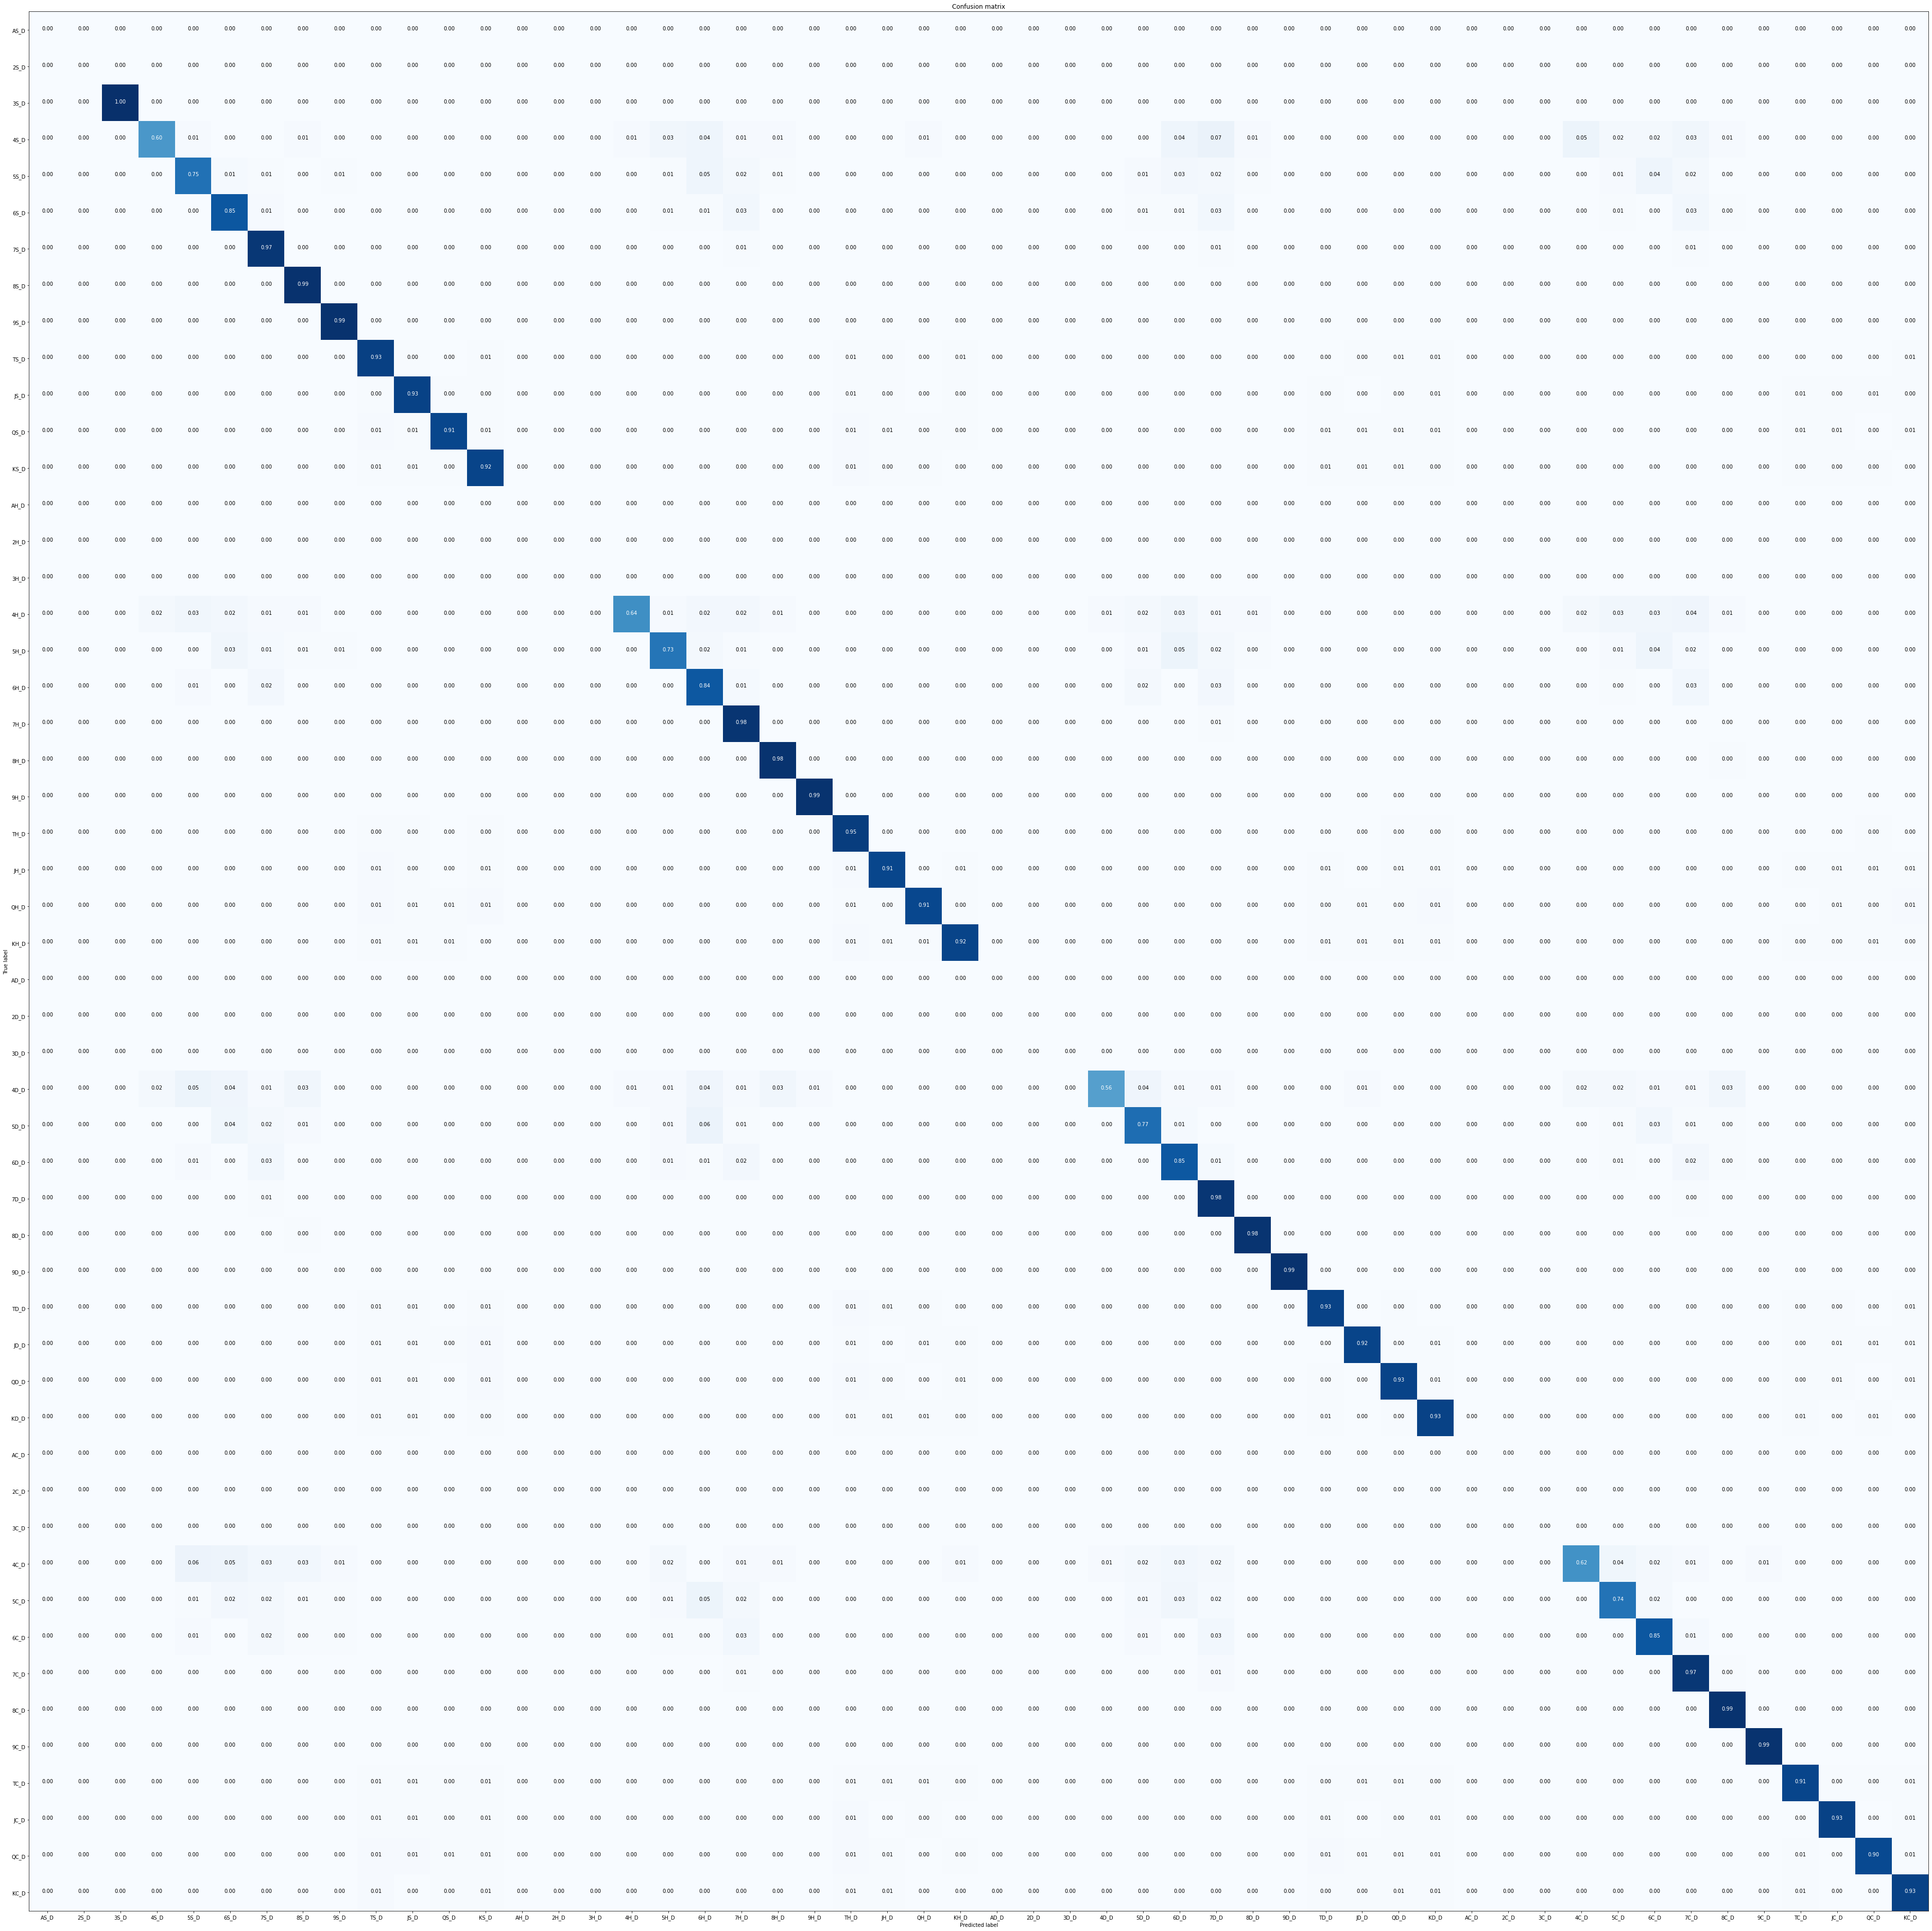

Confusion matrix, without normalization


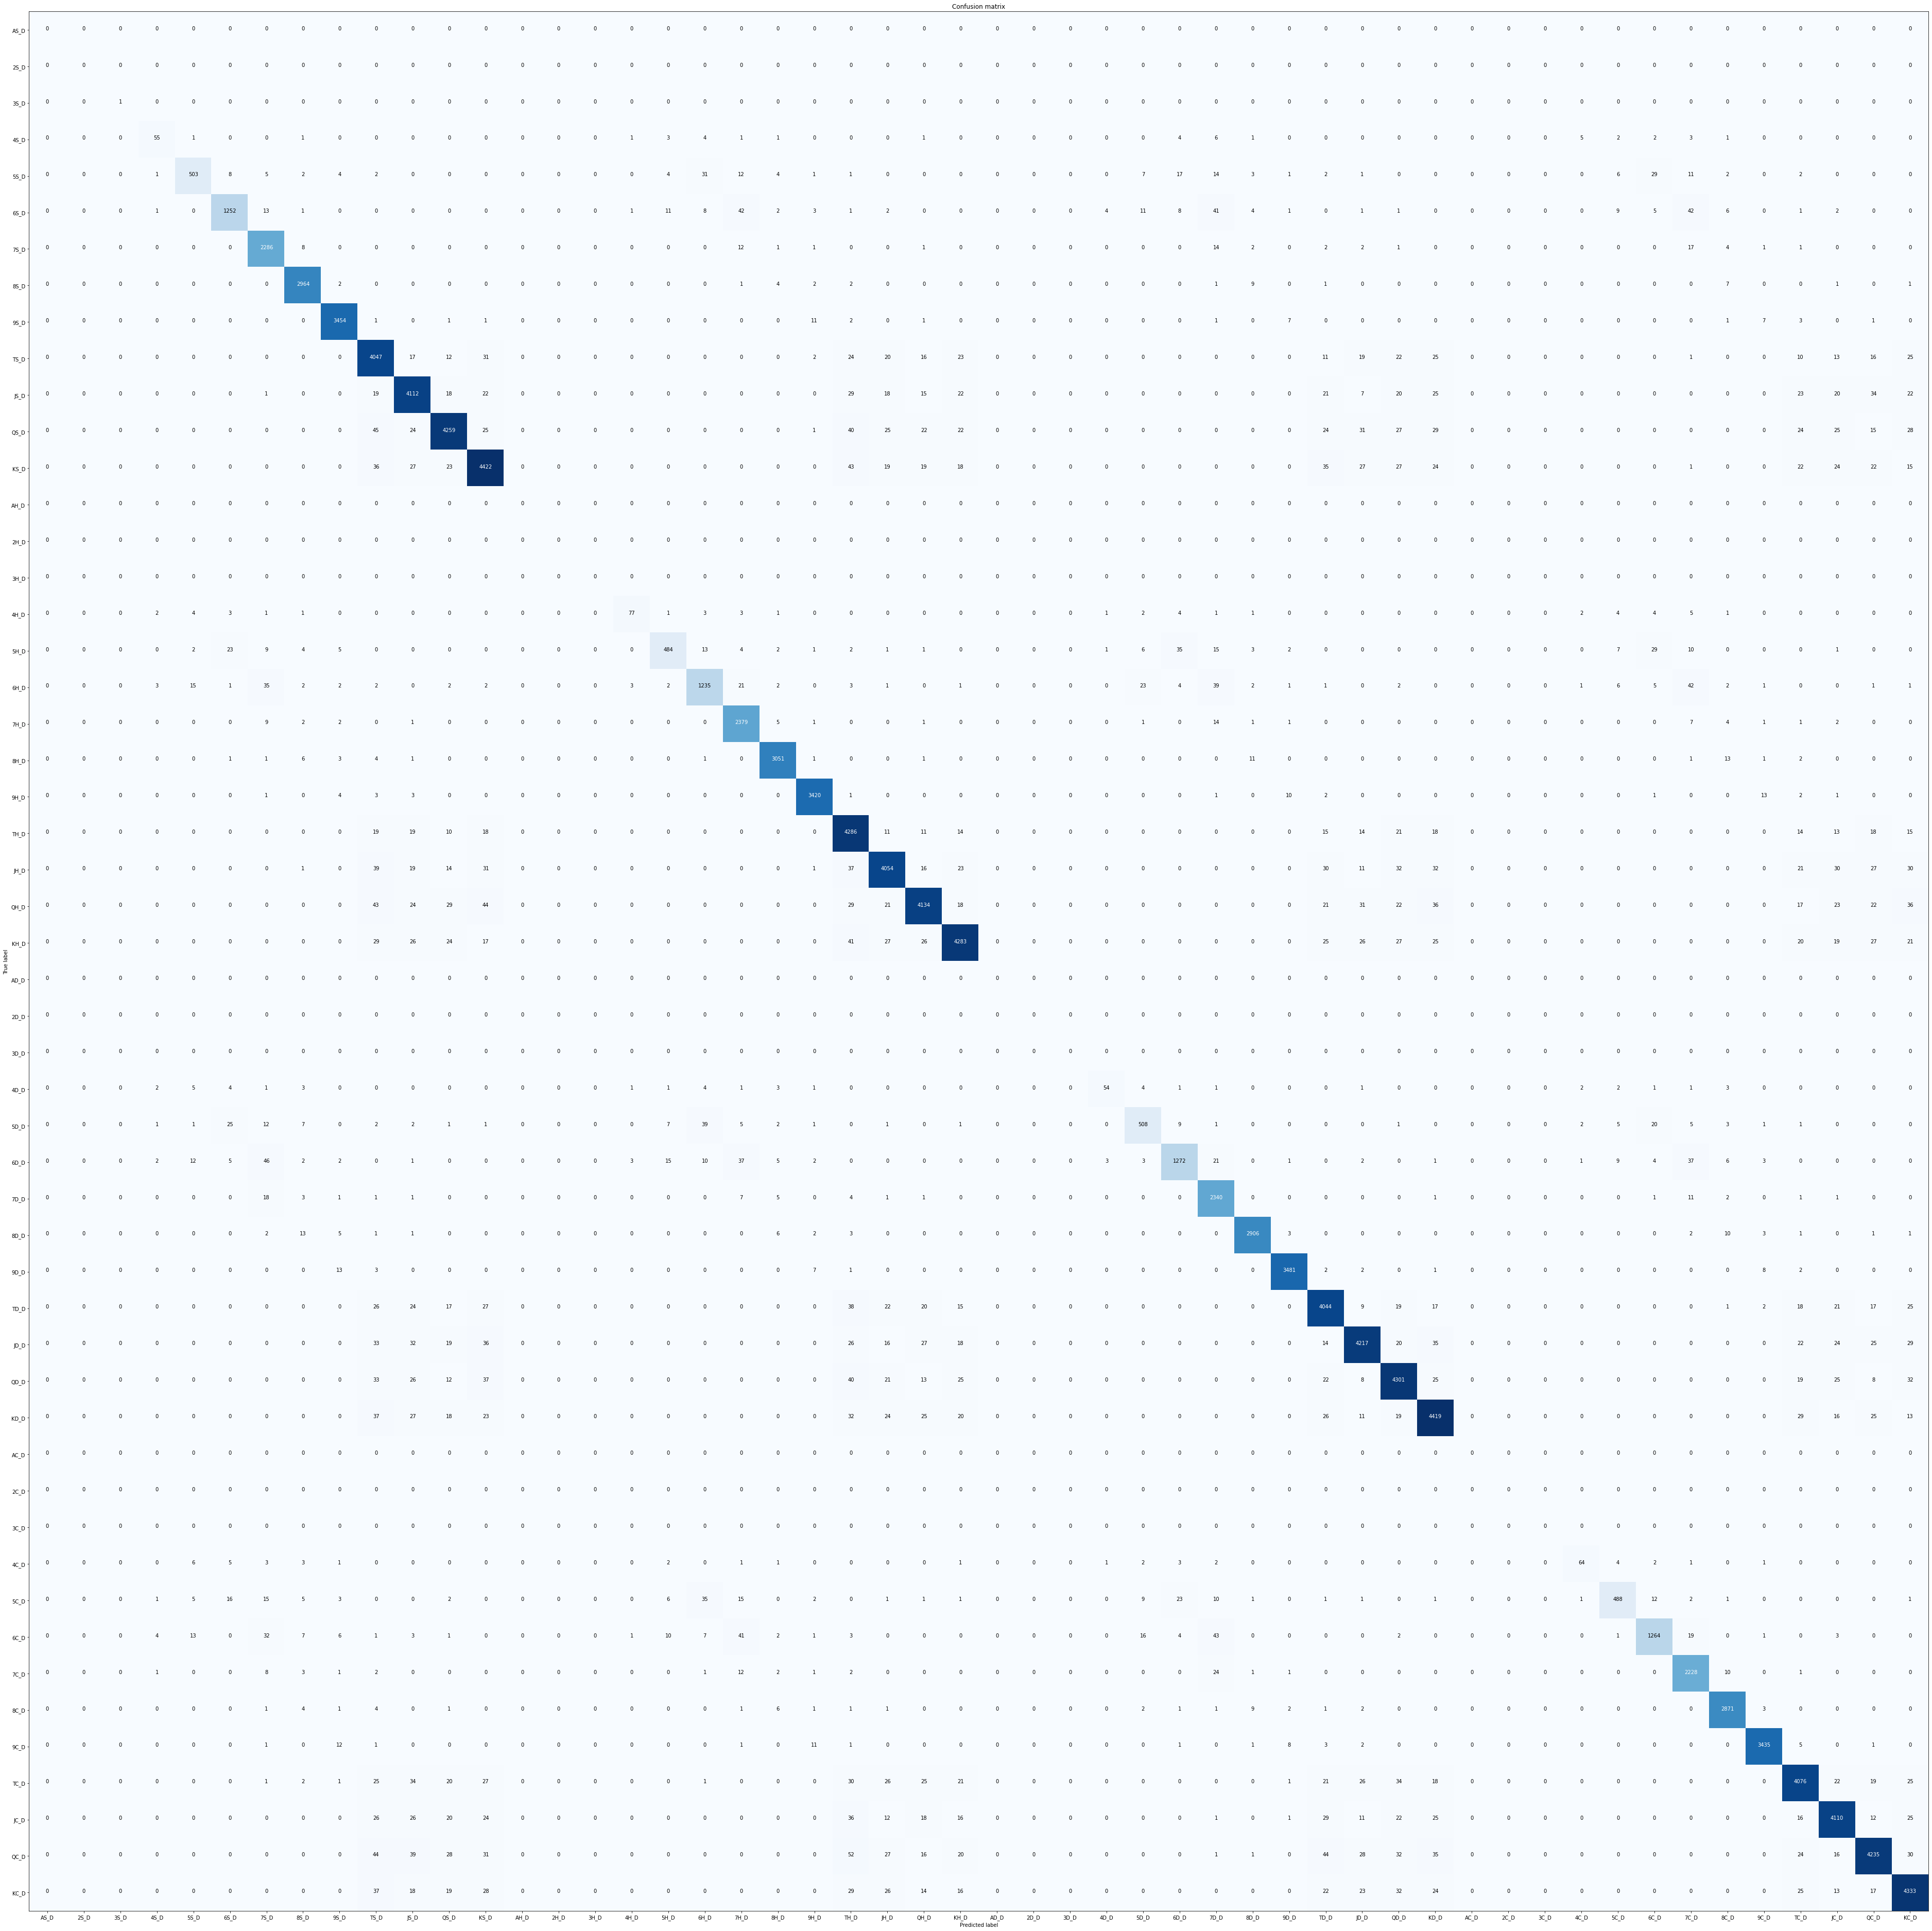

In [ ]:
plot_cm(plot_pth, classes, model_loss, test_loader_2k, device, numGames=currGames, mode='loss')

## all_states_discard_only_PT

### Parameters

In [6]:
# state_action pair
state = 'apbd'
action = 'discard'

# model name
model_name = 'all_states_discard_only_PT'

# Number of Games
numGames = 8000

# prunable states
# {'currHand','topCard','deadCard','oppCard','unknownCard'} or blank if None
pruneStatesList = []

# choosable actions
# {'all','draw_pickup','discard','knock','knock_bin'}
actionChoice = 'discard'

# Balance classes
balance = False

# Training parameters
batch_size = 1000
lr = 0.001
epochs = 100

# Pretrain model
pre_train = True
model_PT = '/content/drive/MyDrive/Colab Notebooks/Thesis/models/apad/knock_bin/all_states_all_actions/model.pt'

# device for model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Create Directories

In [7]:
data_pth, model_pth, plot_pth = create_dir(pth, state, action, model_name)

Directories created.


### Load, Prune, and Split Training Data

In [8]:
train_loader, val_loader, _,  classes = load_train_data(data_pth, plot_pth,
                                                        numGames, batch_size, 
                                                        pruneStatesList, actionChoice, 
                                                        balance, visualize=False)

loading 8000 games dataset from "/content/drive/MyDrive/Colab Notebooks/Thesis/data/apbd/discard"


### Train Model

Epoch: 1 | Train Loss: 0.02358961 | Train acc: 0.070692
              Val Loss: 0.01842869 |   Val acc: 0.137493
Epoch: 2 | Train Loss: 0.01766200 | Train acc: 0.278408
              Val Loss: 0.01617311 |   Val acc: 0.398665
Epoch: 3 | Train Loss: 0.01376535 | Train acc: 0.500487
              Val Loss: 0.01193005 |   Val acc: 0.568448
Epoch: 4 | Train Loss: 0.01121737 | Train acc: 0.600013
              Val Loss: 0.01080003 |   Val acc: 0.619150
Epoch: 5 | Train Loss: 0.01045598 | Train acc: 0.635378
              Val Loss: 0.01027070 |   Val acc: 0.637951
Epoch: 6 | Train Loss: 0.00997657 | Train acc: 0.654589
              Val Loss: 0.00985346 |   Val acc: 0.655148
Epoch: 7 | Train Loss: 0.00955827 | Train acc: 0.668373
              Val Loss: 0.00946302 |   Val acc: 0.665426
Epoch: 8 | Train Loss: 0.00915108 | Train acc: 0.680447
              Val Loss: 0.00907515 |   Val acc: 0.677878
Epoch: 9 | Train Loss: 0.00875225 | Train acc: 0.693171
              Val Loss: 0.00871554 |   V

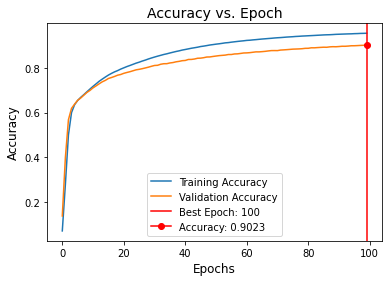

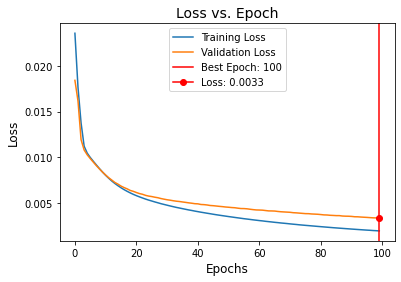

In [ ]:
model, model_acc, model_loss = train(train_loader, val_loader, plot_pth, batch_size, lr, epochs, verbose=True, pre_train=pre_train, model_PT=model_PT, device=device)
torch.save(model, '{}/model.pt'.format(model_pth))
torch.save(model_acc, '{}/model_acc.pt'.format(model_pth))
torch.save(model_loss, '{}/model_loss.pt'.format(model_pth))

#### Confusion Matrix

##### Load Models

In [ ]:
model = torch.load('{}/model.pt'.format(model_pth), map_location=device)
model_acc = torch.load('{}/model_acc.pt'.format(model_pth), map_location=device)
model_loss = torch.load('{}/model_loss.pt'.format(model_pth), map_location=device)

##### Train Set

Accuracy: 95.67
Normalized confusion matrix


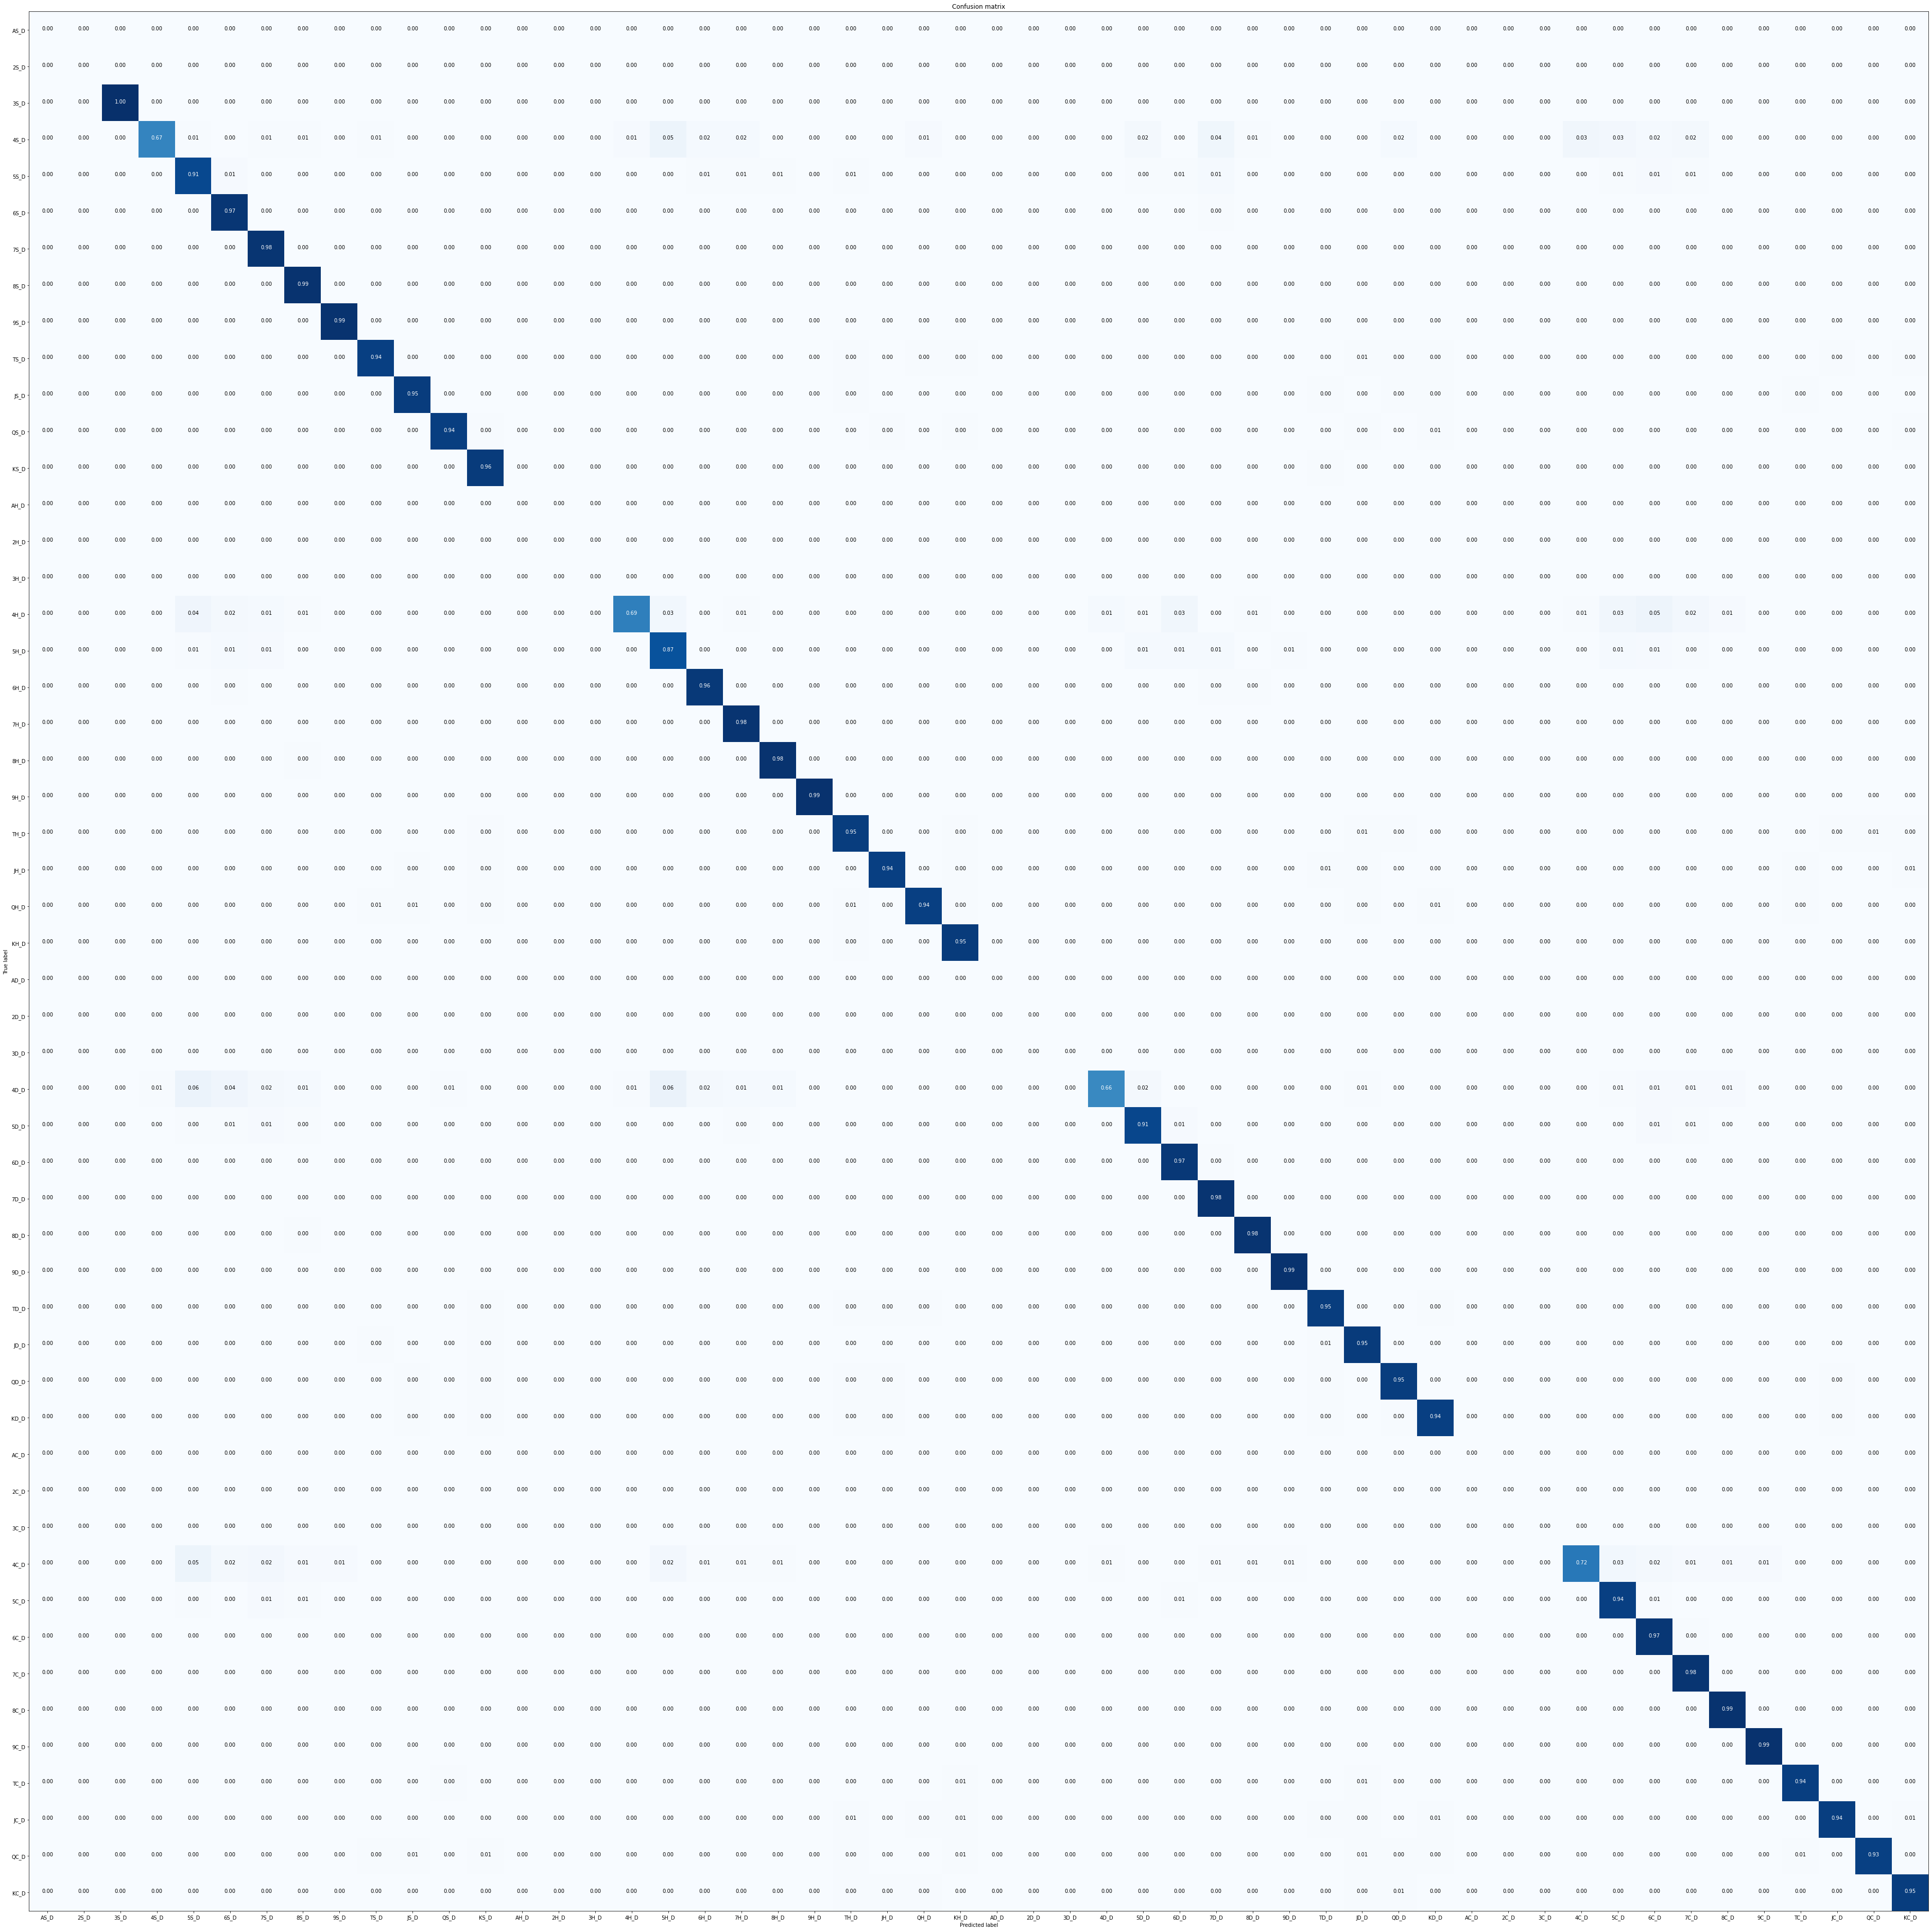

Confusion matrix, without normalization


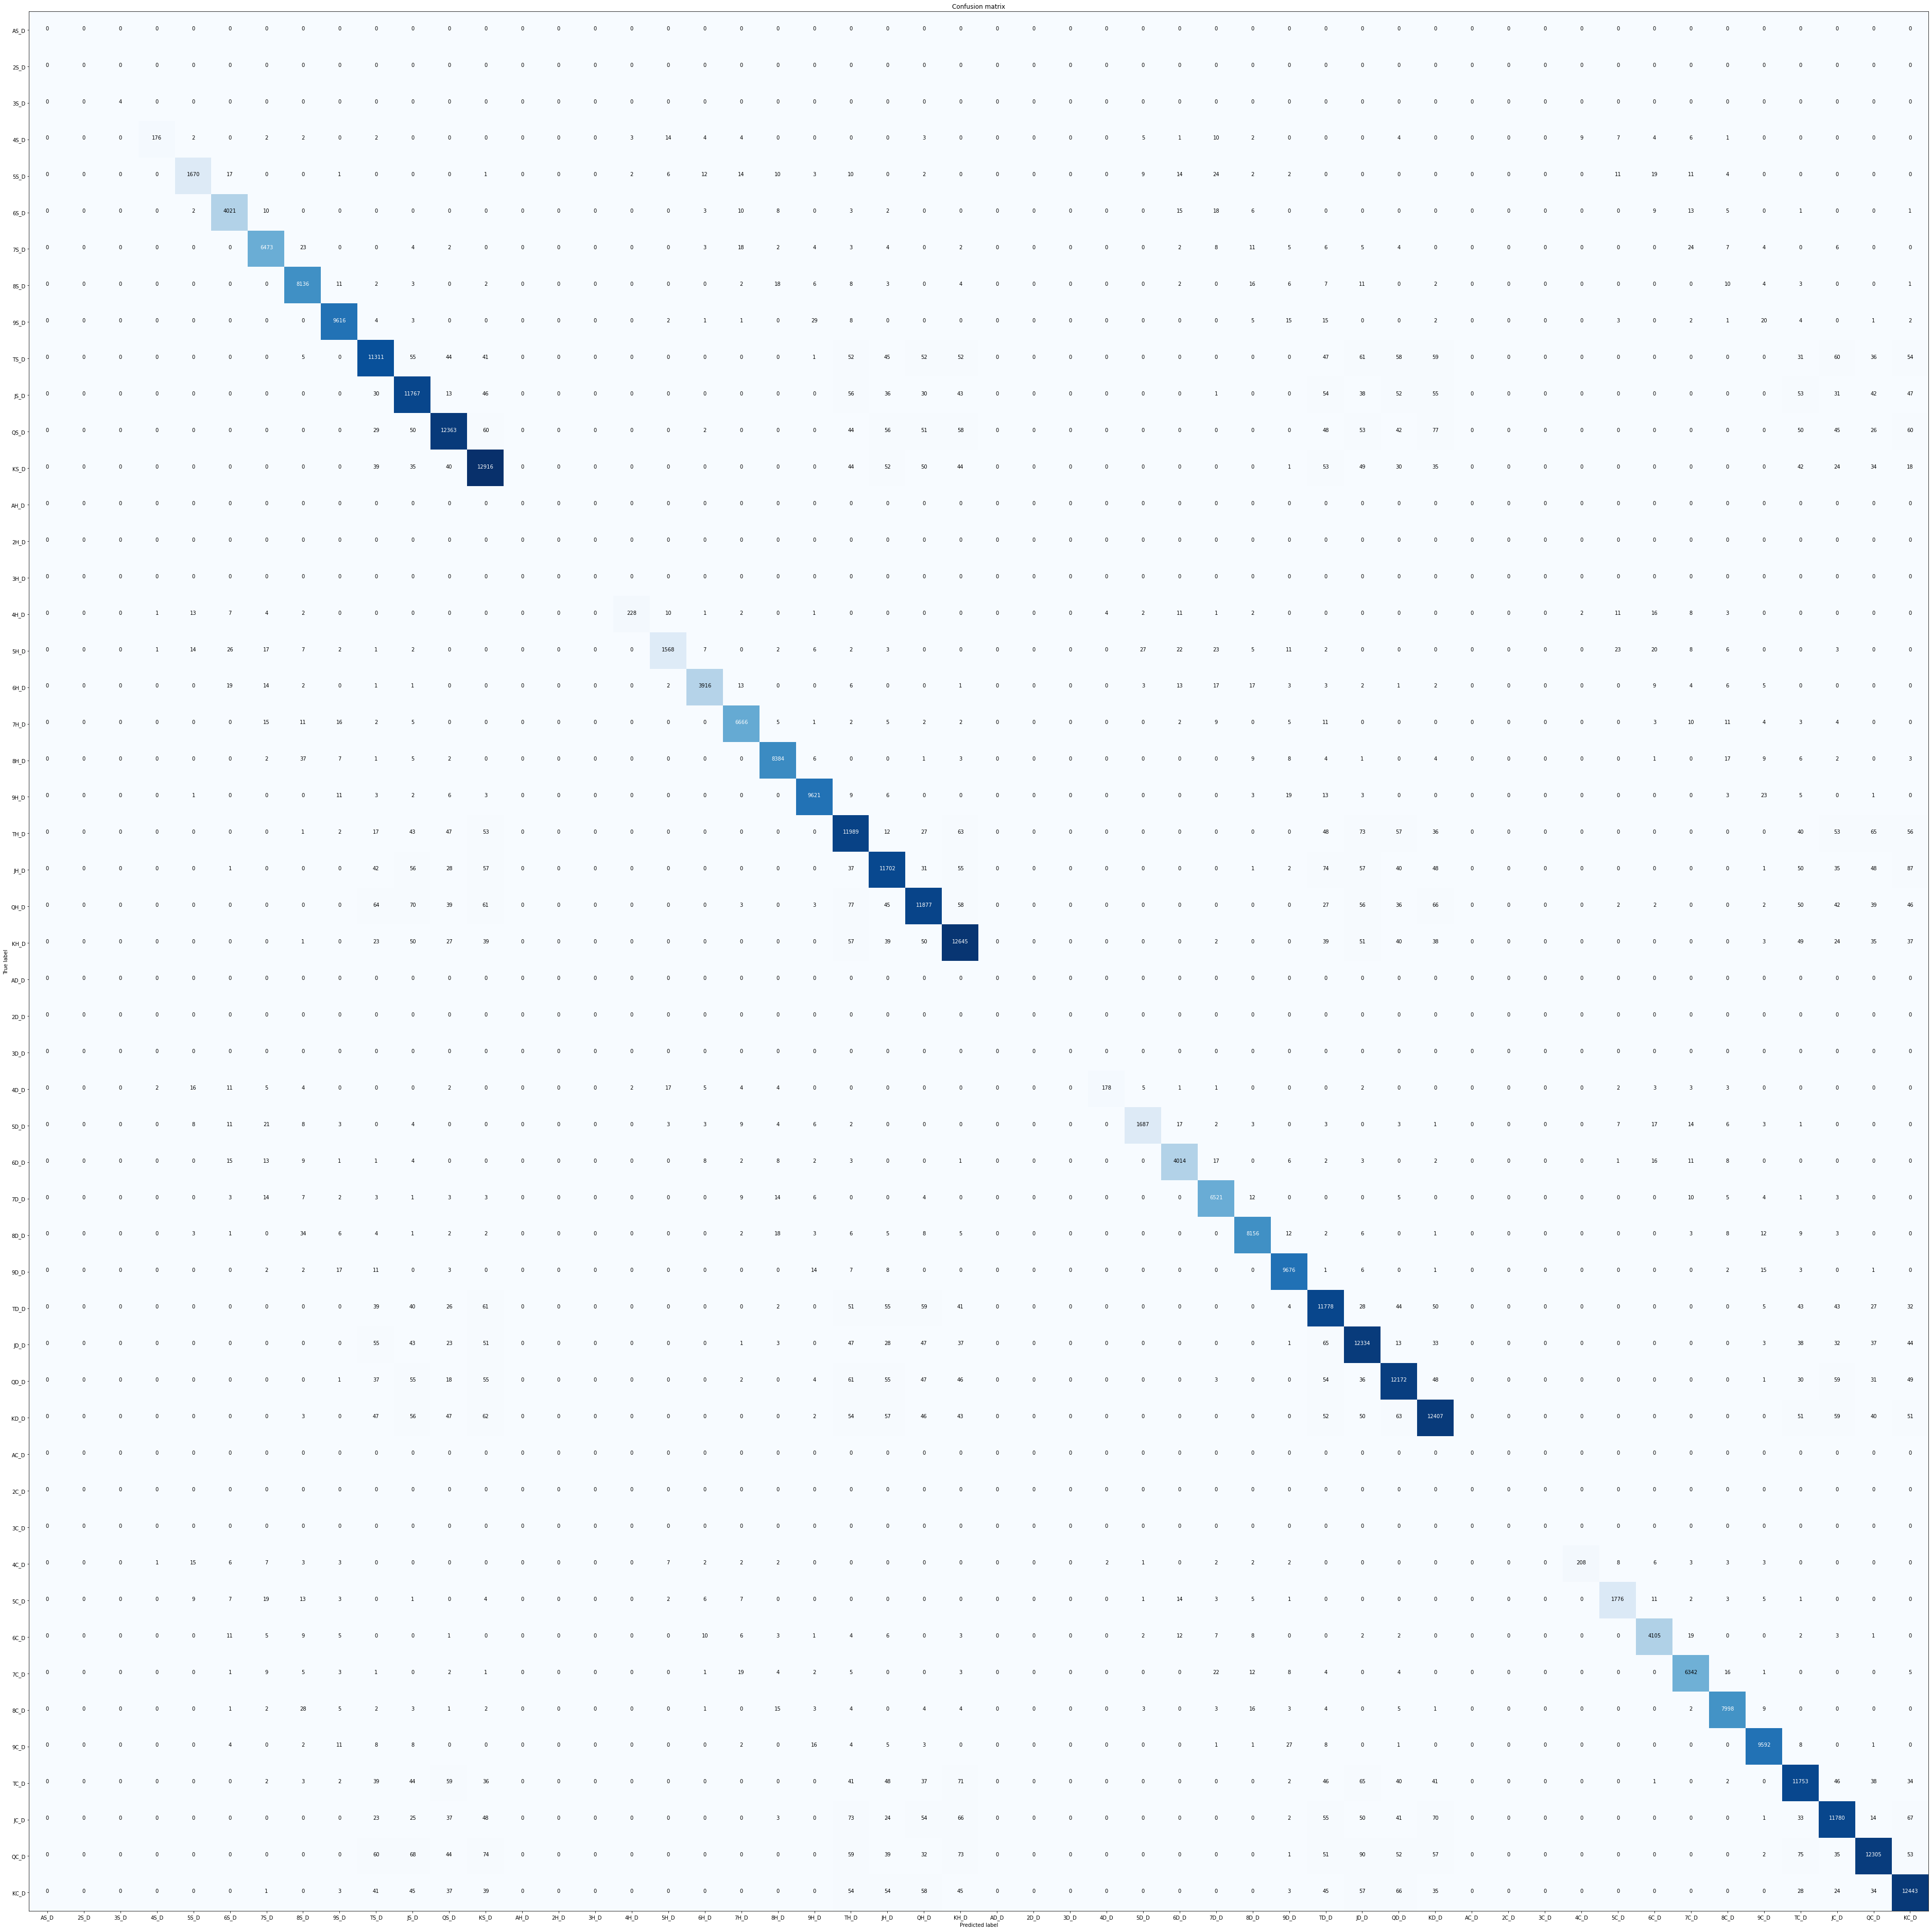

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, train_loader, device, numGames=currGames)

##### Validation Set

Accuracy: 90.23
Normalized confusion matrix


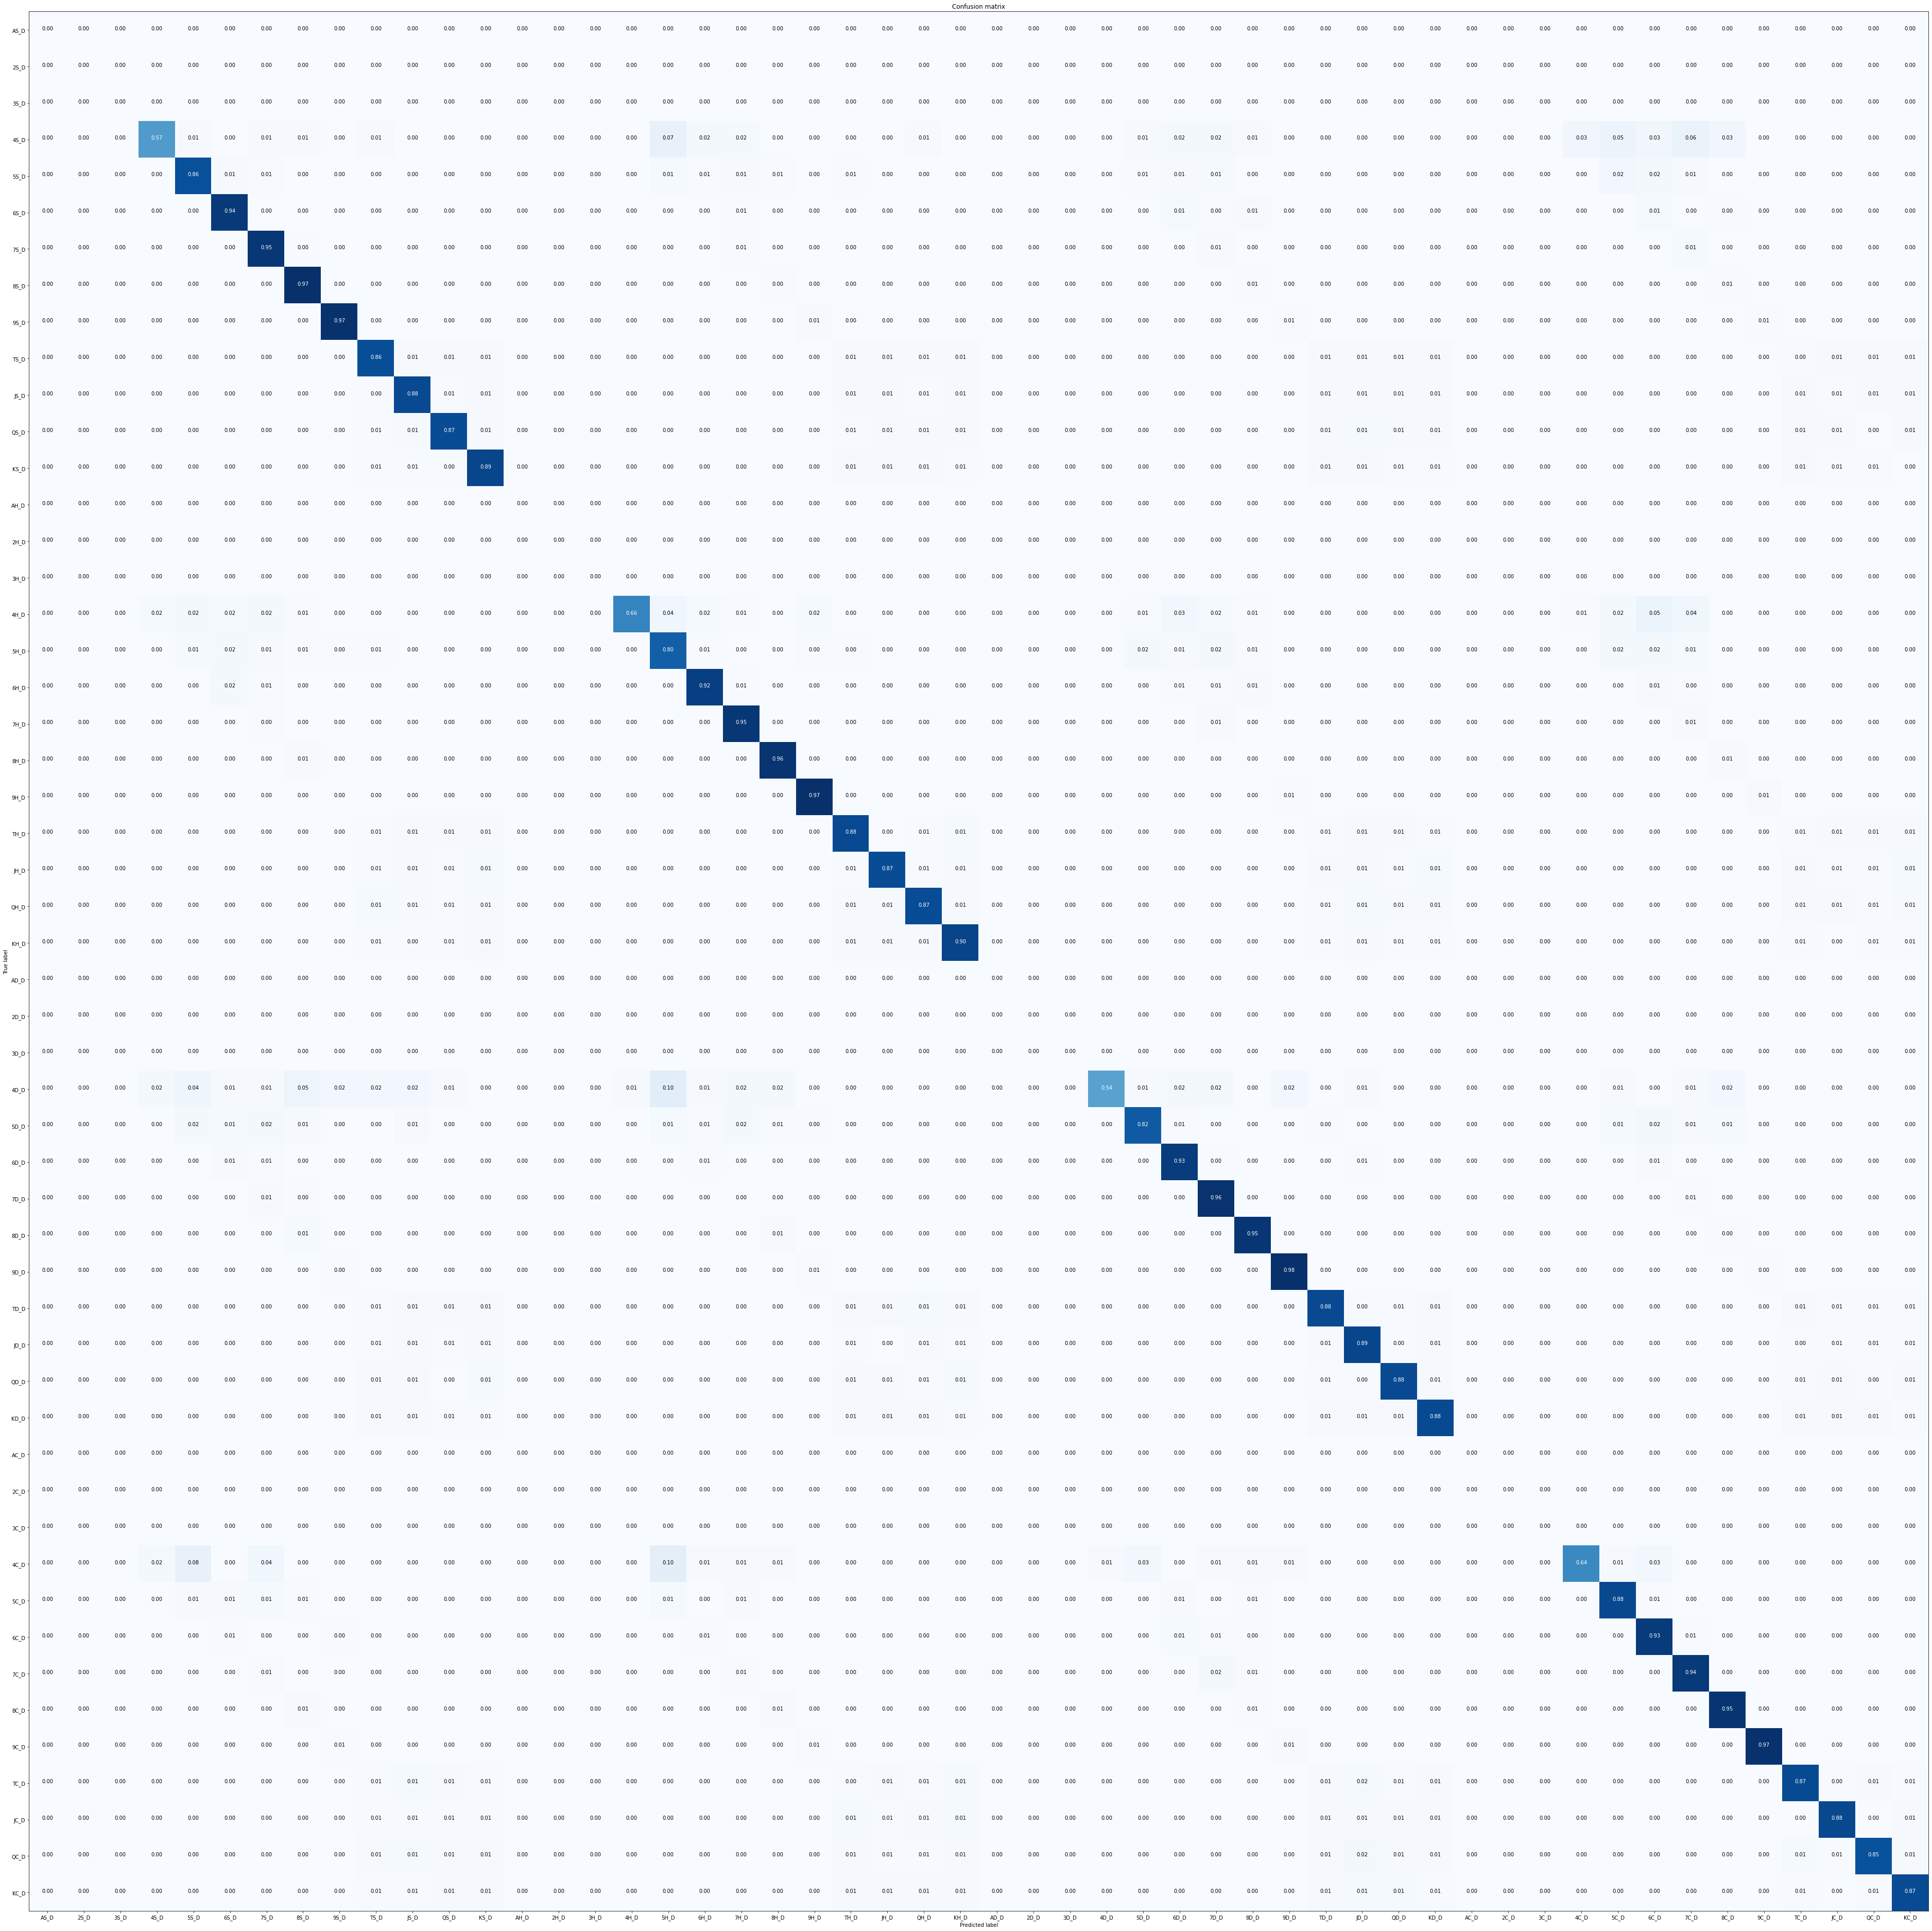

Confusion matrix, without normalization


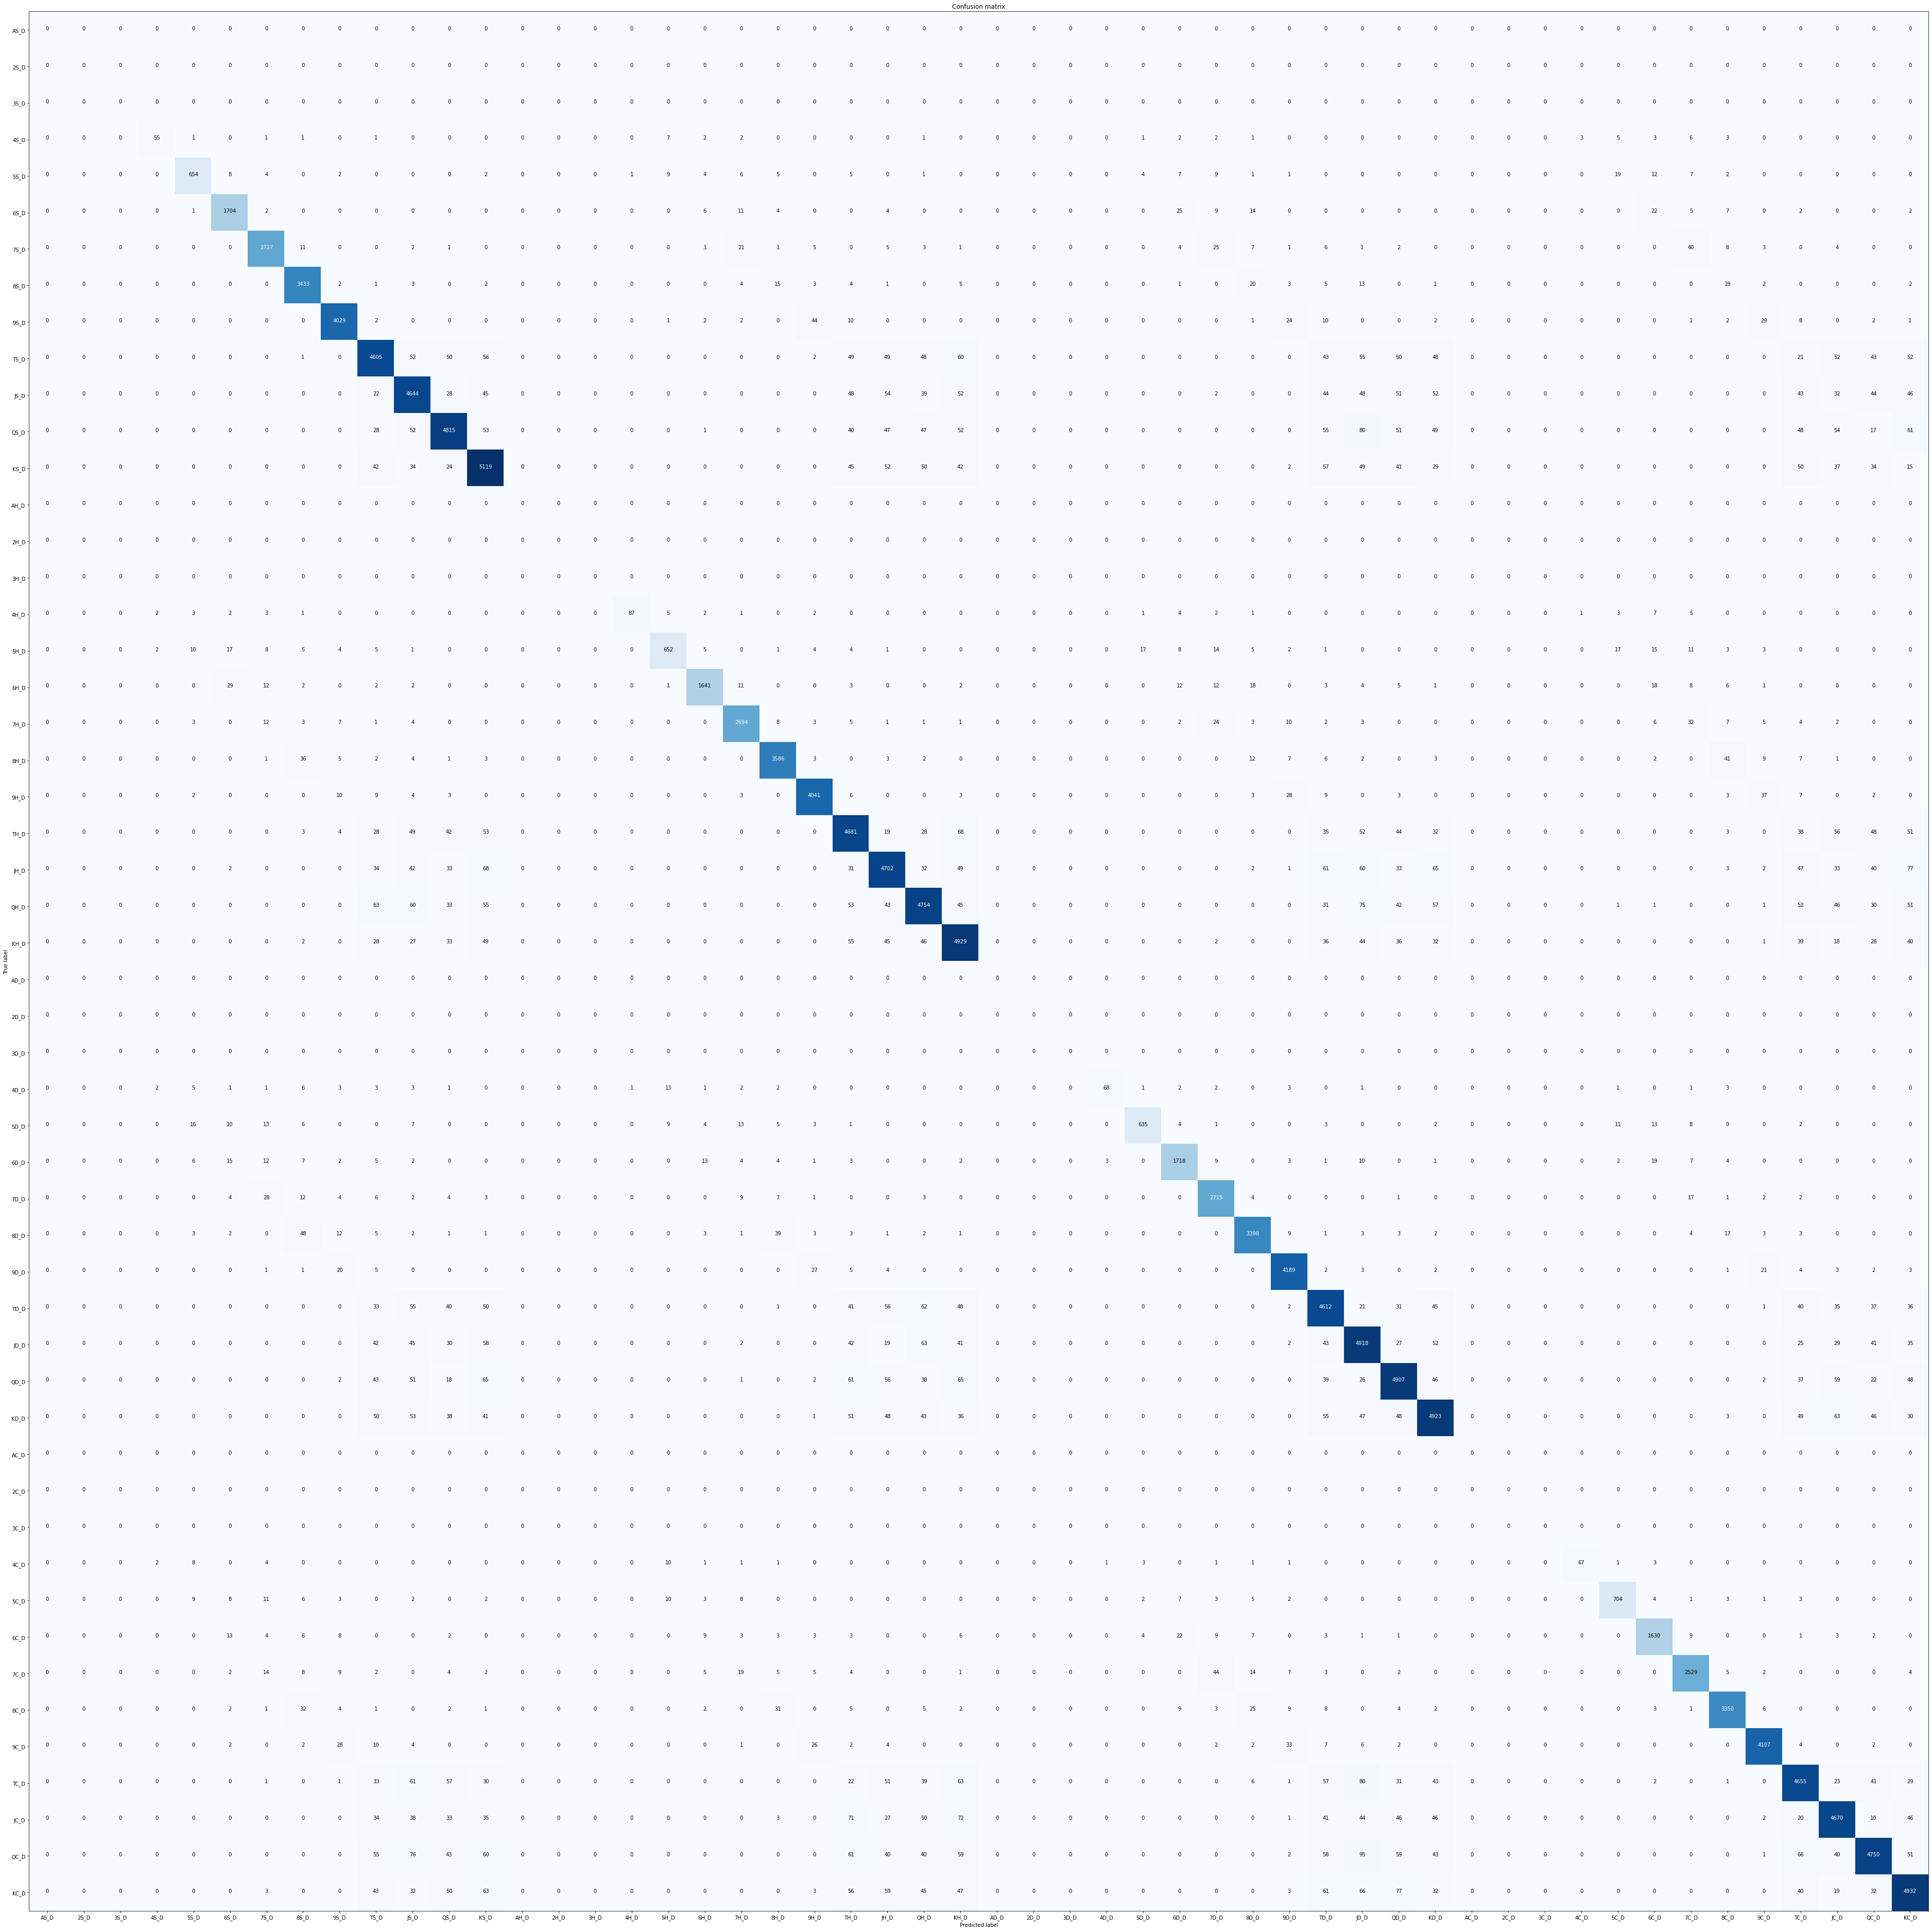

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, val_loader, device, numGames=currGames, mode='val')

##### Test Set (6k)

loading 6000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/apbd/discard
Accuracy: 93.91
Normalized confusion matrix


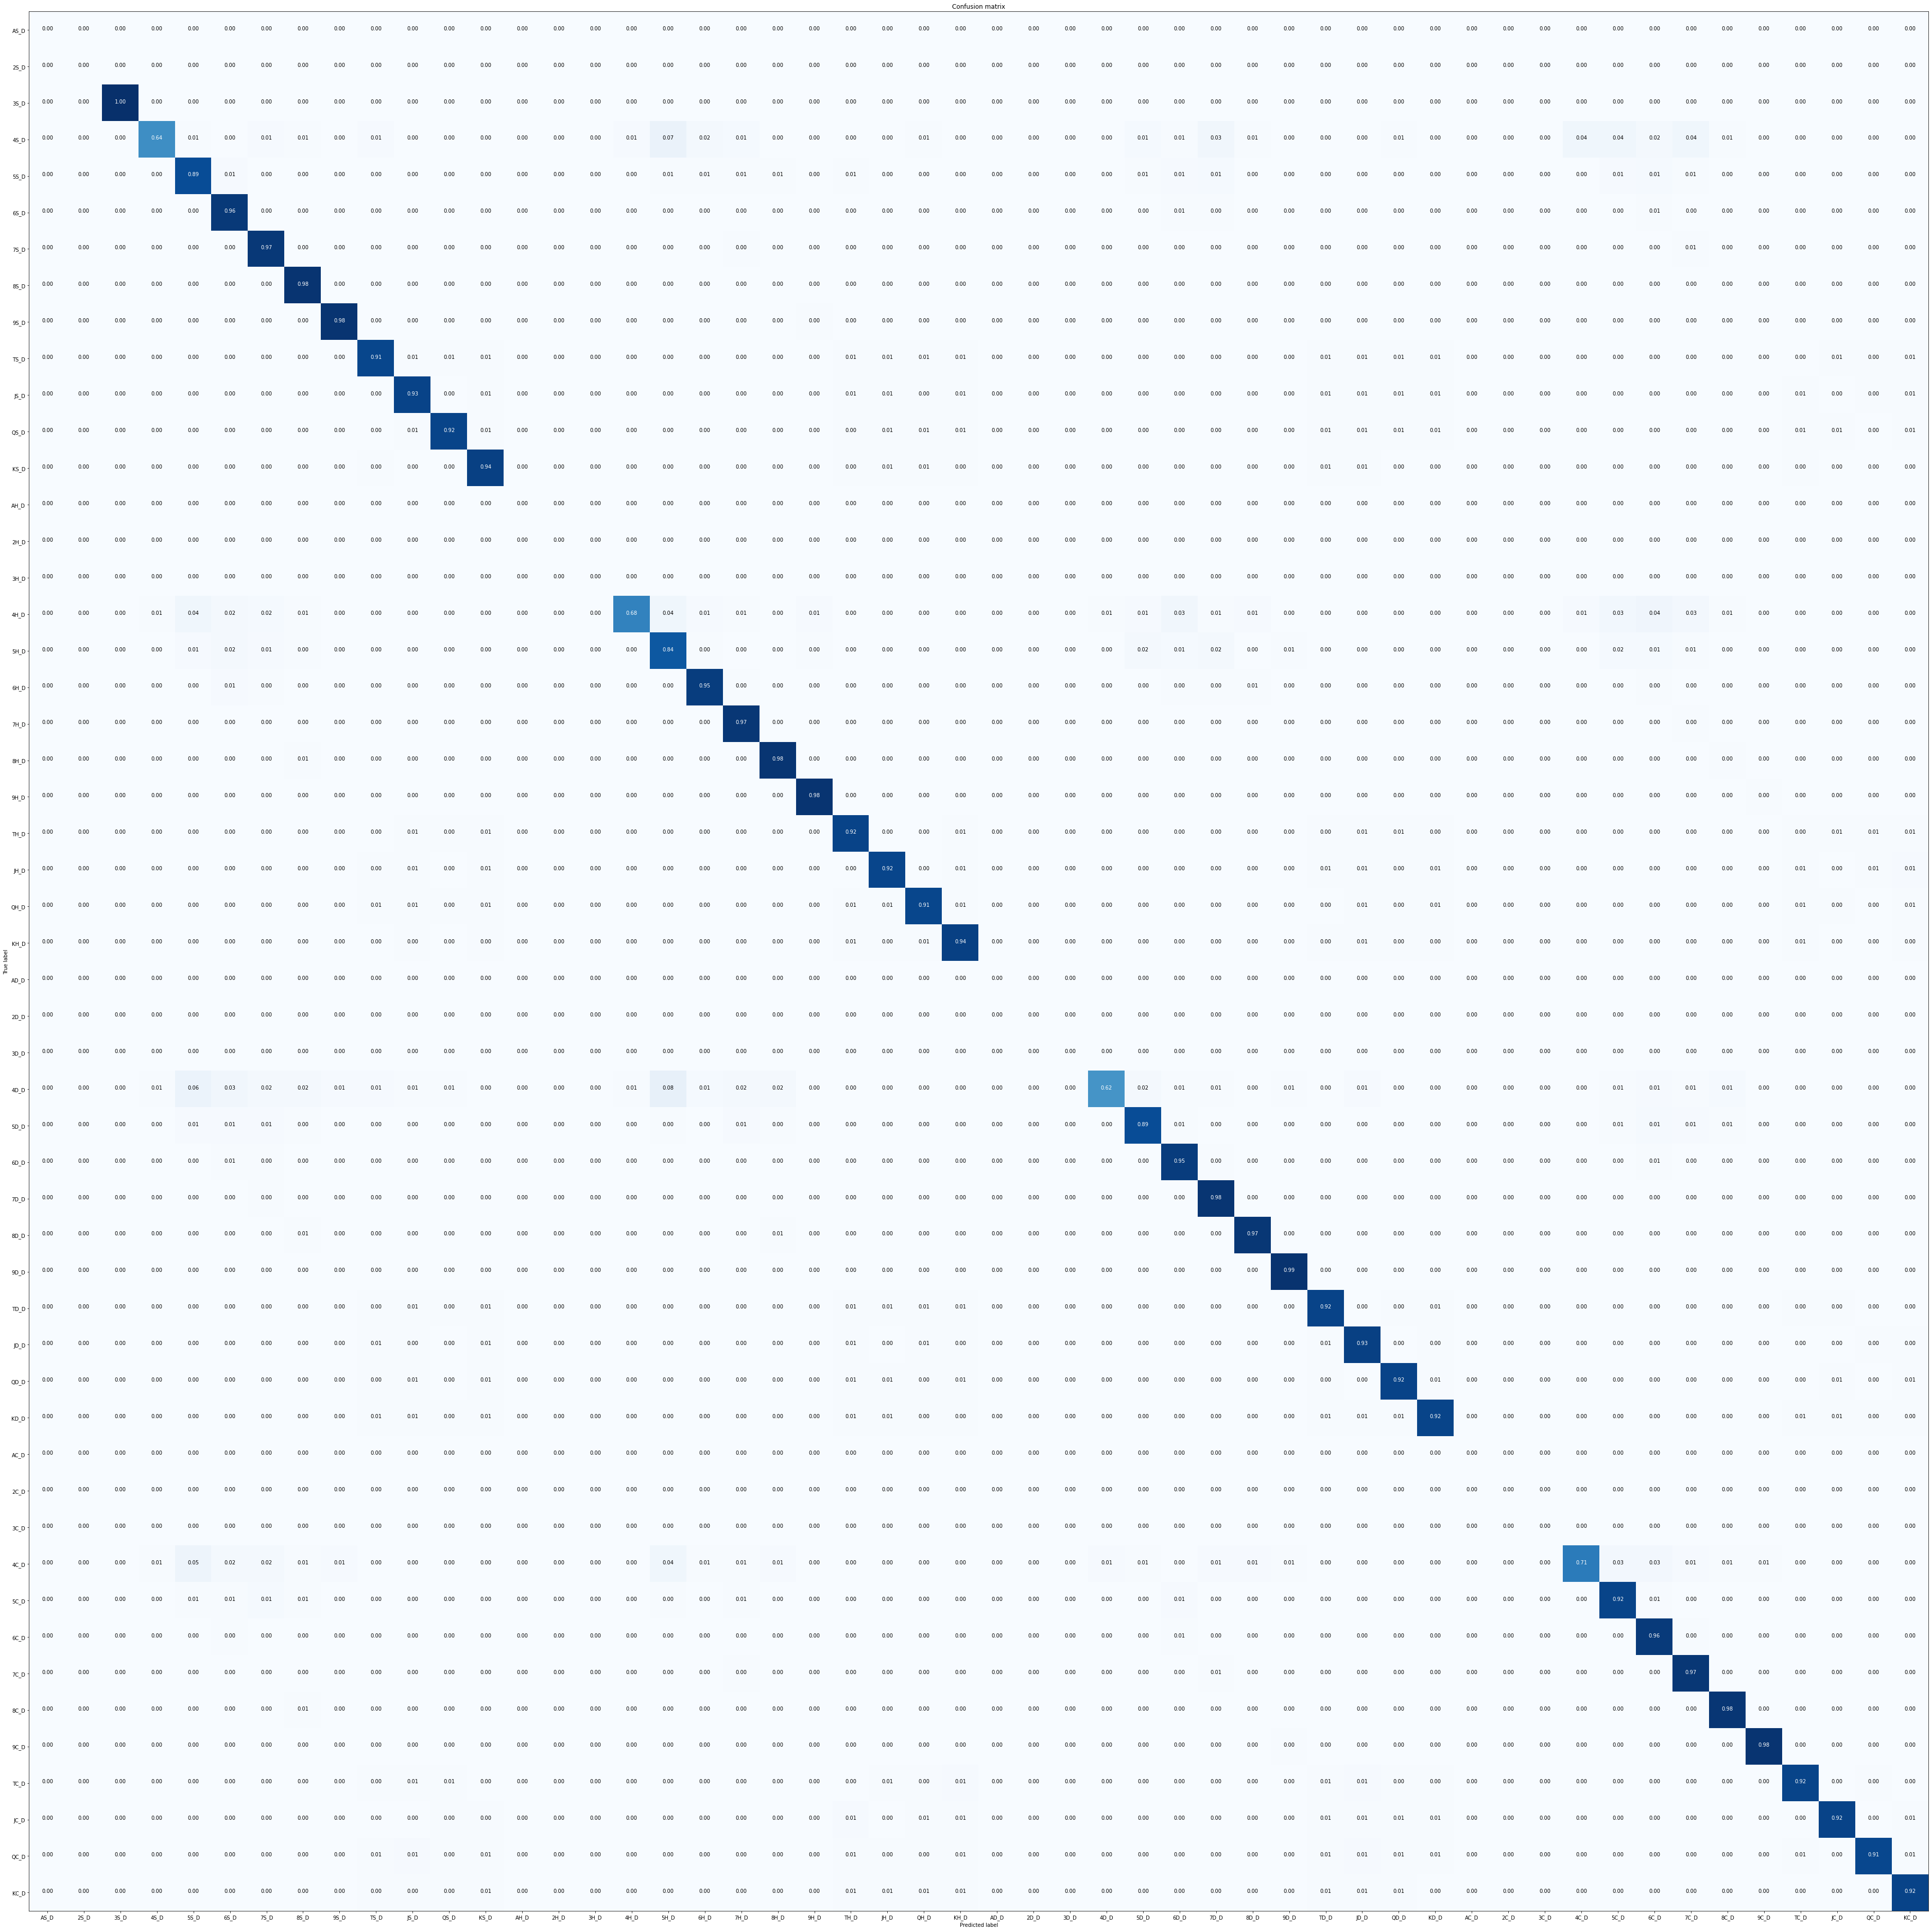

Confusion matrix, without normalization


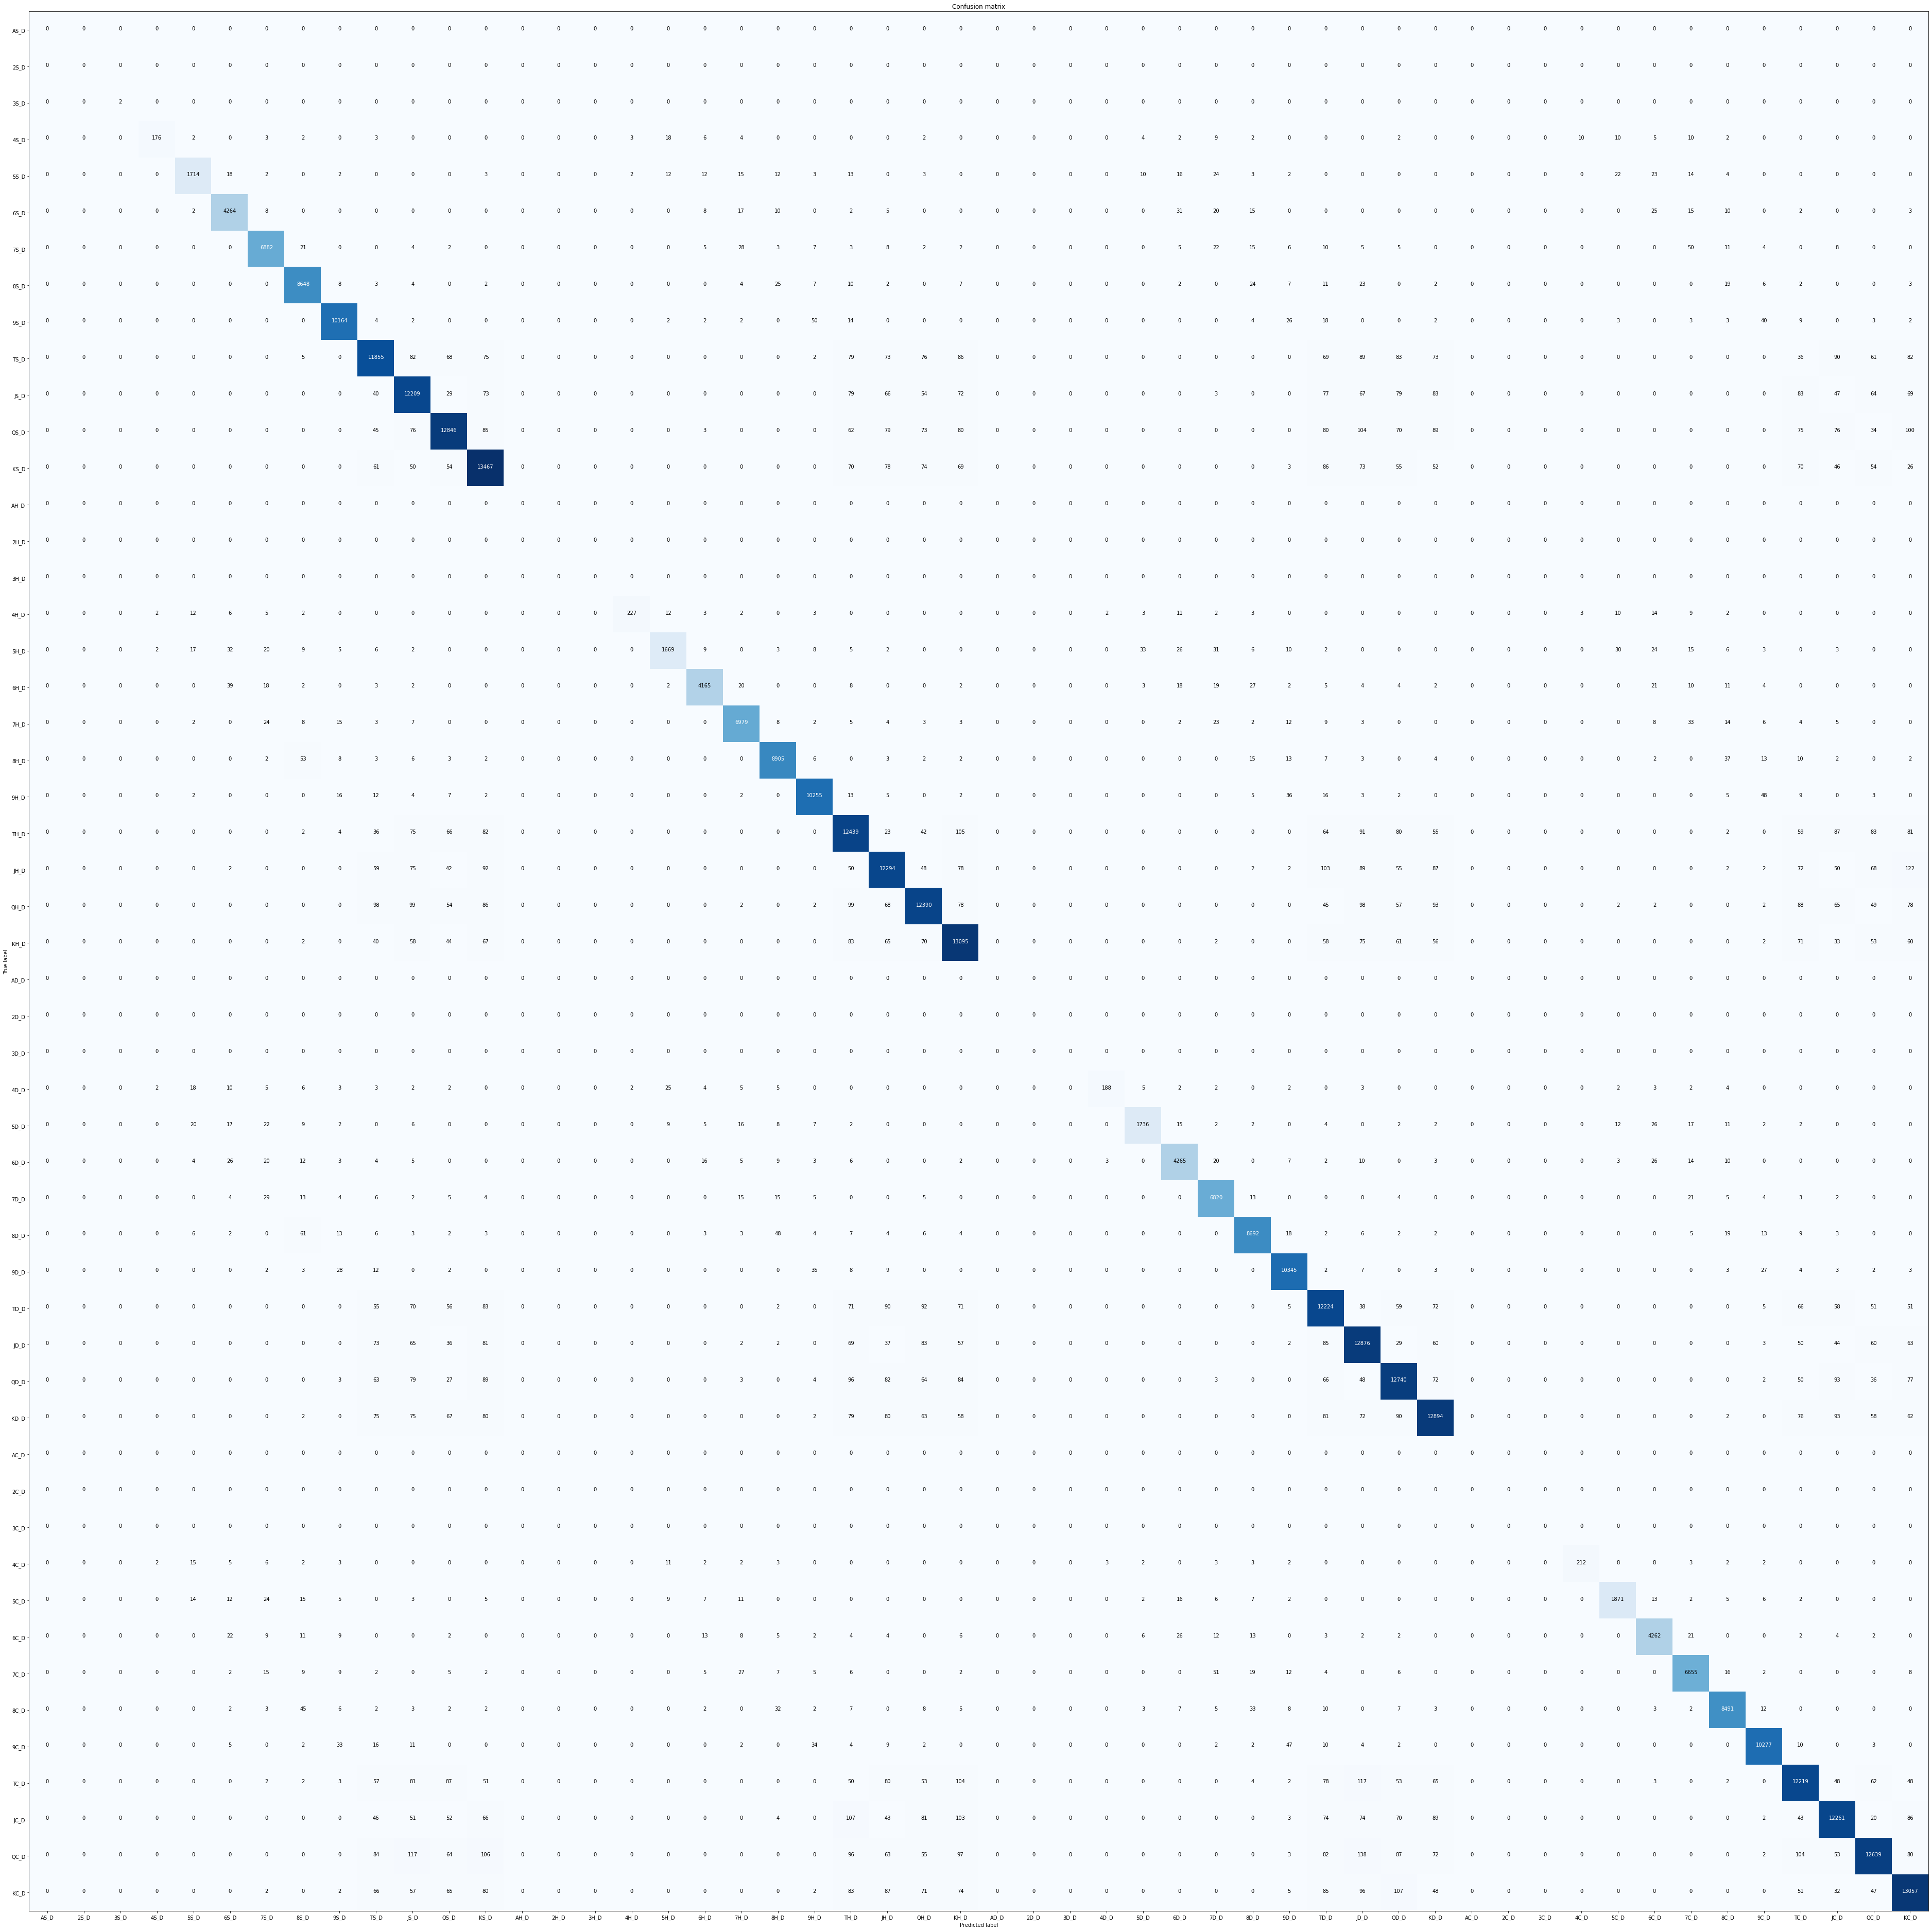

In [ ]:
currGames = 6000
test_loader_6k, classes = load_test_data(data_pth, currGames, 
                                         pruneStatesList, actionChoice)
plot_cm(plot_pth, classes, model, test_loader_6k, device, numGames=currGames)

##### Test Set (2k)

Test on all three models generated:

In [ ]:
currGames = 2000
test_loader_2k, classes = load_test_data(data_pth, currGames, 
                                         pruneStatesList, actionChoice)

loading 2000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/apbd/discard


###### all epoch

Accuracy: 94.09
Normalized confusion matrix


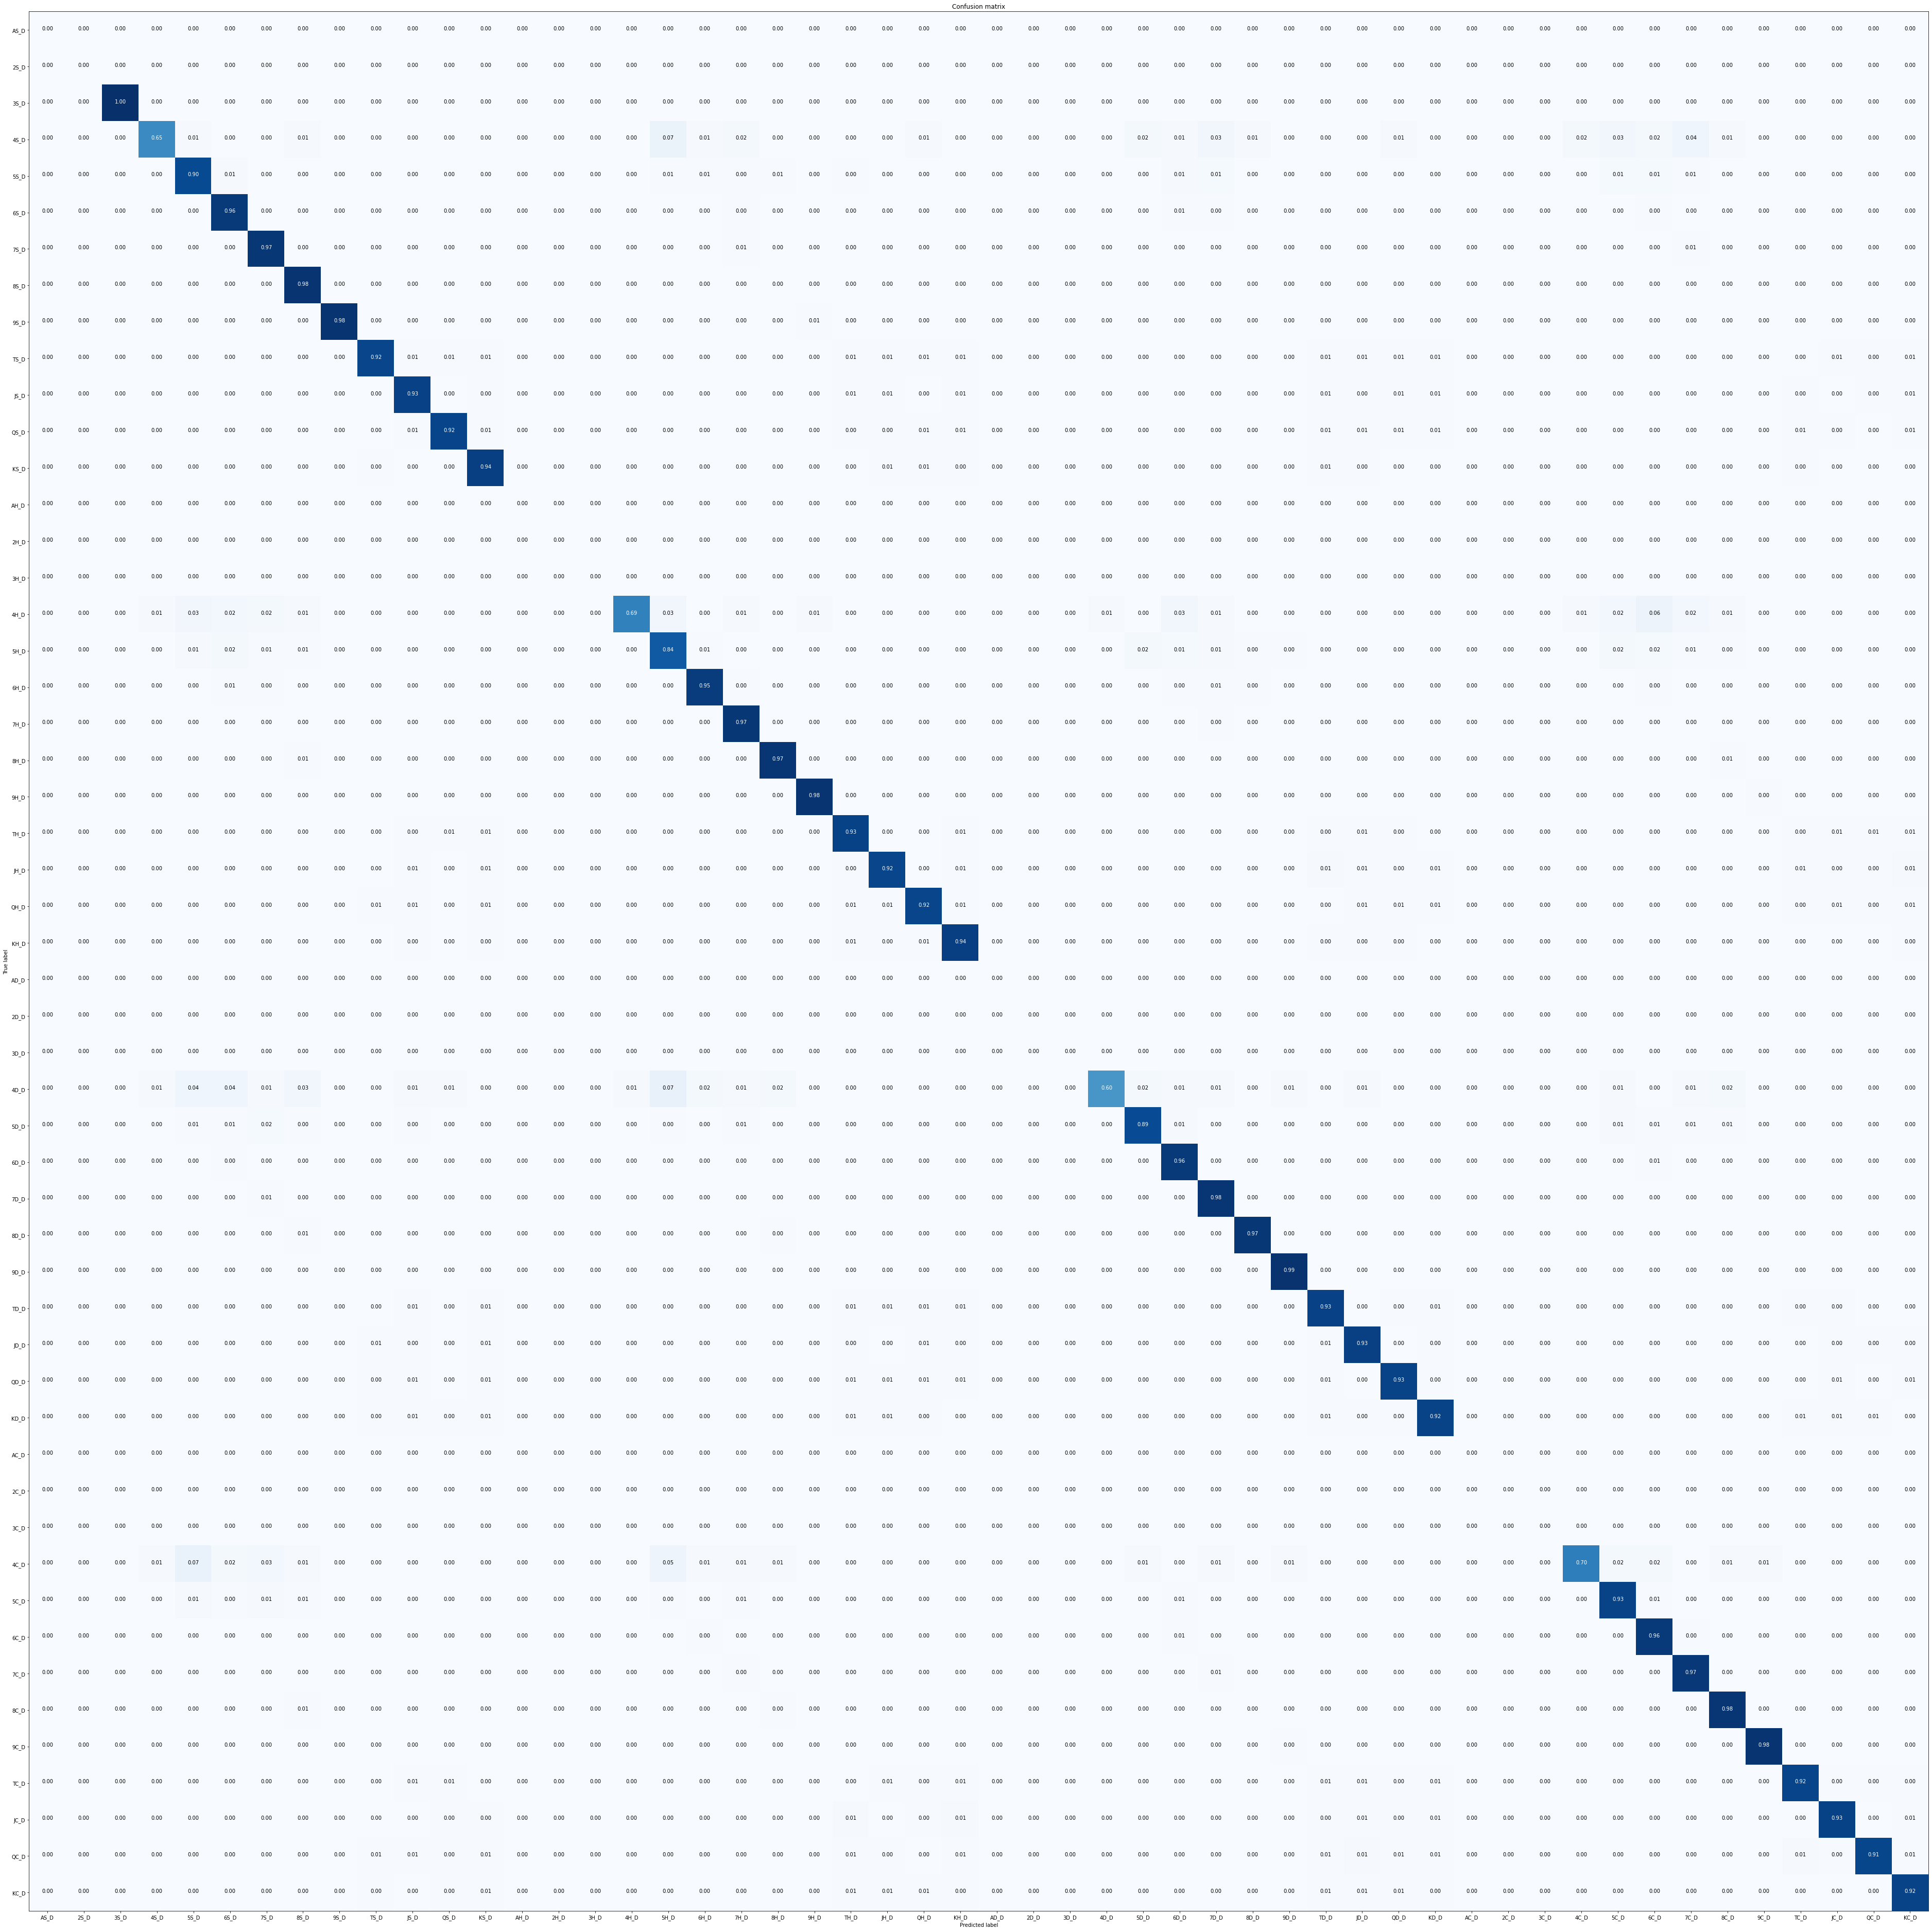

Confusion matrix, without normalization


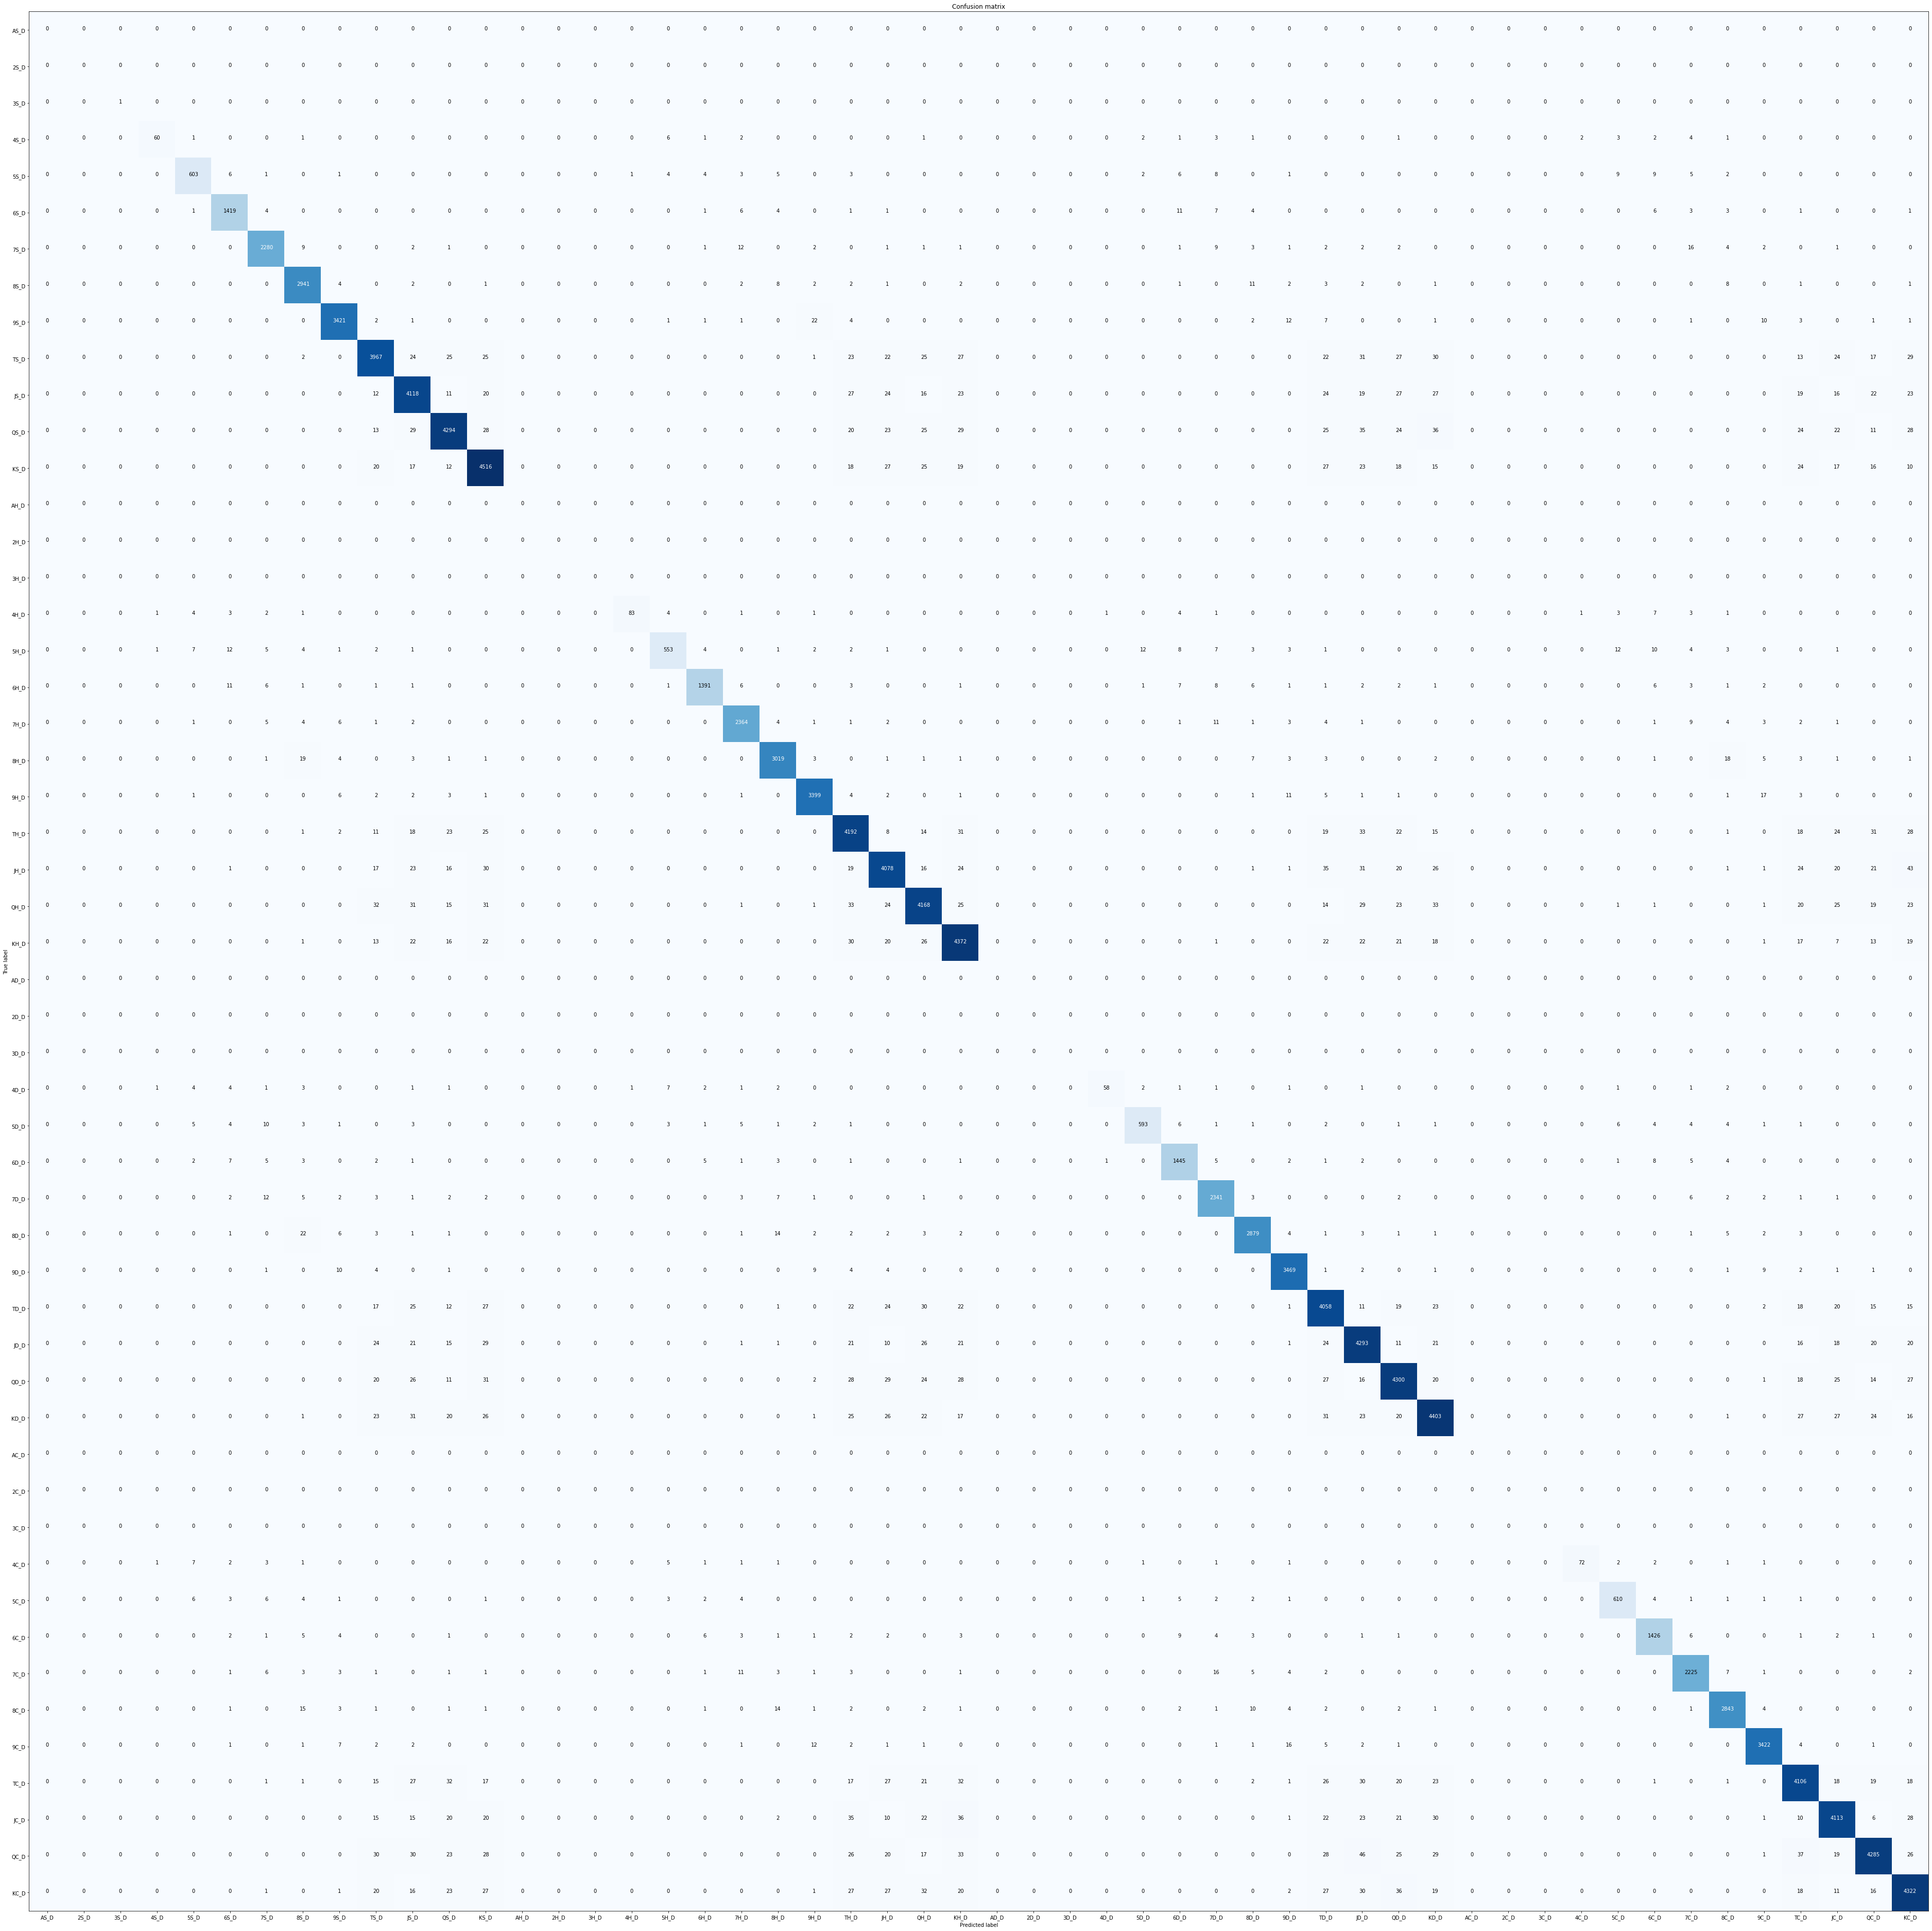

In [ ]:
plot_cm(plot_pth, classes, model, test_loader_2k, device, numGames=currGames)

###### max validation accuracy

Accuracy: 94.09
Normalized confusion matrix


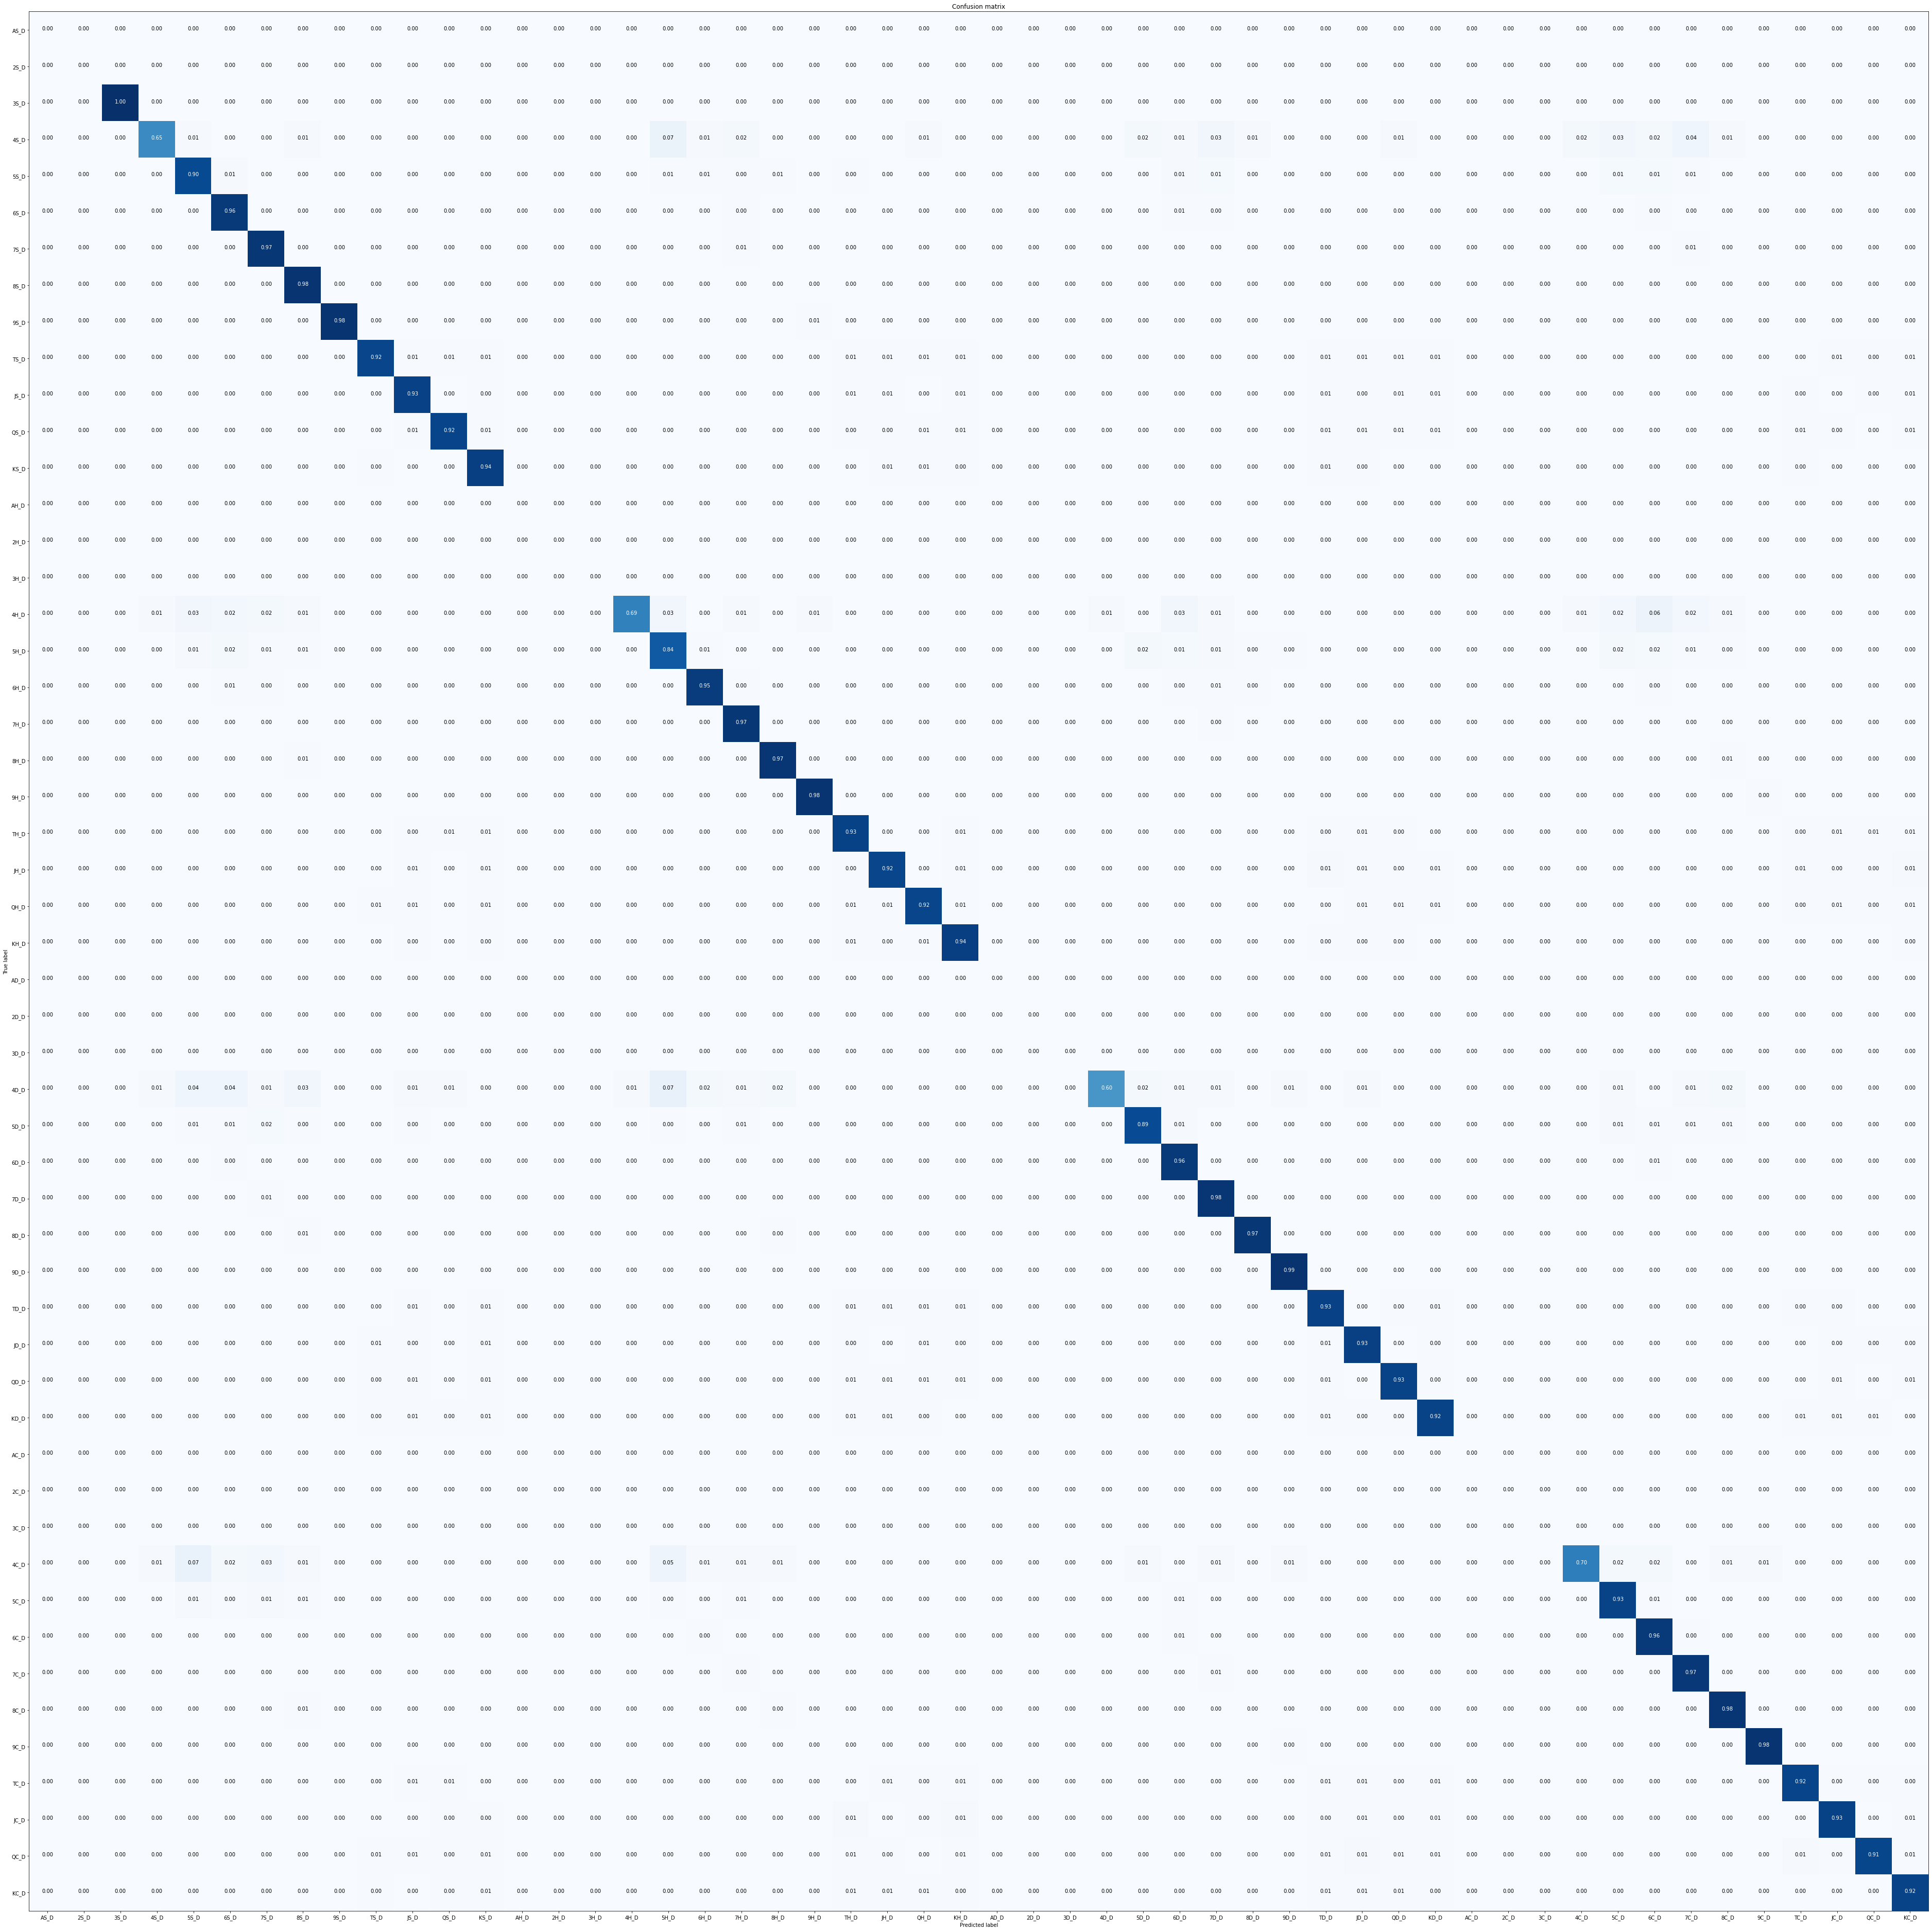

Confusion matrix, without normalization


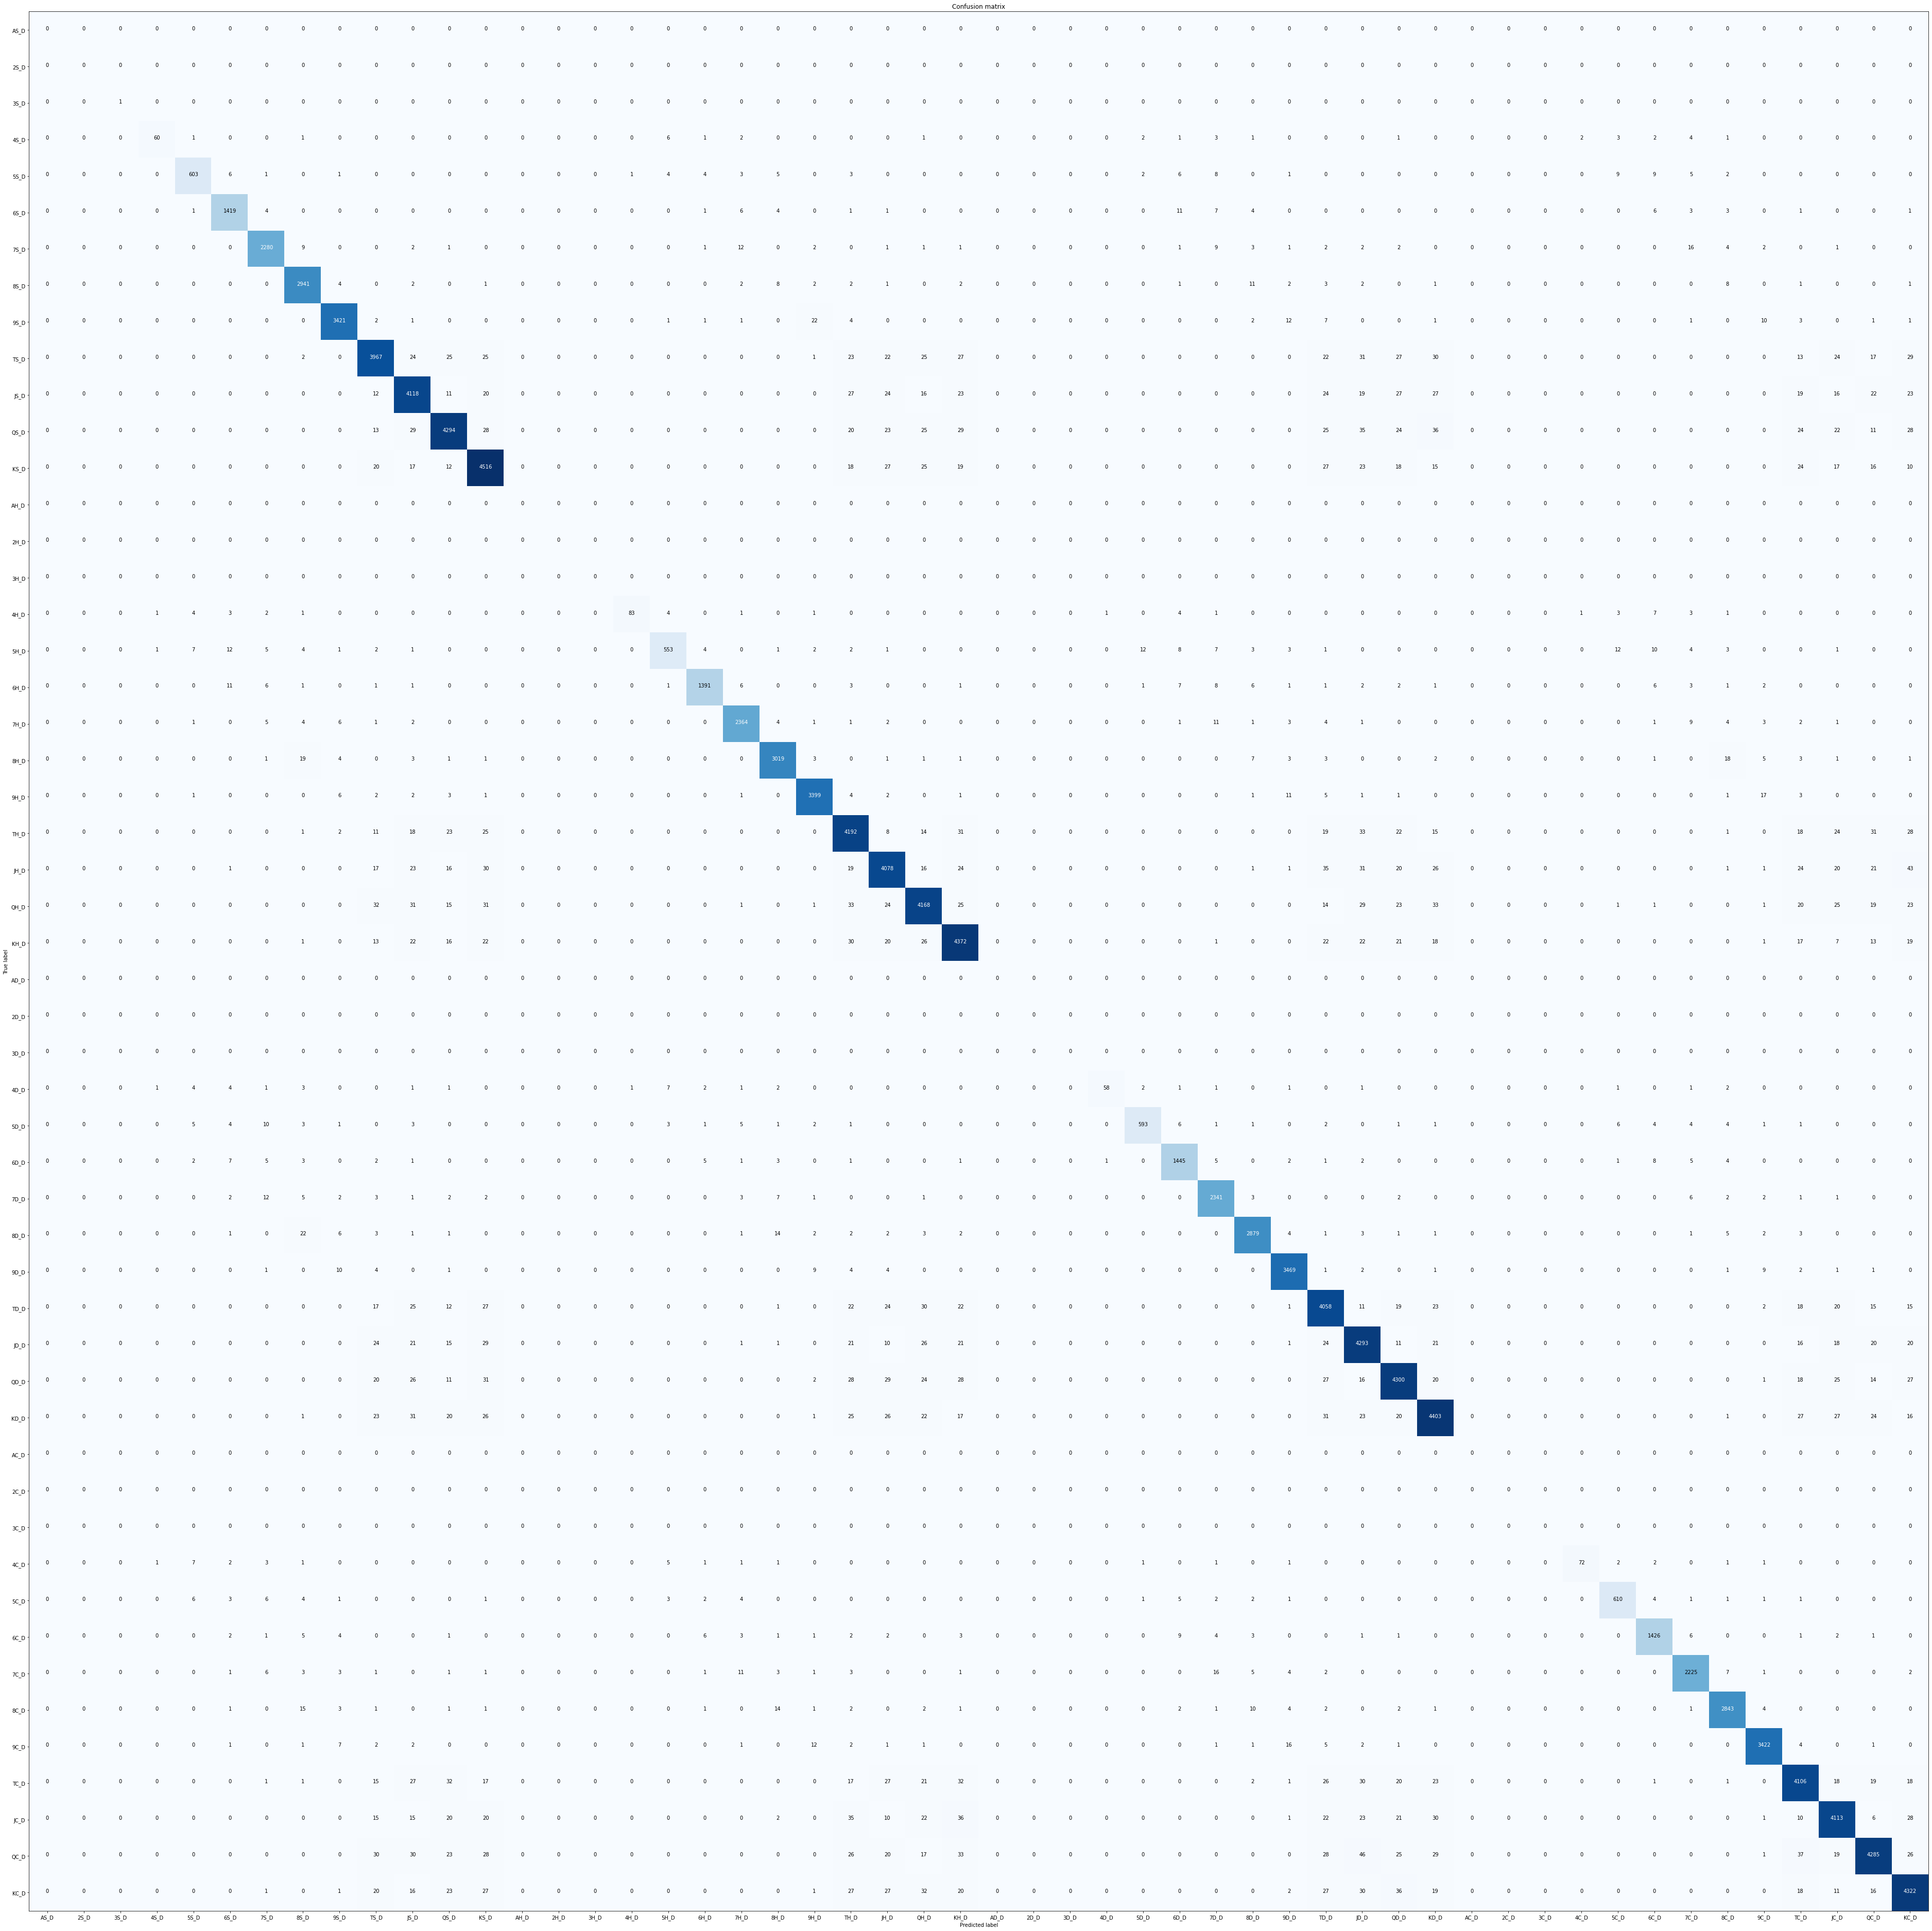

In [ ]:
plot_cm(plot_pth, classes, model_acc, test_loader_2k, device, numGames=currGames, mode='acc')

###### min validation loss

Accuracy: 94.09
Normalized confusion matrix


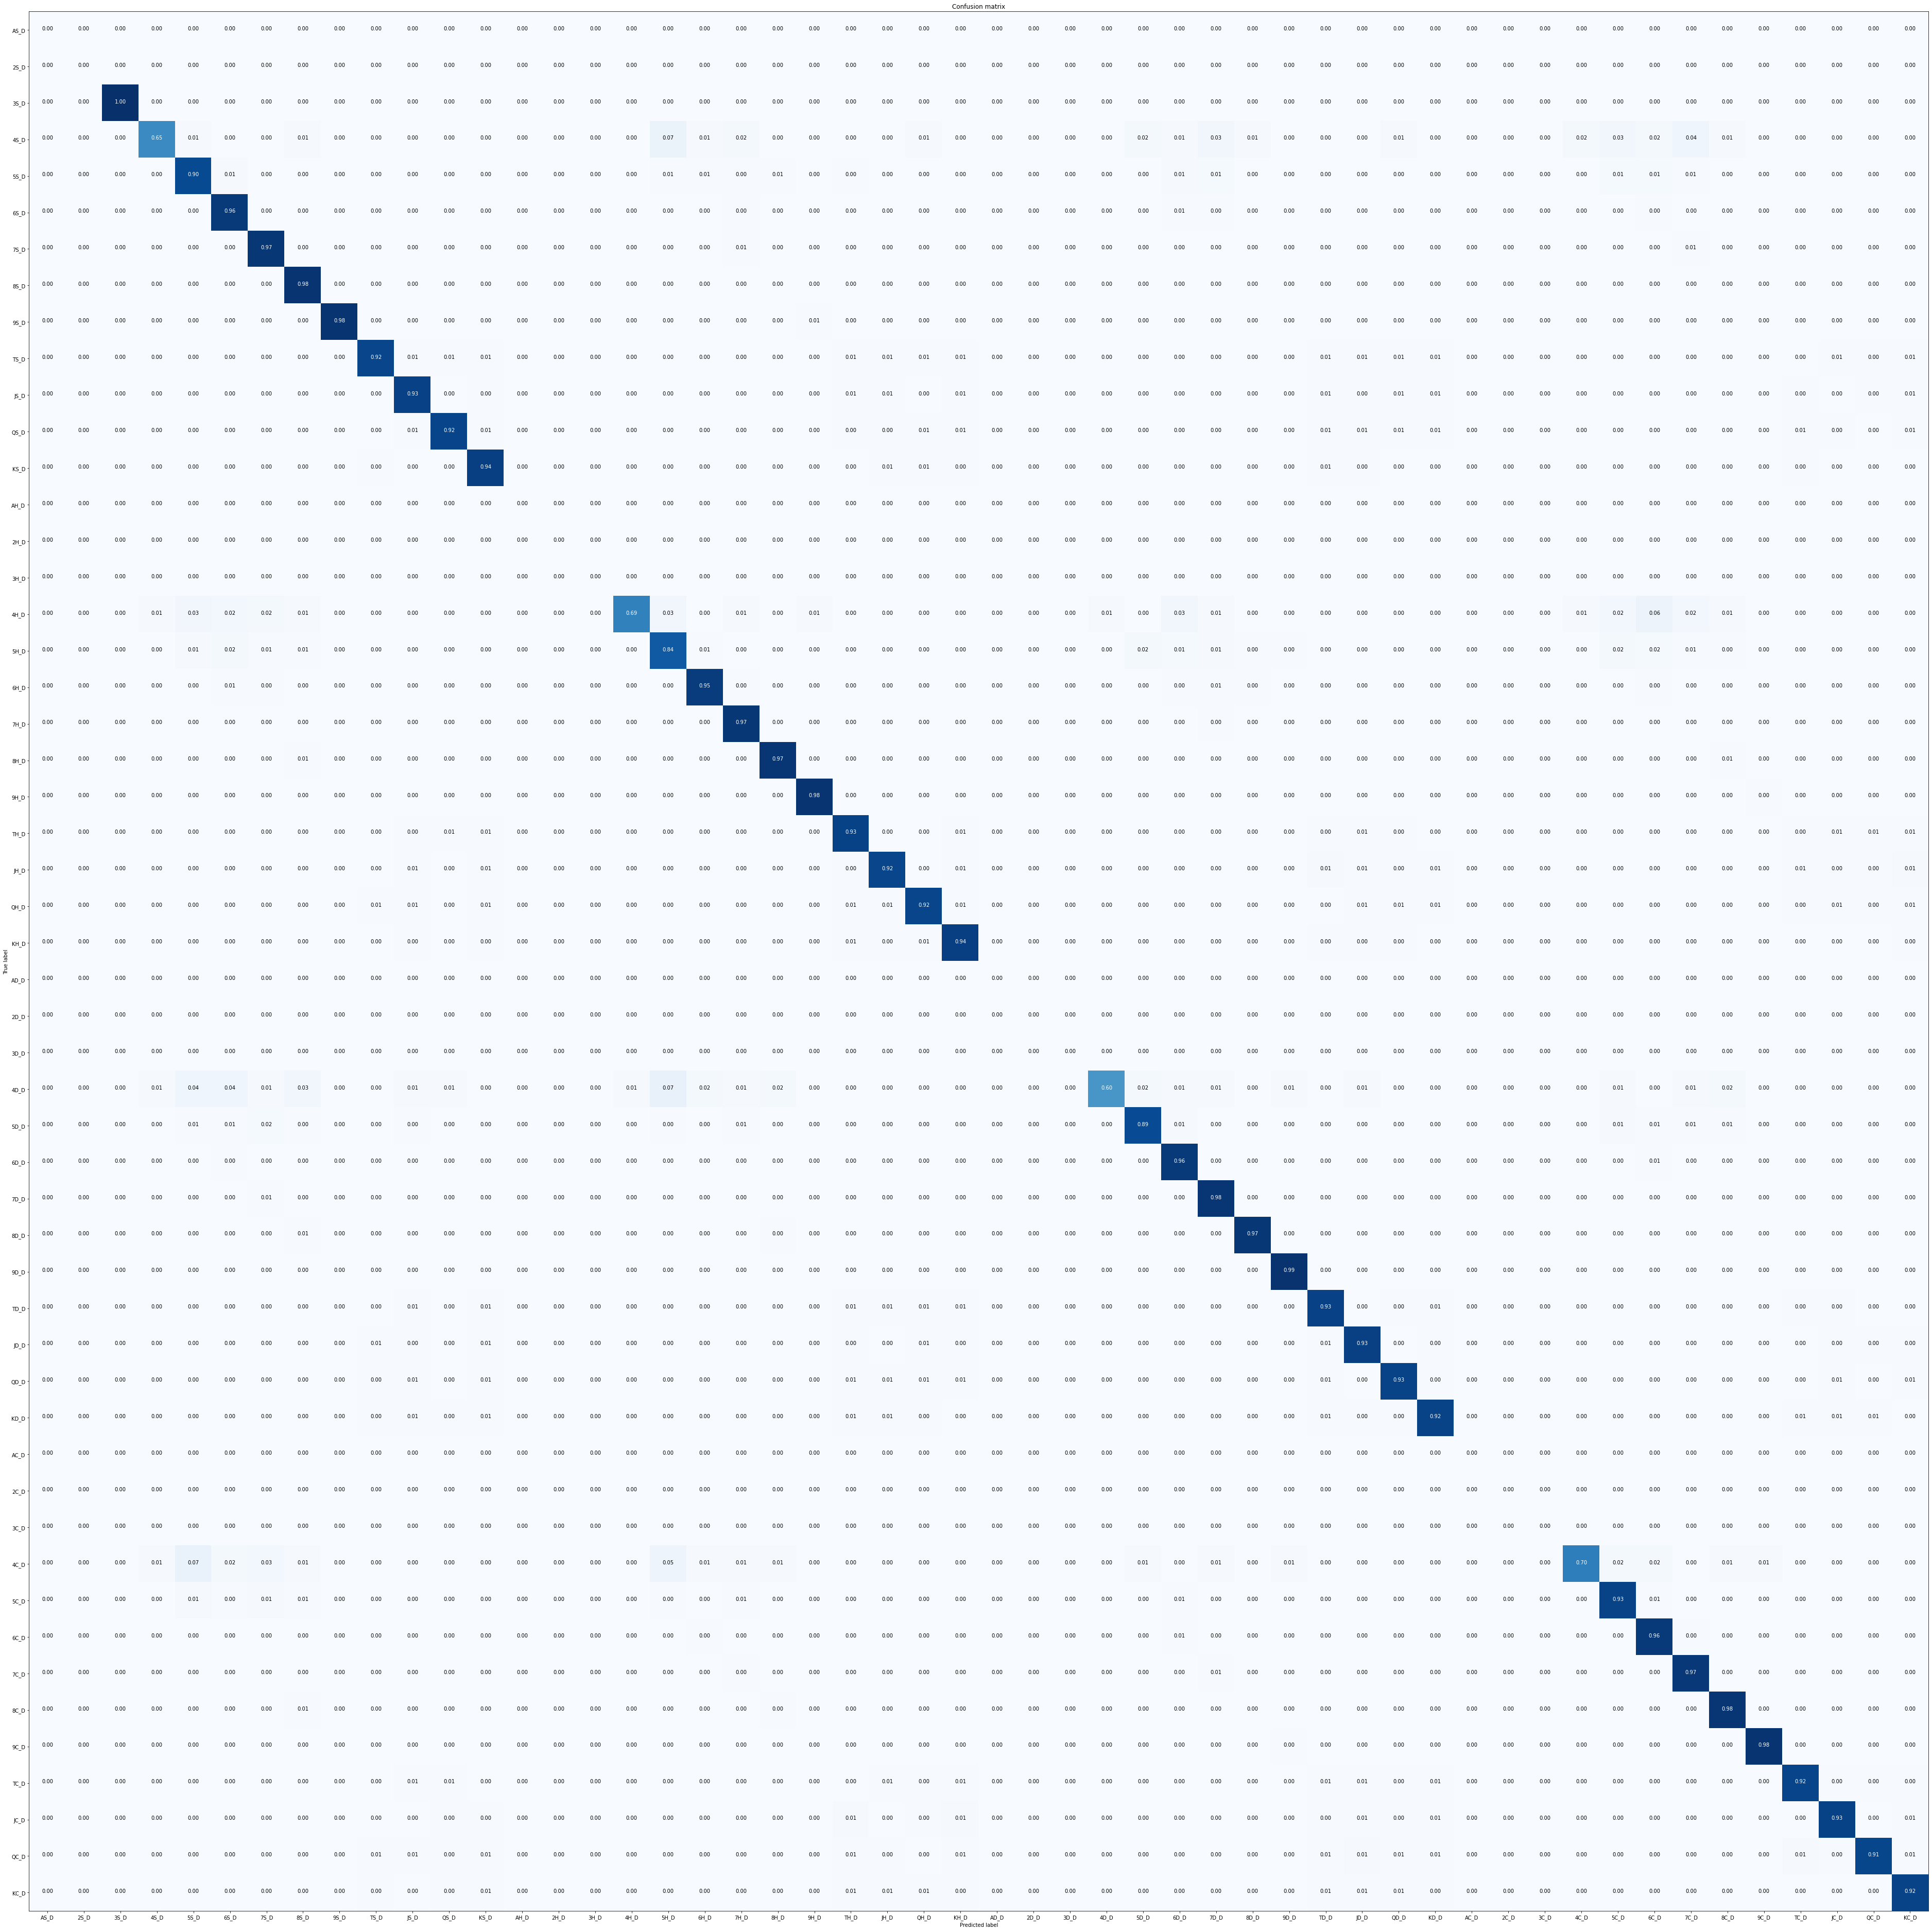

Confusion matrix, without normalization


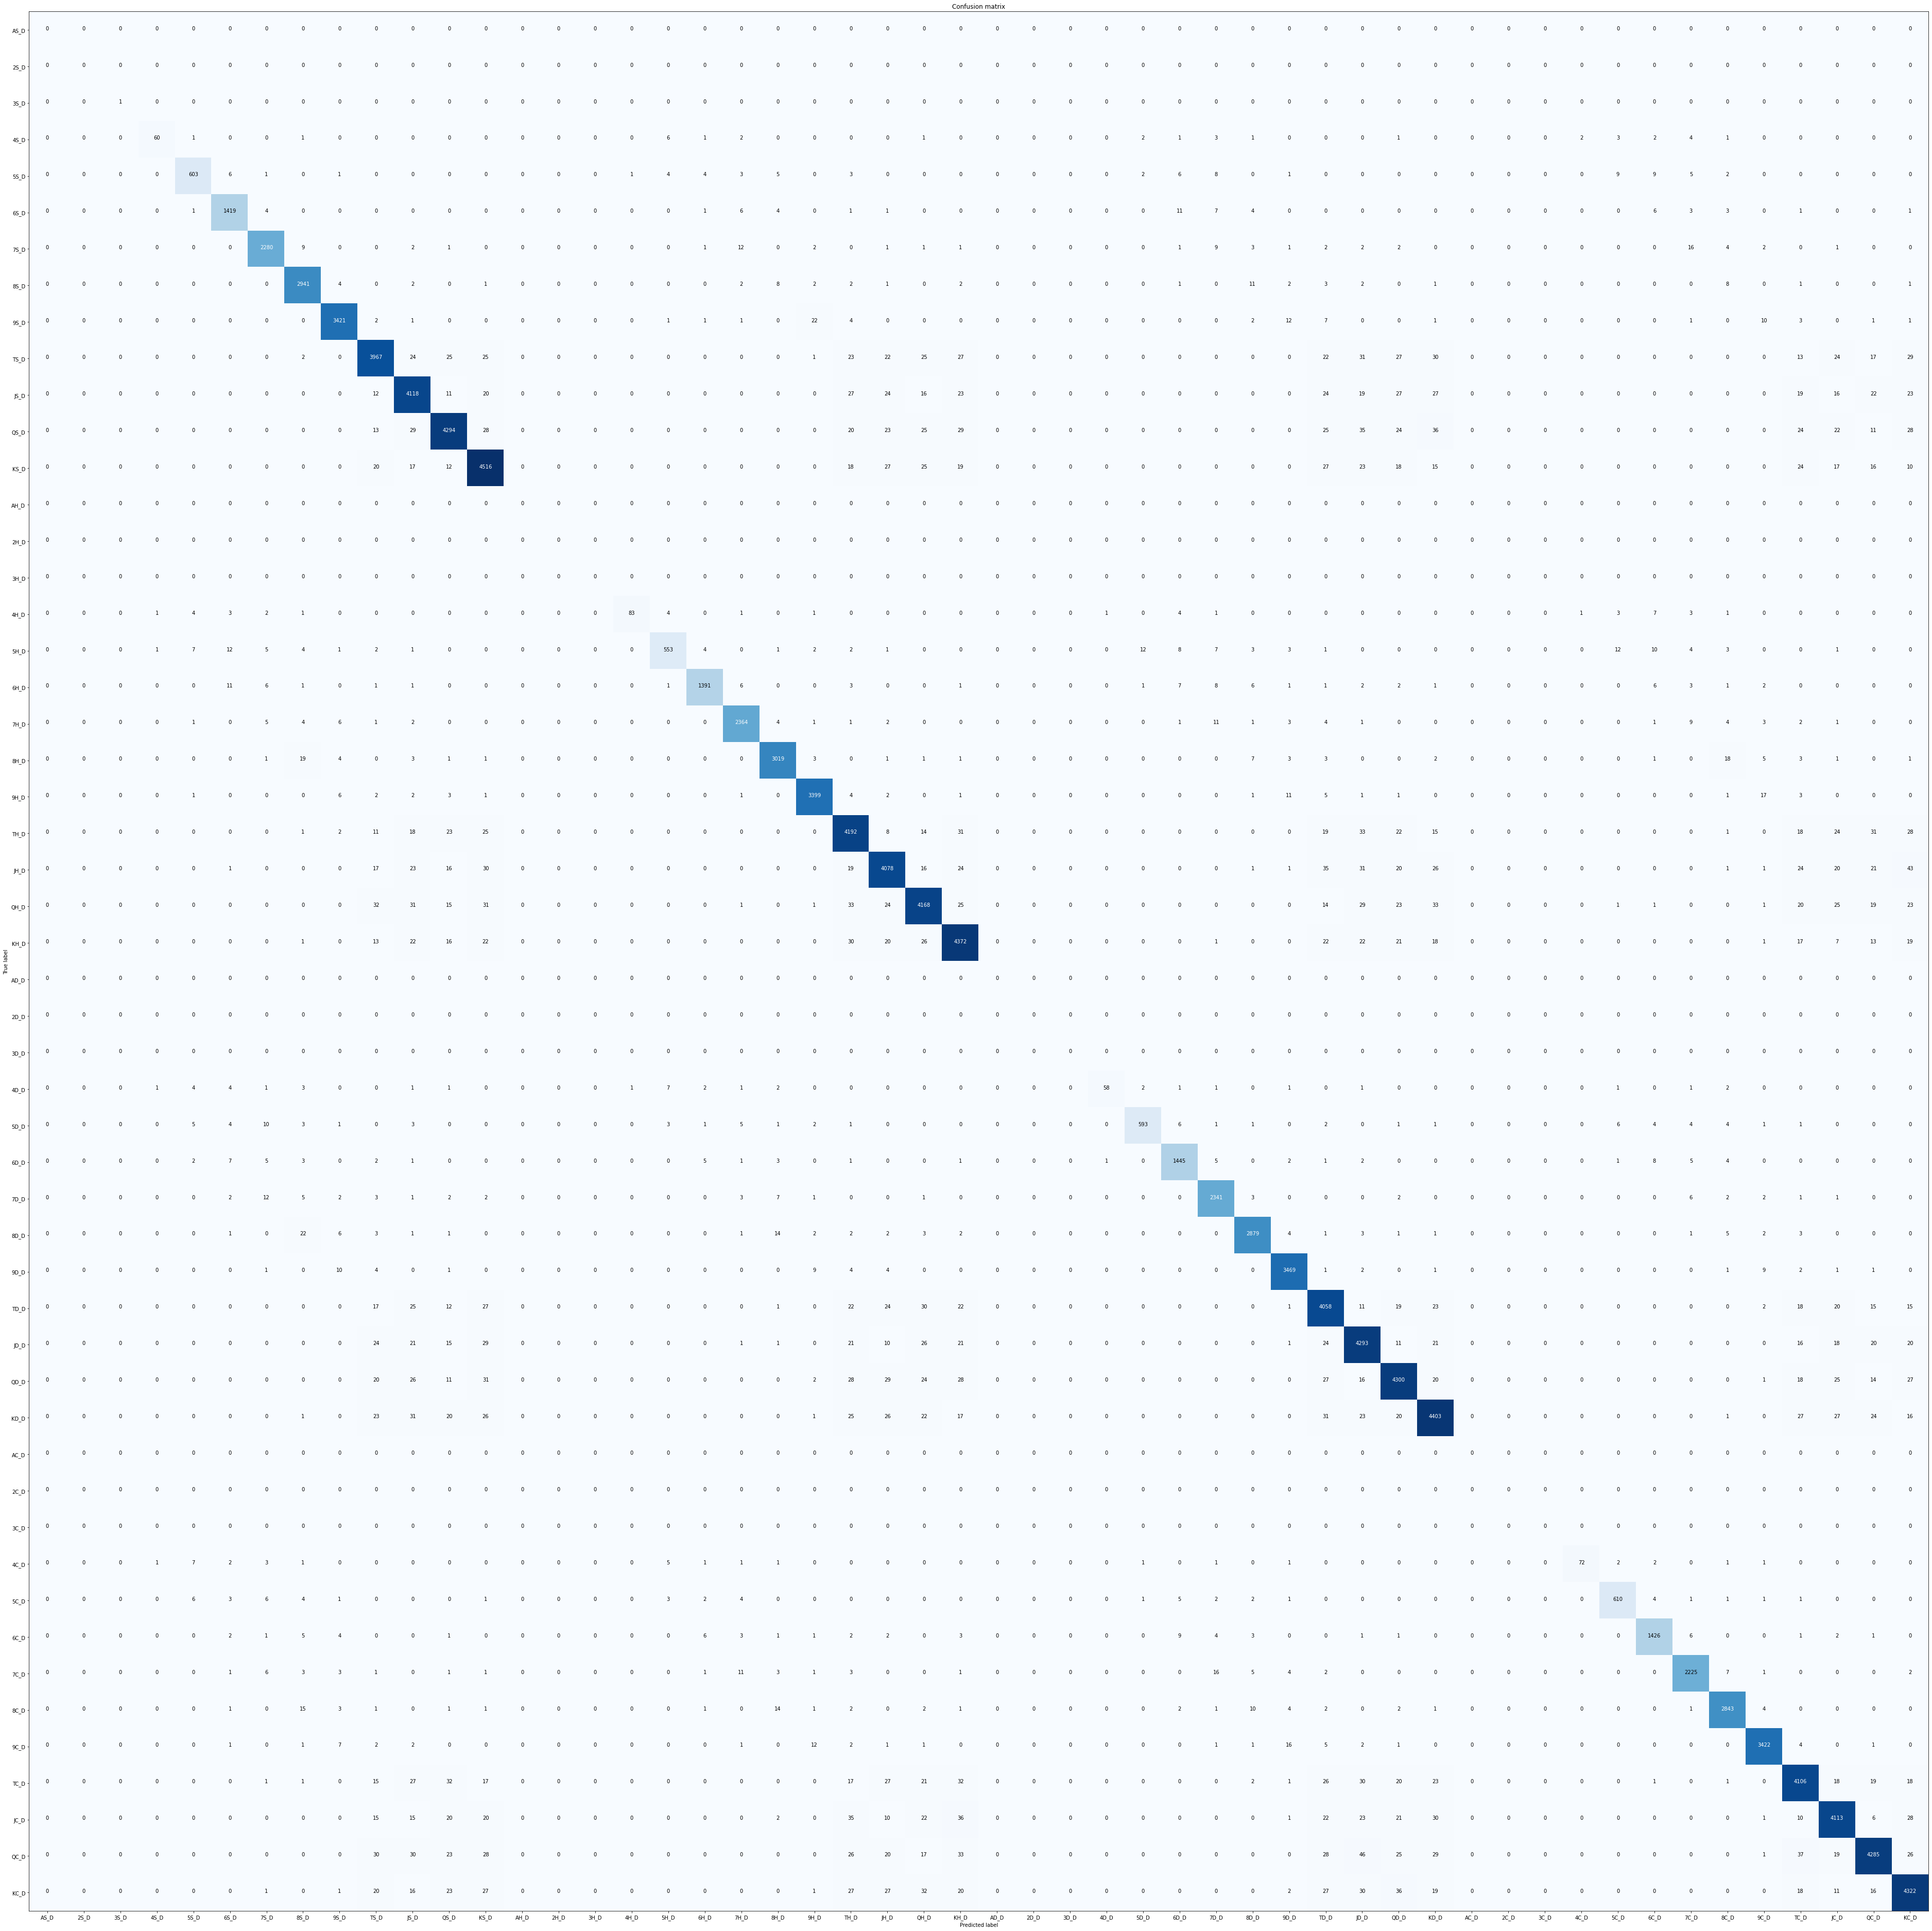

In [ ]:
plot_cm(plot_pth, classes, model_loss, test_loader_2k, device, numGames=currGames, mode='loss')

## all_states_all_actions

### Parameters

In [9]:
# state_action pair
state = 'apbd'
action = 'discard'

# model name
model_name = 'all_states_all_actions'

# Number of Games
numGames = 8000

# prunable states
# {'currHand','topCard','deadCard','oppCard','unknownCard'} or blank if None
pruneStatesList = []

# choosable actions
# {'all','draw_pickup','discard','knock','knock_bin'}
actionChoice = 'all'

# Balance classes
balance = False

# Training parameters
batch_size = 1000
lr = 0.001
epochs = 200

# Pretrain model
pre_train = False
model_PT = ''

# device for model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Create Directories

In [10]:
data_pth, model_pth, plot_pth = create_dir(pth, state, action, model_name)

Directories created.


### Load, Prune, and Split Training Data

loading 8000 games dataset from "/content/drive/MyDrive/Colab Notebooks/Thesis/data/apbd/discard"


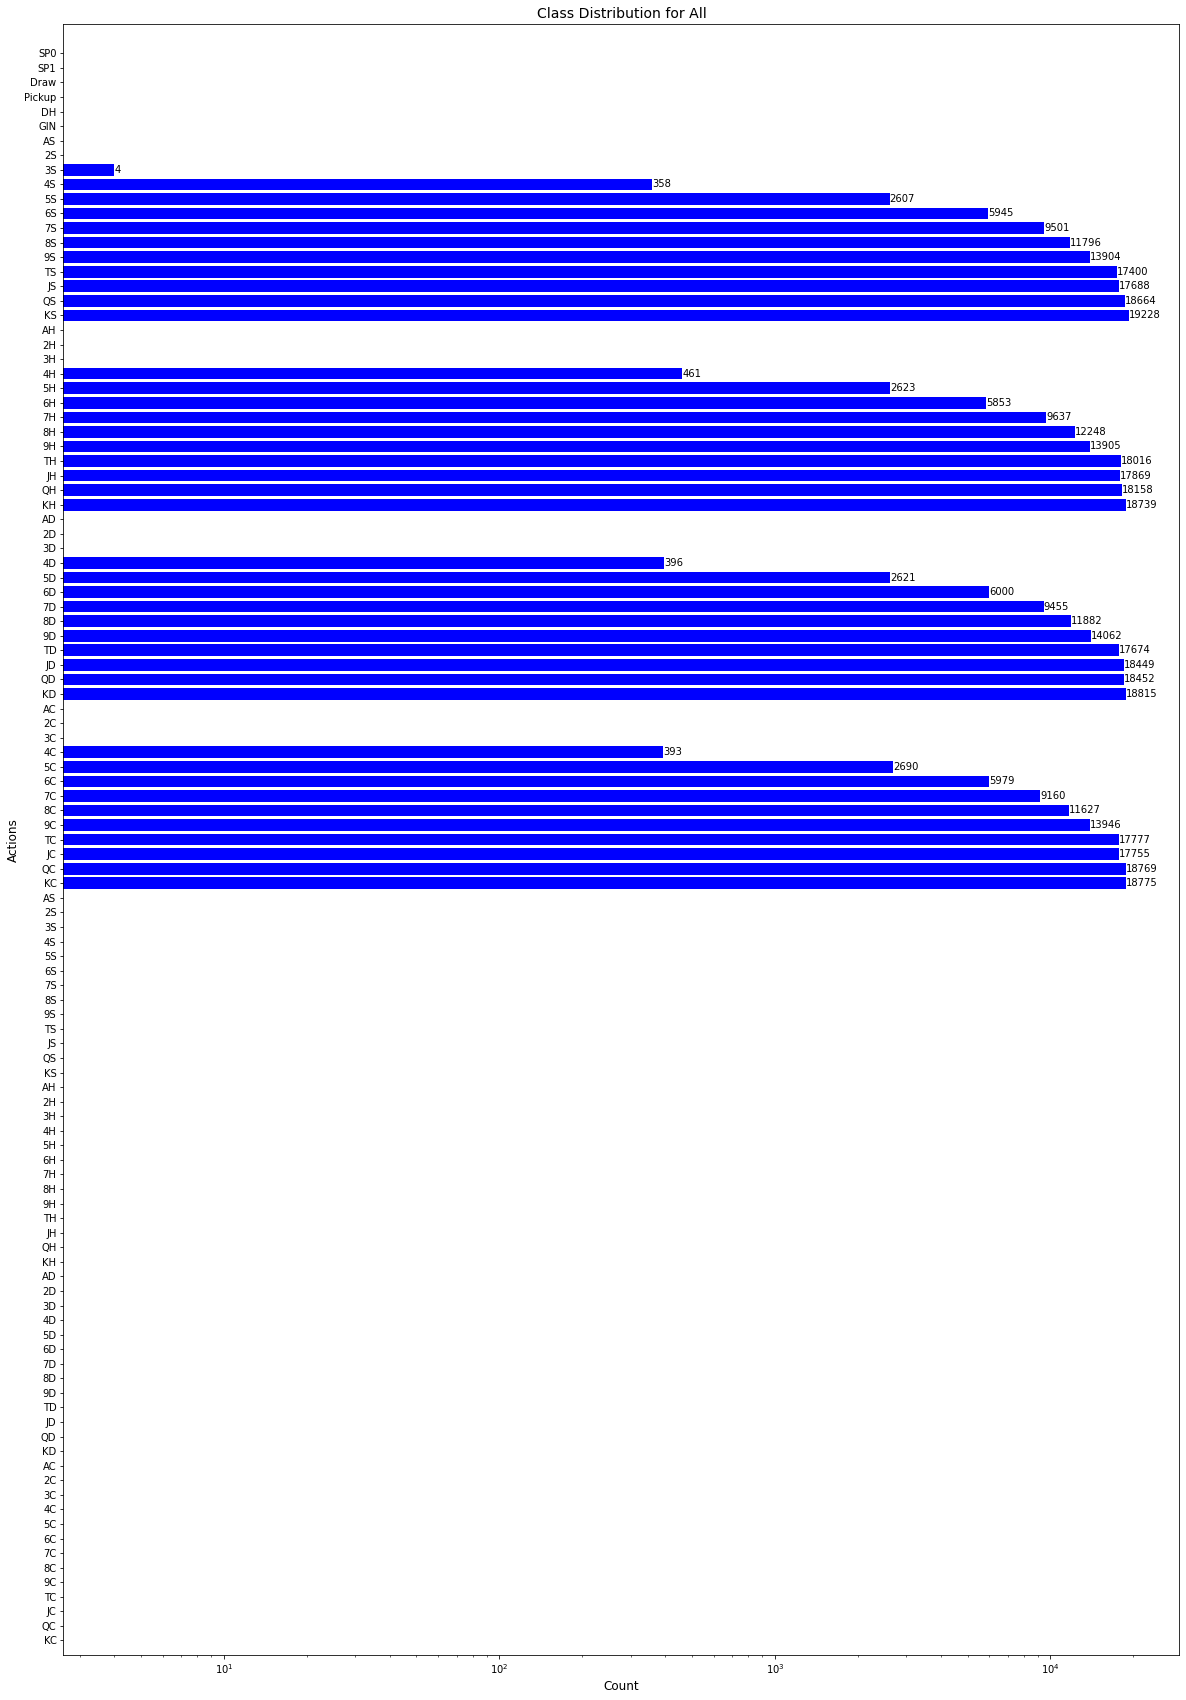

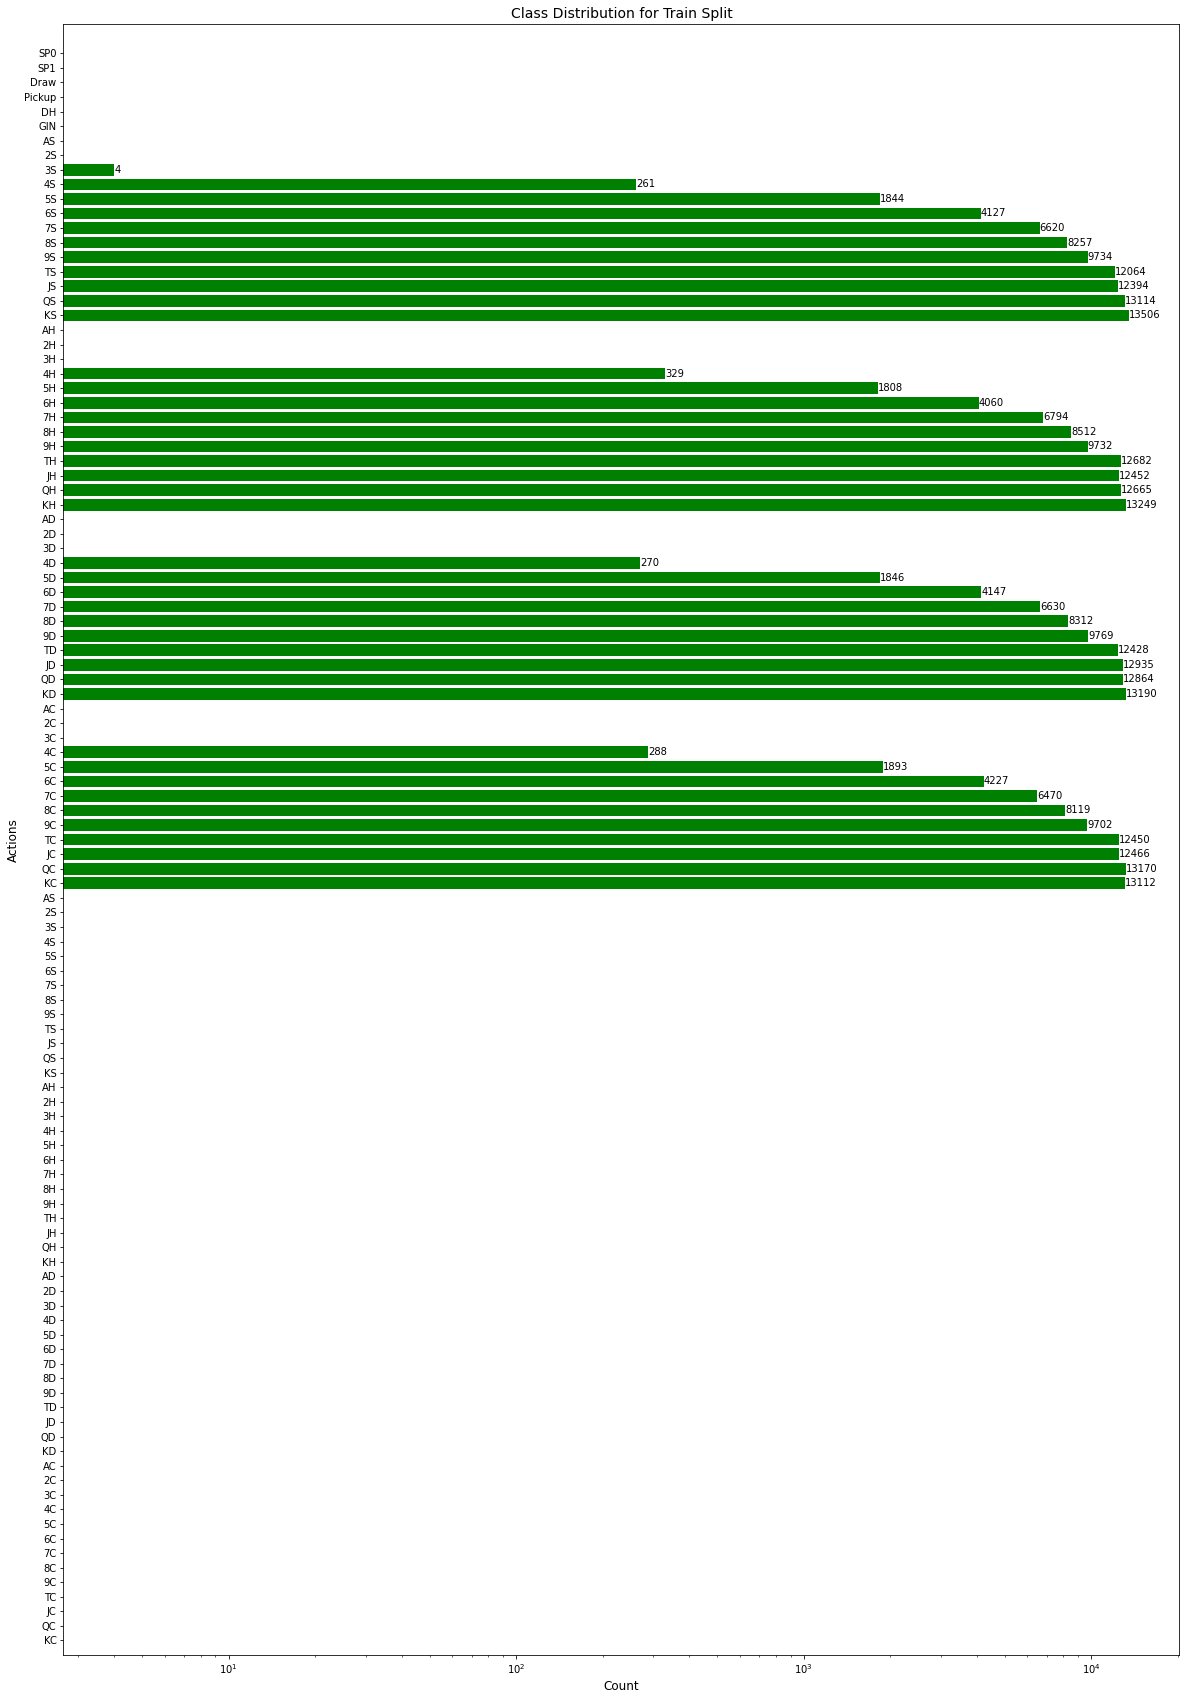

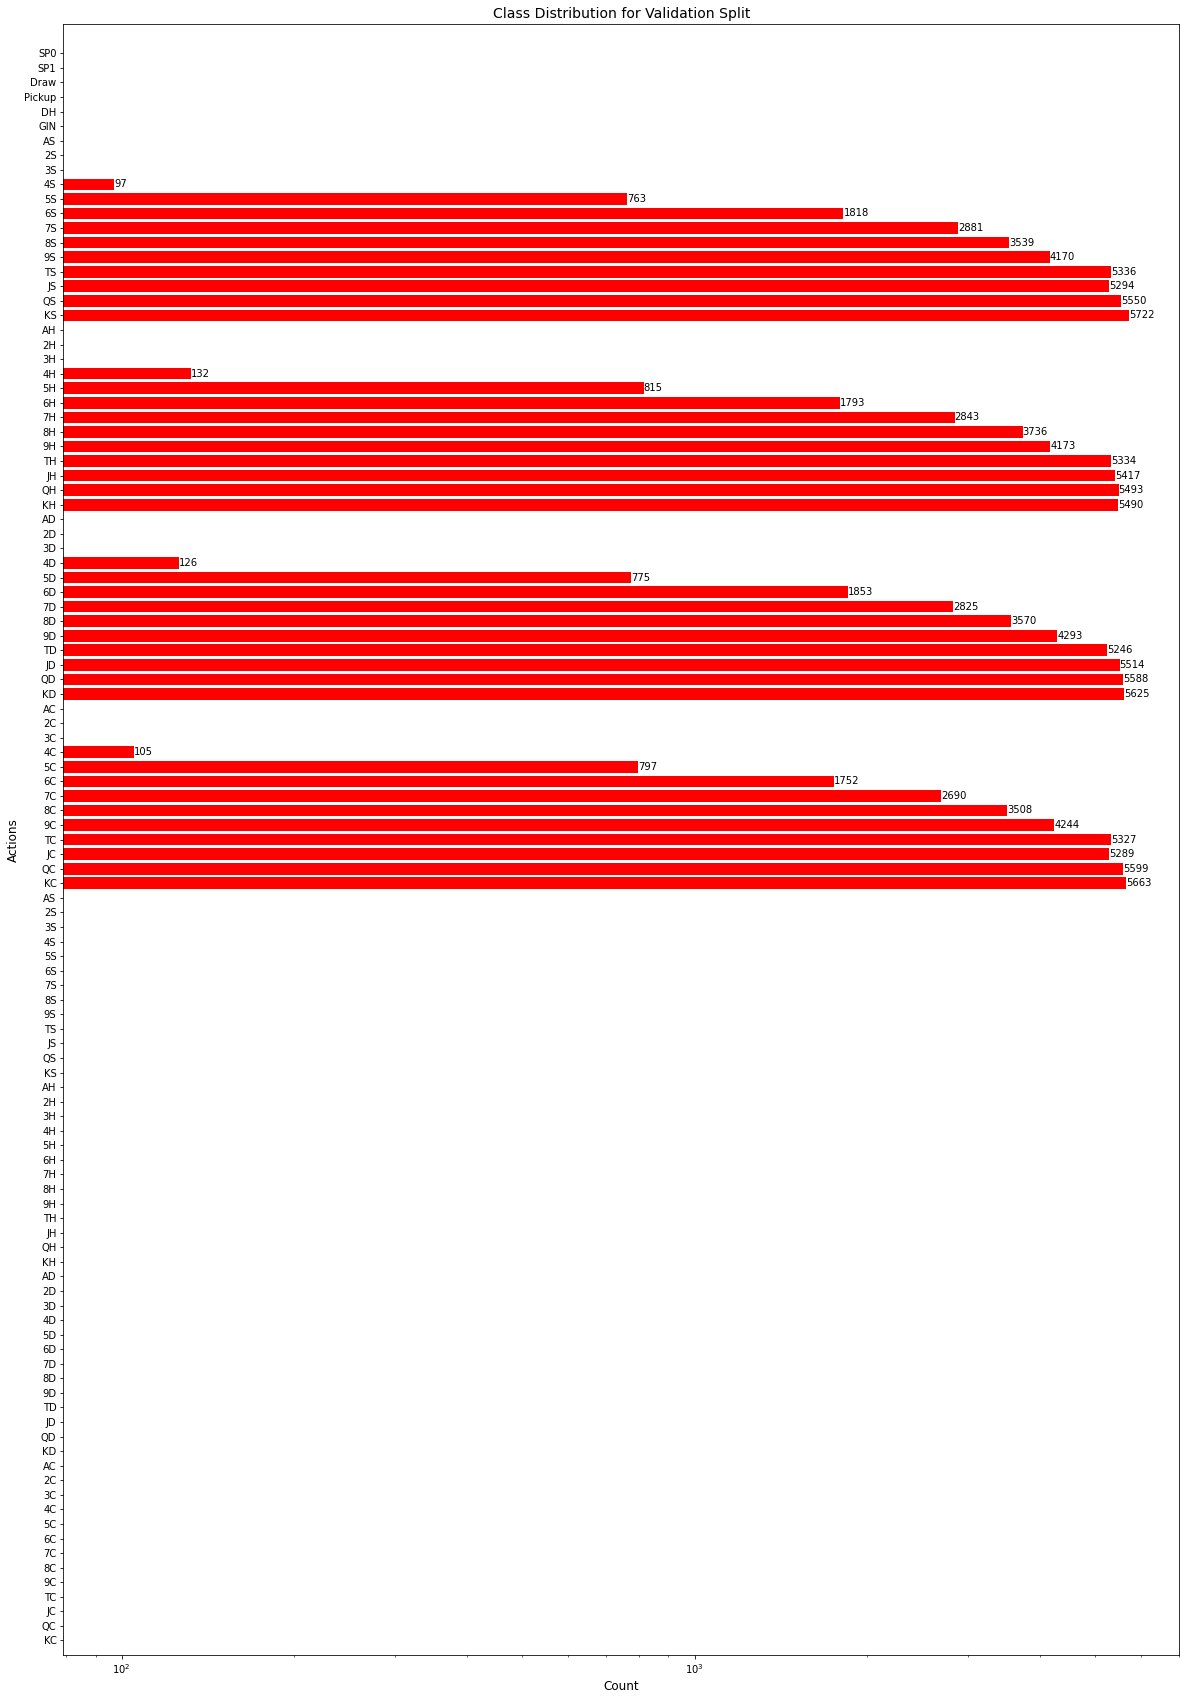

In [11]:
train_loader, val_loader, _,  classes = load_train_data(data_pth, plot_pth,
                                                        numGames, batch_size, 
                                                        pruneStatesList, actionChoice, 
                                                        balance, visualize=True)

### Train Model

Epoch: 1 | Train Loss: 0.01151326 | Train acc: 0.065334
              Val Loss: 0.00878816 |   Val acc: 0.160202
Epoch: 2 | Train Loss: 0.00874655 | Train acc: 0.214727
              Val Loss: 0.00869490 |   Val acc: 0.325468
Epoch: 3 | Train Loss: 0.00856277 | Train acc: 0.343873
              Val Loss: 0.00831576 |   Val acc: 0.368803
Epoch: 4 | Train Loss: 0.00750438 | Train acc: 0.400608
              Val Loss: 0.00656289 |   Val acc: 0.457549
Epoch: 5 | Train Loss: 0.00609501 | Train acc: 0.491178
              Val Loss: 0.00580390 |   Val acc: 0.518294
Epoch: 6 | Train Loss: 0.00558956 | Train acc: 0.547145
              Val Loss: 0.00541526 |   Val acc: 0.565941
Epoch: 7 | Train Loss: 0.00526866 | Train acc: 0.583094
              Val Loss: 0.00515798 |   Val acc: 0.600220
Epoch: 8 | Train Loss: 0.00505293 | Train acc: 0.614306
              Val Loss: 0.00498660 |   Val acc: 0.618439
Epoch: 9 | Train Loss: 0.00487442 | Train acc: 0.627578
              Val Loss: 0.00480967 |   V

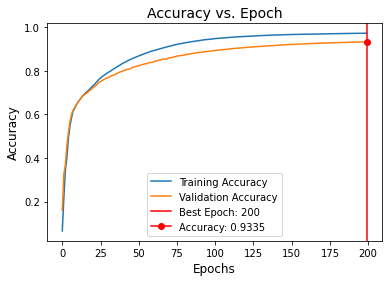

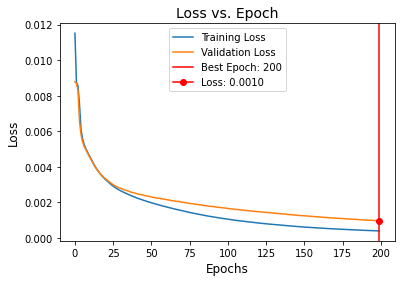

In [ ]:
model, model_acc, model_loss = train(train_loader, val_loader, plot_pth, batch_size, lr, epochs, verbose=True, pre_train=pre_train, model_PT=model_PT, device=device)
torch.save(model, '{}/model.pt'.format(model_pth))
torch.save(model_acc, '{}/model_acc.pt'.format(model_pth))
torch.save(model_loss, '{}/model_loss.pt'.format(model_pth))

#### Confusion Matrix

##### Load Models

In [ ]:
model = torch.load('{}/model.pt'.format(model_pth), map_location=device)
model_acc = torch.load('{}/model_acc.pt'.format(model_pth), map_location=device)
model_loss = torch.load('{}/model_loss.pt'.format(model_pth), map_location=device)

##### Train Set

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, train_loader, device, numGames=currGames)

##### Validation Set

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, val_loader, device, numGames=currGames, mode='val')

##### Test Set (6k)

In [ ]:
currGames = 6000
test_loader_6k, classes = load_test_data(data_pth, currGames, 
                                         pruneStatesList, actionChoice)
plot_cm(plot_pth, classes, model, test_loader_6k, device, numGames=currGames)

loading 6000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/apbd/discard
Accuracy: 96.05
Normalized confusion matrix
Confusion matrix, without normalization


##### Test Set (2k)

Test on all three models generated:

In [ ]:
currGames = 2000
test_loader_2k, classes = load_test_data(data_pth, currGames, 
                                         pruneStatesList, actionChoice)

loading 2000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/apbd/discard


###### all epoch

In [ ]:
plot_cm(plot_pth, classes, model, test_loader_2k, device, numGames=currGames)

Accuracy: 96.15
Normalized confusion matrix
Confusion matrix, without normalization


###### max validation accuracy

In [ ]:
plot_cm(plot_pth, classes, model_acc, test_loader_2k, device, numGames=currGames, mode='acc')

Accuracy: 96.15
Normalized confusion matrix


###### min validation loss

In [ ]:
plot_cm(plot_pth, classes, model_loss, test_loader_2k, device, numGames=currGames, mode='loss')

Accuracy: 96.15
Normalized confusion matrix
Confusion matrix, without normalization
